## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [3]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [4]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [5]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [6]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [7]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["Stem_bark_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Stem_bark_t_ha                                                    \
                    count       mean        std  min     25%    50%     75%   
Species_ID                                                                    
0                   371.0   7.894070   4.128113  0.3   4.900   7.70  10.350   
1                     7.0  34.728571  23.382095  8.3  13.950  35.70  52.750   
2                   120.0  11.320000   7.552123  0.8   6.375   9.45  15.250   
3                   115.0  15.307826   8.294197  2.1   7.950  15.30  21.450   
4                    66.0  11.296970   6.528234  1.6   6.500   9.25  16.575   
5                    68.0  29.010294  12.702287  2.5  18.400  29.70  39.675   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           23.2         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           65.7           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           38.8         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           41.1         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           28.7          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           48.8          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [8]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [9]:
# Choosing the predictor and independent variables
predictor = "Stem_bark_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [10]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
10            5        0.0  18.2    19.6        18.3     159.0          101.8   
11            1        0.0   8.8     5.2        15.5     105.0           46.3   
12            1        0.0  10.2     6.7        16.2     122.0           54.1   
13            1        0.0  14.1    10.0        19.9     194.0           87.2   
14            1        0.0  19.4    15.9        26.8     299.0          133.9   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [11]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [12]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
10,5,0.0,18.2,19.6,18.3
11,1,0.0,8.8,5.2,15.5
12,1,0.0,10.2,6.7,16.2
13,1,0.0,14.1,10.0,19.9
14,1,0.0,19.4,15.9,26.8


In [13]:
# Columns in "y" data collections
y.head()

,Stem_bark_t_ha
10,16.4
11,8.3
12,9.1
13,18.8
14,35.7


# Create first XGBoost model for estimate varibiality of output stats

In [14]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [15]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [16]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [17]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8326723310859243, 0.8676737130738914, 0.9009026084379873]
    Mean: 0.867
    Std: 0.028

 --------------------
Root-mean-square error (RMSE): 

    Scores: [3.30097638 3.59372071 3.45526601]
    Mean: 3.450
    Std: 0.120

 --------------------
Mean absolute error (MAE): 

    Scores: [2.0795804693277584, 2.471532239684139, 1.8125171342288633]
    Mean: 2.121
    Std: 0.271

 --------------------


# Add optimal hyperparameters for XGBoost model

In [18]:
# Hyperparameters data for the next step/stage
p1 = 0.6618637554923994                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.17264037949538136                # gamma
print('Gamma: ' + str(p2))

p3 = 0.24268238044305301                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 76         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.6733615714796921                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6618637554923994
Gamma: 0.17264037949538136
Learning_rate: 0.24268238044305301
Max_depth: 3
N_estimators: 76
Subsample: 0.6733615714796921


# Estimation of predictive quality to basic XGBoost models using Loops

In [19]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [20]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:12.00103	validation_1-rmse:11.73288
[1]	validation_0-rmse:9.69295	validation_1-rmse:9.29132
[2]	validation_0-rmse:8.03077	validation_1-rmse:7.58978
[3]	validation_0-rmse:6.84822	validation_1-rmse:6.32416
[4]	validation_0-rmse:5.96444	validation_1-rmse:5.34792
[5]	validation_0-rmse:5.27983	validation_1-rmse:4.72943


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.68308	validation_1-rmse:4.28041
[7]	validation_0-rmse:4.24663	validation_1-rmse:4.02569
[8]	validation_0-rmse:3.97085	validation_1-rmse:3.76323
[9]	validation_0-rmse:3.77474	validation_1-rmse:3.64608
[10]	validation_0-rmse:3.68050	validation_1-rmse:3.59590
[11]	validation_0-rmse:3.54746	validation_1-rmse:3.52558
[12]	validation_0-rmse:3.47565	validation_1-rmse:3.52500
[13]	validation_0-rmse:3.31340	validation_1-rmse:3.54453
[14]	validation_0-rmse:3.24074	validation_1-rmse:3.53944
[15]	validation_0-rmse:3.16468	validation_1-rmse:3.52762
[16]	validation_0-rmse:3.12563	validation_1-rmse:3.50081
[17]	validation_0-rmse:3.03479	validation_1-rmse:3.51250
[18]	validation_0-rmse:2.99392	validation_1-rmse:3.47609
[19]	validation_0-rmse:2.96772	validation_1-rmse:3.44961
[20]	validation_0-rmse:2.95348	validation_1-rmse:3.43788
[21]	validation_0-rmse:2.85799	validation_1-rmse:3.41542
[22]	validation_0-rmse:2.84346	validation_1-rmse:3.40384
[23]	validation_0-rmse:2.80060	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.77648	validation_1-rmse:13.11957
[1]	validation_0-rmse:9.40296	validation_1-rmse:10.93907


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.72355	validation_1-rmse:9.51554
[3]	validation_0-rmse:6.47058	validation_1-rmse:8.47378
[4]	validation_0-rmse:5.50947	validation_1-rmse:7.68160
[5]	validation_0-rmse:4.80151	validation_1-rmse:7.06975
[6]	validation_0-rmse:4.26233	validation_1-rmse:6.59633
[7]	validation_0-rmse:3.91689	validation_1-rmse:6.23803
[8]	validation_0-rmse:3.69895	validation_1-rmse:5.94921
[9]	validation_0-rmse:3.54613	validation_1-rmse:5.73468
[10]	validation_0-rmse:3.45666	validation_1-rmse:5.66499
[11]	validation_0-rmse:3.33292	validation_1-rmse:5.54891
[12]	validation_0-rmse:3.25211	validation_1-rmse:5.52568
[13]	validation_0-rmse:3.18507	validation_1-rmse:5.48540
[14]	validation_0-rmse:3.14177	validation_1-rmse:5.45995
[15]	validation_0-rmse:3.06804	validation_1-rmse:5.12313
[16]	validation_0-rmse:3.01850	validation_1-rmse:5.10678
[17]	validation_0-rmse:2.97451	validation_1-rmse:4.96529
[18]	validation_0-rmse:2.95188	validation_1-rmse:4.95590
[19]	validation_0-rmse:2.91312	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.15516	validation_1-rmse:10.96356
[1]	validation_0-rmse:9.84972	validation_1-rmse:8.74470
[2]	validation_0-rmse:8.23346	validation_1-rmse:7.07343
[3]	validation_0-rmse:6.96555	validation_1-rmse:5.97372
[4]	validation_0-rmse:5.95747	validation_1-rmse:5.10021
[5]	validation_0-rmse:5.21885	validation_1-rmse:4.43448
[6]	validation_0-rmse:4.67571	validation_1-rmse:4.06762
[7]	validation_0-rmse:4.32081	validation_1-rmse:3.80565
[8]	validation_0-rmse:4.05668	validation_1-rmse:3.62925
[9]	validation_0-rmse:3.83846	validation_1-rmse:3.47976
[10]	validation_0-rmse:3.64671	validation_1-rmse:3.40038
[11]	validation_0-rmse:3.50713	validation_1-rmse:3.30257
[12]	validation_0-rmse:3.43149	validation_1-rmse:3.24877
[13]	validation_0-rmse:3.27968	validation_1-rmse:3.21108
[14]	validation_0-rmse:3.20839	validation_1-rmse:3.17324
[15]	validation_0-rmse:3.10971	validation_1-rmse:3.15298
[16]	validation_0-rmse:3.08792	validation_1-rmse:3.15211
[17]	validation_0-rmse:3.02028	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.77843	validation_1-rmse:12.37767
[1]	validation_0-rmse:9.44814	validation_1-rmse:9.98791
[2]	validation_0-rmse:7.65492	validation_1-rmse:8.01840
[3]	validation_0-rmse:6.54926	validation_1-rmse:6.88626
[4]	validation_0-rmse:5.58644	validation_1-rmse:5.95716
[5]	validation_0-rmse:5.02733	validation_1-rmse:5.43951
[6]	validation_0-rmse:4.49508	validation_1-rmse:4.92094
[7]	validation_0-rmse:4.16436	validation_1-rmse:4.65582
[8]	validation_0-rmse:3.84064	validation_1-rmse:4.35906
[9]	validation_0-rmse:3.65299	validation_1-rmse:4.27089
[10]	validation_0-rmse:3.52188	validation_1-rmse:4.25006
[11]	validation_0-rmse:3.42590	validation_1-rmse:4.18343


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:3.36240	validation_1-rmse:4.14017
[13]	validation_0-rmse:3.21164	validation_1-rmse:4.00032
[14]	validation_0-rmse:3.16927	validation_1-rmse:3.97661
[15]	validation_0-rmse:3.10007	validation_1-rmse:3.89627
[16]	validation_0-rmse:3.07269	validation_1-rmse:3.88353
[17]	validation_0-rmse:3.02711	validation_1-rmse:3.89567
[18]	validation_0-rmse:2.92776	validation_1-rmse:3.78784
[19]	validation_0-rmse:2.89895	validation_1-rmse:3.76734
[20]	validation_0-rmse:2.87032	validation_1-rmse:3.77045
[21]	validation_0-rmse:2.83881	validation_1-rmse:3.74994
[22]	validation_0-rmse:2.81109	validation_1-rmse:3.73992
[23]	validation_0-rmse:2.75242	validation_1-rmse:3.74046
[24]	validation_0-rmse:2.74328	validation_1-rmse:3.74462
[25]	validation_0-rmse:2.70800	validation_1-rmse:3.71827
[26]	validation_0-rmse:2.69682	validation_1-rmse:3.70872
[27]	validation_0-rmse:2.64428	validation_1-rmse:3.65902
[28]	validation_0-rmse:2.62800	validation_1-rmse:3.64089
[29]	validation_0-rmse:2.60857	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.21887	validation_1-rmse:11.04797
[1]	validation_0-rmse:9.83989	validation_1-rmse:8.85271
[2]	validation_0-rmse:8.03191	validation_1-rmse:7.18631
[3]	validation_0-rmse:6.83501	validation_1-rmse:6.02980
[4]	validation_0-rmse:5.83117	validation_1-rmse:5.07276
[5]	validation_0-rmse:5.07792	validation_1-rmse:4.46475
[6]	validation_0-rmse:4.61489	validation_1-rmse:4.02901
[7]	validation_0-rmse:4.20055	validation_1-rmse:3.85019
[8]	validation_0-rmse:3.89570	validation_1-rmse:3.62520
[9]	validation_0-rmse:3.70689	validation_1-rmse:3.54055
[10]	validation_0-rmse:3.52418	validation_1-rmse:3.50841
[11]	validation_0-rmse:3.43220	validation_1-rmse:3.44076
[12]	validation_0-rmse:3.36305	validation_1-rmse:3.39534


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:3.29307	validation_1-rmse:3.34599
[14]	validation_0-rmse:3.23112	validation_1-rmse:3.32669
[15]	validation_0-rmse:3.18896	validation_1-rmse:3.32425
[16]	validation_0-rmse:3.14847	validation_1-rmse:3.31448
[17]	validation_0-rmse:3.03539	validation_1-rmse:3.30525
[18]	validation_0-rmse:2.94293	validation_1-rmse:3.25897
[19]	validation_0-rmse:2.92296	validation_1-rmse:3.25192
[20]	validation_0-rmse:2.86774	validation_1-rmse:3.26165
[21]	validation_0-rmse:2.83065	validation_1-rmse:3.24405
[22]	validation_0-rmse:2.78435	validation_1-rmse:3.23302
[23]	validation_0-rmse:2.76724	validation_1-rmse:3.23515
[24]	validation_0-rmse:2.75884	validation_1-rmse:3.24336
[25]	validation_0-rmse:2.70154	validation_1-rmse:3.22066
[26]	validation_0-rmse:2.69647	validation_1-rmse:3.20042
[27]	validation_0-rmse:2.67600	validation_1-rmse:3.19360
[28]	validation_0-rmse:2.66166	validation_1-rmse:3.19060
[29]	validation_0-rmse:2.65526	validation_1-rmse:3.21004
[30]	validation_0-rmse:2.63404	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.29386	validation_1-rmse:10.52093
[1]	validation_0-rmse:9.91806	validation_1-rmse:8.43050
[2]	validation_0-rmse:8.09018	validation_1-rmse:6.95571
[3]	validation_0-rmse:6.82563	validation_1-rmse:6.01534
[4]	validation_0-rmse:5.76167	validation_1-rmse:5.11239
[5]	validation_0-rmse:5.01500	validation_1-rmse:4.69227
[6]	validation_0-rmse:4.41763	validation_1-rmse:4.41740
[7]	validation_0-rmse:4.03386	validation_1-rmse:4.19897
[8]	validation_0-rmse:3.68274	validation_1-rmse:4.05449
[9]	validation_0-rmse:3.53865	validation_1-rmse:4.01966
[10]	validation_0-rmse:3.38501	validation_1-rmse:4.01524
[11]	validation_0-rmse:3.25357	validation_1-rmse:3.95498
[12]	validation_0-rmse:3.18885	validation_1-rmse:3.90615
[13]	validation_0-rmse:3.11099	validation_1-rmse:3.87784
[14]	validation_0-rmse:3.03201	validation_1-rmse:3.83406
[15]	validation_0-rmse:2.96365	validation_1-rmse:3.82835
[16]	validation_0-rmse:2.93903	validation_1-rmse:3.83686
[17]	validation_0-rmse:2.90358	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.88153	validation_1-rmse:12.66751
[1]	validation_0-rmse:9.61149	validation_1-rmse:10.42506
[2]	validation_0-rmse:7.85382	validation_1-rmse:8.53712
[3]	validation_0-rmse:6.66227	validation_1-rmse:7.19247
[4]	validation_0-rmse:5.70877	validation_1-rmse:6.29784
[5]	validation_0-rmse:5.10354	validation_1-rmse:5.76169
[6]	validation_0-rmse:4.53482	validation_1-rmse:5.23400


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.16688	validation_1-rmse:4.78535
[8]	validation_0-rmse:3.86670	validation_1-rmse:4.51116
[9]	validation_0-rmse:3.68442	validation_1-rmse:4.48253
[10]	validation_0-rmse:3.49446	validation_1-rmse:4.20912
[11]	validation_0-rmse:3.39451	validation_1-rmse:4.18988
[12]	validation_0-rmse:3.32800	validation_1-rmse:4.14080
[13]	validation_0-rmse:3.20903	validation_1-rmse:3.93751
[14]	validation_0-rmse:3.15295	validation_1-rmse:3.91184
[15]	validation_0-rmse:3.09692	validation_1-rmse:3.85013
[16]	validation_0-rmse:3.07217	validation_1-rmse:3.88971
[17]	validation_0-rmse:3.02863	validation_1-rmse:3.88736
[18]	validation_0-rmse:2.97428	validation_1-rmse:3.76151
[19]	validation_0-rmse:2.96039	validation_1-rmse:3.74169
[20]	validation_0-rmse:2.94217	validation_1-rmse:3.74347
[21]	validation_0-rmse:2.89824	validation_1-rmse:3.67767
[22]	validation_0-rmse:2.86390	validation_1-rmse:3.70921
[23]	validation_0-rmse:2.82774	validation_1-rmse:3.70859
[24]	validation_0-rmse:2.81982	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.47343	validation_1-rmse:9.43355
[1]	validation_0-rmse:10.00308	validation_1-rmse:7.50276
[2]	validation_0-rmse:8.35613	validation_1-rmse:6.19017
[3]	validation_0-rmse:7.04313	validation_1-rmse:5.25033
[4]	validation_0-rmse:5.99831	validation_1-rmse:4.53803
[5]	validation_0-rmse:5.25794	validation_1-rmse:4.09818
[6]	validation_0-rmse:4.71314	validation_1-rmse:3.80276
[7]	validation_0-rmse:4.31493	validation_1-rmse:3.49105


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.96927	validation_1-rmse:3.33404
[9]	validation_0-rmse:3.76403	validation_1-rmse:3.29330
[10]	validation_0-rmse:3.64402	validation_1-rmse:3.23445
[11]	validation_0-rmse:3.51553	validation_1-rmse:3.21028
[12]	validation_0-rmse:3.43026	validation_1-rmse:3.20572
[13]	validation_0-rmse:3.33581	validation_1-rmse:3.18680
[14]	validation_0-rmse:3.25210	validation_1-rmse:3.19325
[15]	validation_0-rmse:3.15582	validation_1-rmse:3.18340
[16]	validation_0-rmse:3.12897	validation_1-rmse:3.16768
[17]	validation_0-rmse:3.06067	validation_1-rmse:3.21191
[18]	validation_0-rmse:3.02510	validation_1-rmse:3.18362
[19]	validation_0-rmse:2.97867	validation_1-rmse:3.16189
[20]	validation_0-rmse:2.94175	validation_1-rmse:3.18554
[21]	validation_0-rmse:2.86881	validation_1-rmse:3.12531
[22]	validation_0-rmse:2.83344	validation_1-rmse:3.14027
[23]	validation_0-rmse:2.81924	validation_1-rmse:3.16171
[24]	validation_0-rmse:2.80431	validation_1-rmse:3.17521
[25]	validation_0-rmse:2.74234	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.95576	validation_1-rmse:12.11253


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.65284	validation_1-rmse:9.95894
[2]	validation_0-rmse:7.89694	validation_1-rmse:8.21284
[3]	validation_0-rmse:6.66822	validation_1-rmse:7.13664
[4]	validation_0-rmse:5.65015	validation_1-rmse:6.05157
[5]	validation_0-rmse:4.96270	validation_1-rmse:5.36223
[6]	validation_0-rmse:4.39949	validation_1-rmse:4.75352
[7]	validation_0-rmse:4.06618	validation_1-rmse:4.50878
[8]	validation_0-rmse:3.76659	validation_1-rmse:4.19383
[9]	validation_0-rmse:3.62885	validation_1-rmse:4.13834
[10]	validation_0-rmse:3.44054	validation_1-rmse:4.00353
[11]	validation_0-rmse:3.30139	validation_1-rmse:3.97698
[12]	validation_0-rmse:3.21682	validation_1-rmse:3.91867
[13]	validation_0-rmse:3.14013	validation_1-rmse:3.87564
[14]	validation_0-rmse:3.11023	validation_1-rmse:3.86763
[15]	validation_0-rmse:2.98688	validation_1-rmse:3.78828
[16]	validation_0-rmse:2.93765	validation_1-rmse:3.75663
[17]	validation_0-rmse:2.90113	validation_1-rmse:3.74309
[18]	validation_0-rmse:2.87905	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.88669	validation_1-rmse:12.55616
[1]	validation_0-rmse:9.52205	validation_1-rmse:10.20492
[2]	validation_0-rmse:7.77713	validation_1-rmse:8.57280
[3]	validation_0-rmse:6.57854	validation_1-rmse:7.59351
[4]	validation_0-rmse:5.64645	validation_1-rmse:6.63646
[5]	validation_0-rmse:4.96055	validation_1-rmse:5.91220
[6]	validation_0-rmse:4.45713	validation_1-rmse:5.39309
[7]	validation_0-rmse:4.10028	validation_1-rmse:4.99429
[8]	validation_0-rmse:3.78768	validation_1-rmse:4.75376
[9]	validation_0-rmse:3.58606	validation_1-rmse:4.62469
[10]	validation_0-rmse:3.46798	validation_1-rmse:4.50706
[11]	validation_0-rmse:3.34485	validation_1-rmse:4.38868
[12]	validation_0-rmse:3.29402	validation_1-rmse:4.34321
[13]	validation_0-rmse:3.19862	validation_1-rmse:4.27148
[14]	validation_0-rmse:3.14183	validation_1-rmse:4.26890
[15]	validation_0-rmse:3.07598	validation_1-rmse:4.24328
[16]	validation_0-rmse:3.02577	validation_1-rmse:4.16154
[17]	validation_0-rmse:2.93230	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.03411	validation_1-rmse:12.38156
[1]	validation_0-rmse:9.73711	validation_1-rmse:9.94226
[2]	validation_0-rmse:7.94911	validation_1-rmse:7.92721
[3]	validation_0-rmse:6.73434	validation_1-rmse:6.66992
[4]	validation_0-rmse:5.75998	validation_1-rmse:5.73406
[5]	validation_0-rmse:5.00210	validation_1-rmse:5.22867


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.44475	validation_1-rmse:4.85531
[7]	validation_0-rmse:4.08927	validation_1-rmse:4.57153
[8]	validation_0-rmse:3.76641	validation_1-rmse:4.35411
[9]	validation_0-rmse:3.55937	validation_1-rmse:4.35893
[10]	validation_0-rmse:3.44724	validation_1-rmse:4.30185
[11]	validation_0-rmse:3.32144	validation_1-rmse:4.28761
[12]	validation_0-rmse:3.21360	validation_1-rmse:4.24583
[13]	validation_0-rmse:3.06547	validation_1-rmse:4.21810
[14]	validation_0-rmse:3.00828	validation_1-rmse:4.14570
[15]	validation_0-rmse:2.95243	validation_1-rmse:4.08434
[16]	validation_0-rmse:2.86171	validation_1-rmse:4.16122
[17]	validation_0-rmse:2.82957	validation_1-rmse:4.12819
[18]	validation_0-rmse:2.79445	validation_1-rmse:4.10583
[19]	validation_0-rmse:2.76551	validation_1-rmse:4.08602
[20]	validation_0-rmse:2.75489	validation_1-rmse:4.07823
[21]	validation_0-rmse:2.71921	validation_1-rmse:4.07645
[22]	validation_0-rmse:2.70089	validation_1-rmse:4.06681
[23]	validation_0-rmse:2.67917	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.55935	validation_1-rmse:14.06878
[1]	validation_0-rmse:9.44097	validation_1-rmse:11.77917
[2]	validation_0-rmse:7.71651	validation_1-rmse:9.78848
[3]	validation_0-rmse:6.66292	validation_1-rmse:8.61981
[4]	validation_0-rmse:5.69569	validation_1-rmse:7.46124
[5]	validation_0-rmse:5.05696	validation_1-rmse:6.65819
[6]	validation_0-rmse:4.47700	validation_1-rmse:5.96034


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.14820	validation_1-rmse:5.52498
[8]	validation_0-rmse:3.82743	validation_1-rmse:5.12718
[9]	validation_0-rmse:3.64262	validation_1-rmse:4.94490
[10]	validation_0-rmse:3.56347	validation_1-rmse:4.82112
[11]	validation_0-rmse:3.42149	validation_1-rmse:4.74546
[12]	validation_0-rmse:3.32525	validation_1-rmse:4.67630
[13]	validation_0-rmse:3.16462	validation_1-rmse:4.44803
[14]	validation_0-rmse:3.10705	validation_1-rmse:4.40342
[15]	validation_0-rmse:3.03947	validation_1-rmse:4.25447
[16]	validation_0-rmse:2.97119	validation_1-rmse:4.26235
[17]	validation_0-rmse:2.94003	validation_1-rmse:4.22797
[18]	validation_0-rmse:2.88347	validation_1-rmse:4.16524
[19]	validation_0-rmse:2.85044	validation_1-rmse:4.12470
[20]	validation_0-rmse:2.83455	validation_1-rmse:4.11079
[21]	validation_0-rmse:2.77128	validation_1-rmse:4.00544
[22]	validation_0-rmse:2.71318	validation_1-rmse:3.91822
[23]	validation_0-rmse:2.69364	validation_1-rmse:3.89502
[24]	validation_0-rmse:2.66643	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.71666	validation_1-rmse:13.81728
[1]	validation_0-rmse:9.41853	validation_1-rmse:11.58103
[2]	validation_0-rmse:7.73403	validation_1-rmse:9.90586
[3]	validation_0-rmse:6.66557	validation_1-rmse:8.95228
[4]	validation_0-rmse:5.62555	validation_1-rmse:7.70928
[5]	validation_0-rmse:4.84185	validation_1-rmse:6.88868
[6]	validation_0-rmse:4.32246	validation_1-rmse:6.35363
[7]	validation_0-rmse:3.94201	validation_1-rmse:5.85659
[8]	validation_0-rmse:3.65154	validation_1-rmse:5.50675
[9]	validation_0-rmse:3.49013	validation_1-rmse:5.34863


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:3.32614	validation_1-rmse:5.10244
[11]	validation_0-rmse:3.24344	validation_1-rmse:5.03106
[12]	validation_0-rmse:3.14892	validation_1-rmse:4.89877
[13]	validation_0-rmse:3.02024	validation_1-rmse:4.68847
[14]	validation_0-rmse:2.98174	validation_1-rmse:4.67769
[15]	validation_0-rmse:2.87091	validation_1-rmse:4.49691
[16]	validation_0-rmse:2.83979	validation_1-rmse:4.48758
[17]	validation_0-rmse:2.78499	validation_1-rmse:4.35020
[18]	validation_0-rmse:2.74316	validation_1-rmse:4.32278
[19]	validation_0-rmse:2.72846	validation_1-rmse:4.30898
[20]	validation_0-rmse:2.69016	validation_1-rmse:4.28929
[21]	validation_0-rmse:2.65739	validation_1-rmse:4.25619
[22]	validation_0-rmse:2.63204	validation_1-rmse:4.23067
[23]	validation_0-rmse:2.61688	validation_1-rmse:4.20631
[24]	validation_0-rmse:2.60594	validation_1-rmse:4.19148
[25]	validation_0-rmse:2.54062	validation_1-rmse:4.09423
[26]	validation_0-rmse:2.53226	validation_1-rmse:4.09645
[27]	validation_0-rmse:2.49829	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.14142	validation_1-rmse:11.74042
[1]	validation_0-rmse:9.75804	validation_1-rmse:9.61891
[2]	validation_0-rmse:7.99333	validation_1-rmse:7.93282
[3]	validation_0-rmse:6.86292	validation_1-rmse:6.96042
[4]	validation_0-rmse:5.74416	validation_1-rmse:5.89350
[5]	validation_0-rmse:5.09168	validation_1-rmse:5.40495
[6]	validation_0-rmse:4.53524	validation_1-rmse:4.88365
[7]	validation_0-rmse:4.16766	validation_1-rmse:4.65576
[8]	validation_0-rmse:3.92836	validation_1-rmse:4.55820
[9]	validation_0-rmse:3.77438	validation_1-rmse:4.41478
[10]	validation_0-rmse:3.58306	validation_1-rmse:4.18613


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:3.44992	validation_1-rmse:4.10802
[12]	validation_0-rmse:3.30968	validation_1-rmse:4.07627
[13]	validation_0-rmse:3.18266	validation_1-rmse:3.96019
[14]	validation_0-rmse:3.12400	validation_1-rmse:3.92452
[15]	validation_0-rmse:3.03432	validation_1-rmse:3.77939
[16]	validation_0-rmse:2.99878	validation_1-rmse:3.83959
[17]	validation_0-rmse:2.94910	validation_1-rmse:3.80655
[18]	validation_0-rmse:2.89182	validation_1-rmse:3.73678
[19]	validation_0-rmse:2.87379	validation_1-rmse:3.71430
[20]	validation_0-rmse:2.81030	validation_1-rmse:3.69883
[21]	validation_0-rmse:2.75232	validation_1-rmse:3.67597
[22]	validation_0-rmse:2.73977	validation_1-rmse:3.71343
[23]	validation_0-rmse:2.69077	validation_1-rmse:3.67430
[24]	validation_0-rmse:2.67407	validation_1-rmse:3.65894
[25]	validation_0-rmse:2.64506	validation_1-rmse:3.61085
[26]	validation_0-rmse:2.61597	validation_1-rmse:3.64309
[27]	validation_0-rmse:2.59906	validation_1-rmse:3.64971
[28]	validation_0-rmse:2.56263	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.77428	validation_1-rmse:12.63813
[1]	validation_0-rmse:9.50527	validation_1-rmse:10.10663
[2]	validation_0-rmse:7.77459	validation_1-rmse:8.26980
[3]	validation_0-rmse:6.64738	validation_1-rmse:6.88138
[4]	validation_0-rmse:5.71337	validation_1-rmse:6.00738


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.01623	validation_1-rmse:5.24761
[6]	validation_0-rmse:4.47378	validation_1-rmse:4.74384
[7]	validation_0-rmse:4.10816	validation_1-rmse:4.34063
[8]	validation_0-rmse:3.81129	validation_1-rmse:4.02166
[9]	validation_0-rmse:3.66064	validation_1-rmse:3.93232
[10]	validation_0-rmse:3.57547	validation_1-rmse:3.83941
[11]	validation_0-rmse:3.43999	validation_1-rmse:3.86347
[12]	validation_0-rmse:3.35884	validation_1-rmse:3.79188
[13]	validation_0-rmse:3.29420	validation_1-rmse:3.74049
[14]	validation_0-rmse:3.27115	validation_1-rmse:3.70765
[15]	validation_0-rmse:3.17902	validation_1-rmse:3.68807
[16]	validation_0-rmse:3.15037	validation_1-rmse:3.66271
[17]	validation_0-rmse:3.11670	validation_1-rmse:3.64827
[18]	validation_0-rmse:3.06177	validation_1-rmse:3.61880
[19]	validation_0-rmse:3.04645	validation_1-rmse:3.63746
[20]	validation_0-rmse:3.00931	validation_1-rmse:3.67506
[21]	validation_0-rmse:2.97871	validation_1-rmse:3.61385
[22]	validation_0-rmse:2.95455	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.22101	validation_1-rmse:10.60443
[1]	validation_0-rmse:9.84277	validation_1-rmse:8.29556
[2]	validation_0-rmse:8.02748	validation_1-rmse:6.74452
[3]	validation_0-rmse:6.87053	validation_1-rmse:5.58302
[4]	validation_0-rmse:5.81174	validation_1-rmse:4.73794
[5]	validation_0-rmse:5.12021	validation_1-rmse:4.11568
[6]	validation_0-rmse:4.61320	validation_1-rmse:3.74934
[7]	validation_0-rmse:4.30087	validation_1-rmse:3.52530
[8]	validation_0-rmse:3.99342	validation_1-rmse:3.33713


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.81043	validation_1-rmse:3.32954
[10]	validation_0-rmse:3.70538	validation_1-rmse:3.21413
[11]	validation_0-rmse:3.60061	validation_1-rmse:3.26307
[12]	validation_0-rmse:3.50866	validation_1-rmse:3.28989
[13]	validation_0-rmse:3.44301	validation_1-rmse:3.32238
[14]	validation_0-rmse:3.33758	validation_1-rmse:3.32576
[15]	validation_0-rmse:3.22575	validation_1-rmse:3.30567
[16]	validation_0-rmse:3.17456	validation_1-rmse:3.32699
[17]	validation_0-rmse:3.10707	validation_1-rmse:3.38146
[18]	validation_0-rmse:2.98952	validation_1-rmse:3.38619
[19]	validation_0-rmse:2.98067	validation_1-rmse:3.38252
[20]	validation_0-rmse:2.88381	validation_1-rmse:3.37496
[21]	validation_0-rmse:2.84937	validation_1-rmse:3.40147
[22]	validation_0-rmse:2.78193	validation_1-rmse:3.39209
[23]	validation_0-rmse:2.75221	validation_1-rmse:3.40264
[24]	validation_0-rmse:2.72558	validation_1-rmse:3.37379
[25]	validation_0-rmse:2.67832	validation_1-rmse:3.42454
[26]	validation_0-rmse:2.66173	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.87030	validation_1-rmse:8.86530
[2]	validation_0-rmse:8.16813	validation_1-rmse:7.41945
[3]	validation_0-rmse:6.98893	validation_1-rmse:6.47733
[4]	validation_0-rmse:5.94204	validation_1-rmse:5.63546
[5]	validation_0-rmse:5.14798	validation_1-rmse:5.18402
[6]	validation_0-rmse:4.52236	validation_1-rmse:4.83924
[7]	validation_0-rmse:4.19824	validation_1-rmse:4.66563
[8]	validation_0-rmse:3.87693	validation_1-rmse:4.45611
[9]	validation_0-rmse:3.69982	validation_1-rmse:4.37357
[10]	validation_0-rmse:3.53276	validation_1-rmse:4.41668
[11]	validation_0-rmse:3.39873	validation_1-rmse:4.33133
[12]	validation_0-rmse:3.31508	validation_1-rmse:4.27922
[13]	validation_0-rmse:3.17696	validation_1-rmse:4.12584
[14]	validation_0-rmse:3.12289	validation_1-rmse:4.12763
[15]	validation_0-rmse:3.03032	validation_1-rmse:4.01210
[16]	validation_0-rmse:2.99654	validation_1-rmse:3.99066
[17]	validation_0-rmse:2.94067	validation_1-rmse:3.96525
[18]	validation_0-rmse:2.89513	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.05346	validation_1-rmse:11.86252
[1]	validation_0-rmse:9.76357	validation_1-rmse:9.34604
[2]	validation_0-rmse:7.95260	validation_1-rmse:7.54385
[3]	validation_0-rmse:6.79783	validation_1-rmse:6.31525
[4]	validation_0-rmse:5.75166	validation_1-rmse:5.42289
[5]	validation_0-rmse:5.03758	validation_1-rmse:4.81096
[6]	validation_0-rmse:4.55097	validation_1-rmse:4.39493
[7]	validation_0-rmse:4.14777	validation_1-rmse:4.24539
[8]	validation_0-rmse:3.84616	validation_1-rmse:4.04164
[9]	validation_0-rmse:3.66519	validation_1-rmse:4.00862
[10]	validation_0-rmse:3.56234	validation_1-rmse:3.93614
[11]	validation_0-rmse:3.42010	validation_1-rmse:3.92870
[12]	validation_0-rmse:3.32934	validation_1-rmse:3.92838
[13]	validation_0-rmse:3.20351	validation_1-rmse:3.88618
[14]	validation_0-rmse:3.15334	validation_1-rmse:3.84961
[15]	validation_0-rmse:3.01489	validation_1-rmse:3.84910
[16]	validation_0-rmse:2.97481	validation_1-rmse:3.83428
[17]	validation_0-rmse:2.95217	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.18897	validation_1-rmse:10.70668
[1]	validation_0-rmse:9.79938	validation_1-rmse:8.29711
[2]	validation_0-rmse:8.22018	validation_1-rmse:6.78443
[3]	validation_0-rmse:6.98437	validation_1-rmse:5.75552
[4]	validation_0-rmse:6.10280	validation_1-rmse:4.87821
[5]	validation_0-rmse:5.35396	validation_1-rmse:4.27970
[6]	validation_0-rmse:4.80157	validation_1-rmse:3.77824
[7]	validation_0-rmse:4.32533	validation_1-rmse:3.56136
[8]	validation_0-rmse:3.98673	validation_1-rmse:3.42374
[9]	validation_0-rmse:3.81205	validation_1-rmse:3.37894
[10]	validation_0-rmse:3.59137	validation_1-rmse:3.31578


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:3.44828	validation_1-rmse:3.20622
[12]	validation_0-rmse:3.39708	validation_1-rmse:3.18616
[13]	validation_0-rmse:3.30075	validation_1-rmse:3.16797
[14]	validation_0-rmse:3.21820	validation_1-rmse:3.20088
[15]	validation_0-rmse:3.14418	validation_1-rmse:3.23353
[16]	validation_0-rmse:3.09847	validation_1-rmse:3.21828
[17]	validation_0-rmse:3.06177	validation_1-rmse:3.23844
[18]	validation_0-rmse:3.02778	validation_1-rmse:3.22967
[19]	validation_0-rmse:2.97599	validation_1-rmse:3.32655
[20]	validation_0-rmse:2.90014	validation_1-rmse:3.25772
[21]	validation_0-rmse:2.87483	validation_1-rmse:3.24283
[22]	validation_0-rmse:2.82941	validation_1-rmse:3.23508
[23]	validation_0-rmse:2.80563	validation_1-rmse:3.24576
[24]	validation_0-rmse:2.78586	validation_1-rmse:3.25522
[25]	validation_0-rmse:2.75579	validation_1-rmse:3.22734
[26]	validation_0-rmse:2.71024	validation_1-rmse:3.22554
[27]	validation_0-rmse:2.69410	validation_1-rmse:3.22468
[28]	validation_0-rmse:2.63820	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.82792	validation_1-rmse:7.63632
[4]	validation_0-rmse:5.81862	validation_1-rmse:6.46162
[5]	validation_0-rmse:5.08737	validation_1-rmse:5.50806
[6]	validation_0-rmse:4.55793	validation_1-rmse:4.85366
[7]	validation_0-rmse:4.14239	validation_1-rmse:4.34790
[8]	validation_0-rmse:3.90929	validation_1-rmse:4.08524
[9]	validation_0-rmse:3.72304	validation_1-rmse:3.84270
[10]	validation_0-rmse:3.51464	validation_1-rmse:3.53727
[11]	validation_0-rmse:3.40011	validation_1-rmse:3.41575
[12]	validation_0-rmse:3.33372	validation_1-rmse:3.34351
[13]	validation_0-rmse:3.20713	validation_1-rmse:3.10983
[14]	validation_0-rmse:3.15176	validation_1-rmse:3.06252
[15]	validation_0-rmse:3.10295	validation_1-rmse:3.01941
[16]	validation_0-rmse:3.06907	validation_1-rmse:2.97710
[17]	validation_0-rmse:3.03900	validation_1-rmse:2.95314
[18]	validation_0-rmse:3.03534	validation_1-rmse:2.95146
[19]	validation_0-rmse:3.00245	validation_1-rmse:2.91417
[20]	validation_0-rmse:2.95304	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.86557	validation_1-rmse:12.62254
[1]	validation_0-rmse:9.60925	validation_1-rmse:10.19327
[2]	validation_0-rmse:8.00147	validation_1-rmse:8.57663
[3]	validation_0-rmse:6.87255	validation_1-rmse:7.38383
[4]	validation_0-rmse:5.77985	validation_1-rmse:6.17611
[5]	validation_0-rmse:5.01863	validation_1-rmse:5.55846
[6]	validation_0-rmse:4.43668	validation_1-rmse:5.05121
[7]	validation_0-rmse:4.07031	validation_1-rmse:4.74709
[8]	validation_0-rmse:3.76612	validation_1-rmse:4.48343


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.63262	validation_1-rmse:4.38845
[10]	validation_0-rmse:3.46544	validation_1-rmse:4.18336
[11]	validation_0-rmse:3.32232	validation_1-rmse:4.09336
[12]	validation_0-rmse:3.23874	validation_1-rmse:3.99026
[13]	validation_0-rmse:3.13908	validation_1-rmse:3.89808
[14]	validation_0-rmse:3.05936	validation_1-rmse:3.85691
[15]	validation_0-rmse:2.98387	validation_1-rmse:3.85603
[16]	validation_0-rmse:2.92328	validation_1-rmse:3.84657
[17]	validation_0-rmse:2.89567	validation_1-rmse:3.82279
[18]	validation_0-rmse:2.85388	validation_1-rmse:3.78307
[19]	validation_0-rmse:2.83128	validation_1-rmse:3.76240
[20]	validation_0-rmse:2.79569	validation_1-rmse:3.78232
[21]	validation_0-rmse:2.77736	validation_1-rmse:3.77918
[22]	validation_0-rmse:2.74828	validation_1-rmse:3.77546
[23]	validation_0-rmse:2.72969	validation_1-rmse:3.76121
[24]	validation_0-rmse:2.68016	validation_1-rmse:3.82543
[25]	validation_0-rmse:2.66048	validation_1-rmse:3.82090
[26]	validation_0-rmse:2.63093	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.95233	validation_1-rmse:12.49195
[1]	validation_0-rmse:9.68267	validation_1-rmse:10.07063
[2]	validation_0-rmse:7.90674	validation_1-rmse:8.22161
[3]	validation_0-rmse:6.71332	validation_1-rmse:6.93550
[4]	validation_0-rmse:5.80069	validation_1-rmse:6.03934
[5]	validation_0-rmse:5.20426	validation_1-rmse:5.37355
[6]	validation_0-rmse:4.59400	validation_1-rmse:4.75168
[7]	validation_0-rmse:4.22518	validation_1-rmse:4.42464


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.87058	validation_1-rmse:4.21522
[9]	validation_0-rmse:3.70835	validation_1-rmse:4.11263
[10]	validation_0-rmse:3.59452	validation_1-rmse:3.99585
[11]	validation_0-rmse:3.42951	validation_1-rmse:3.96202
[12]	validation_0-rmse:3.31420	validation_1-rmse:3.91421
[13]	validation_0-rmse:3.21572	validation_1-rmse:3.91035
[14]	validation_0-rmse:3.14071	validation_1-rmse:3.90286
[15]	validation_0-rmse:3.07945	validation_1-rmse:3.86495
[16]	validation_0-rmse:3.05186	validation_1-rmse:3.86355
[17]	validation_0-rmse:2.98497	validation_1-rmse:3.86439
[18]	validation_0-rmse:2.90274	validation_1-rmse:3.77628
[19]	validation_0-rmse:2.89036	validation_1-rmse:3.81600
[20]	validation_0-rmse:2.83963	validation_1-rmse:3.83982
[21]	validation_0-rmse:2.79841	validation_1-rmse:3.81787
[22]	validation_0-rmse:2.76350	validation_1-rmse:3.80717
[23]	validation_0-rmse:2.74639	validation_1-rmse:3.80109
[24]	validation_0-rmse:2.73242	validation_1-rmse:3.82350
[25]	validation_0-rmse:2.68021	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.89671	validation_1-rmse:11.82082
[1]	validation_0-rmse:9.65811	validation_1-rmse:9.55102
[2]	validation_0-rmse:7.96667	validation_1-rmse:7.89554
[3]	validation_0-rmse:6.76598	validation_1-rmse:6.66820
[4]	validation_0-rmse:5.82767	validation_1-rmse:5.64696
[5]	validation_0-rmse:5.12949	validation_1-rmse:5.10908
[6]	validation_0-rmse:4.64891	validation_1-rmse:4.60428
[7]	validation_0-rmse:4.22858	validation_1-rmse:4.32461
[8]	validation_0-rmse:3.96309	validation_1-rmse:4.07311


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.81948	validation_1-rmse:4.02380
[10]	validation_0-rmse:3.64926	validation_1-rmse:3.99354
[11]	validation_0-rmse:3.49136	validation_1-rmse:3.85988
[12]	validation_0-rmse:3.38256	validation_1-rmse:3.81705
[13]	validation_0-rmse:3.27348	validation_1-rmse:3.71438
[14]	validation_0-rmse:3.19134	validation_1-rmse:3.71106
[15]	validation_0-rmse:3.11520	validation_1-rmse:3.61481
[16]	validation_0-rmse:3.08629	validation_1-rmse:3.58653
[17]	validation_0-rmse:3.02349	validation_1-rmse:3.57962
[18]	validation_0-rmse:2.95947	validation_1-rmse:3.48354
[19]	validation_0-rmse:2.91676	validation_1-rmse:3.47878
[20]	validation_0-rmse:2.85909	validation_1-rmse:3.50689
[21]	validation_0-rmse:2.82592	validation_1-rmse:3.50409
[22]	validation_0-rmse:2.80144	validation_1-rmse:3.51116
[23]	validation_0-rmse:2.76964	validation_1-rmse:3.49932
[24]	validation_0-rmse:2.75476	validation_1-rmse:3.50461
[25]	validation_0-rmse:2.72996	validation_1-rmse:3.50270
[26]	validation_0-rmse:2.71311	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.42787	validation_1-rmse:10.61525
[1]	validation_0-rmse:9.97715	validation_1-rmse:8.47421
[2]	validation_0-rmse:8.32705	validation_1-rmse:6.82436
[3]	validation_0-rmse:7.03518	validation_1-rmse:5.79300


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:6.06643	validation_1-rmse:4.97471
[5]	validation_0-rmse:5.41690	validation_1-rmse:4.41176
[6]	validation_0-rmse:4.81296	validation_1-rmse:4.07331
[7]	validation_0-rmse:4.40600	validation_1-rmse:3.82619
[8]	validation_0-rmse:4.13314	validation_1-rmse:3.55636
[9]	validation_0-rmse:3.90220	validation_1-rmse:3.43849
[10]	validation_0-rmse:3.63118	validation_1-rmse:3.31858
[11]	validation_0-rmse:3.52673	validation_1-rmse:3.27487
[12]	validation_0-rmse:3.41533	validation_1-rmse:3.26913
[13]	validation_0-rmse:3.26514	validation_1-rmse:3.21357
[14]	validation_0-rmse:3.13916	validation_1-rmse:3.17458
[15]	validation_0-rmse:3.07397	validation_1-rmse:3.19907
[16]	validation_0-rmse:3.03776	validation_1-rmse:3.19733
[17]	validation_0-rmse:2.95033	validation_1-rmse:3.18238
[18]	validation_0-rmse:2.90156	validation_1-rmse:3.14932
[19]	validation_0-rmse:2.85290	validation_1-rmse:3.14751
[20]	validation_0-rmse:2.76954	validation_1-rmse:3.18617
[21]	validation_0-rmse:2.72355	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.98198	validation_1-rmse:7.99940
[3]	validation_0-rmse:6.71217	validation_1-rmse:6.61966
[4]	validation_0-rmse:5.73430	validation_1-rmse:5.59924
[5]	validation_0-rmse:5.14952	validation_1-rmse:5.01860
[6]	validation_0-rmse:4.59313	validation_1-rmse:4.53692
[7]	validation_0-rmse:4.22653	validation_1-rmse:4.13173
[8]	validation_0-rmse:3.85259	validation_1-rmse:3.86708
[9]	validation_0-rmse:3.67637	validation_1-rmse:3.77120
[10]	validation_0-rmse:3.52523	validation_1-rmse:3.60431
[11]	validation_0-rmse:3.37768	validation_1-rmse:3.55360
[12]	validation_0-rmse:3.28904	validation_1-rmse:3.52793
[13]	validation_0-rmse:3.24195	validation_1-rmse:3.47829
[14]	validation_0-rmse:3.16333	validation_1-rmse:3.47563
[15]	validation_0-rmse:3.09640	validation_1-rmse:3.36021
[16]	validation_0-rmse:3.06422	validation_1-rmse:3.32644
[17]	validation_0-rmse:3.01349	validation_1-rmse:3.32104
[18]	validation_0-rmse:2.98213	validation_1-rmse:3.30299
[19]	validation_0-rmse:2.97006	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.48242	validation_1-rmse:14.33629
[1]	validation_0-rmse:9.31667	validation_1-rmse:11.94198
[2]	validation_0-rmse:7.77726	validation_1-rmse:10.12363
[3]	validation_0-rmse:6.56773	validation_1-rmse:8.74416
[4]	validation_0-rmse:5.72831	validation_1-rmse:7.50576
[5]	validation_0-rmse:5.17732	validation_1-rmse:6.69123
[6]	validation_0-rmse:4.69366	validation_1-rmse:6.08526
[7]	validation_0-rmse:4.32224	validation_1-rmse:5.67261
[8]	validation_0-rmse:4.01871	validation_1-rmse:5.21430


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.85505	validation_1-rmse:5.05869
[10]	validation_0-rmse:3.67665	validation_1-rmse:4.75781
[11]	validation_0-rmse:3.52379	validation_1-rmse:4.53356
[12]	validation_0-rmse:3.44611	validation_1-rmse:4.48971
[13]	validation_0-rmse:3.36866	validation_1-rmse:4.37536
[14]	validation_0-rmse:3.32472	validation_1-rmse:4.37456
[15]	validation_0-rmse:3.23238	validation_1-rmse:4.25008
[16]	validation_0-rmse:3.19894	validation_1-rmse:4.22964
[17]	validation_0-rmse:3.14624	validation_1-rmse:4.19336
[18]	validation_0-rmse:3.10182	validation_1-rmse:4.13590
[19]	validation_0-rmse:3.06041	validation_1-rmse:4.20205
[20]	validation_0-rmse:2.98744	validation_1-rmse:4.09611
[21]	validation_0-rmse:2.93390	validation_1-rmse:4.01901
[22]	validation_0-rmse:2.87828	validation_1-rmse:3.96774
[23]	validation_0-rmse:2.83304	validation_1-rmse:3.95237
[24]	validation_0-rmse:2.80181	validation_1-rmse:3.91991
[25]	validation_0-rmse:2.77609	validation_1-rmse:3.89304
[26]	validation_0-rmse:2.74425	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.20376	validation_1-rmse:11.25093
[1]	validation_0-rmse:9.79645	validation_1-rmse:9.14124
[2]	validation_0-rmse:8.09991	validation_1-rmse:7.63373
[3]	validation_0-rmse:6.88076	validation_1-rmse:6.61257
[4]	validation_0-rmse:5.82508	validation_1-rmse:5.75049
[5]	validation_0-rmse:5.16042	validation_1-rmse:5.16936
[6]	validation_0-rmse:4.61330	validation_1-rmse:4.67086
[7]	validation_0-rmse:4.26926	validation_1-rmse:4.37688
[8]	validation_0-rmse:3.97914	validation_1-rmse:4.08625
[9]	validation_0-rmse:3.82752	validation_1-rmse:3.97291


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:3.69927	validation_1-rmse:3.84696
[11]	validation_0-rmse:3.55513	validation_1-rmse:3.81214
[12]	validation_0-rmse:3.49023	validation_1-rmse:3.76420
[13]	validation_0-rmse:3.30007	validation_1-rmse:3.70393
[14]	validation_0-rmse:3.24477	validation_1-rmse:3.68236
[15]	validation_0-rmse:3.13417	validation_1-rmse:3.62089
[16]	validation_0-rmse:3.09397	validation_1-rmse:3.61888
[17]	validation_0-rmse:2.97320	validation_1-rmse:3.62468
[18]	validation_0-rmse:2.92955	validation_1-rmse:3.59139
[19]	validation_0-rmse:2.83826	validation_1-rmse:3.61976
[20]	validation_0-rmse:2.78006	validation_1-rmse:3.61608
[21]	validation_0-rmse:2.71519	validation_1-rmse:3.59119
[22]	validation_0-rmse:2.69084	validation_1-rmse:3.56457
[23]	validation_0-rmse:2.67050	validation_1-rmse:3.54999
[24]	validation_0-rmse:2.63693	validation_1-rmse:3.54241
[25]	validation_0-rmse:2.59890	validation_1-rmse:3.58028
[26]	validation_0-rmse:2.58548	validation_1-rmse:3.58112
[27]	validation_0-rmse:2.52260	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.26925	validation_1-rmse:10.90039
[1]	validation_0-rmse:9.86983	validation_1-rmse:8.62991
[2]	validation_0-rmse:8.19382	validation_1-rmse:7.08474
[3]	validation_0-rmse:7.02428	validation_1-rmse:5.92643
[4]	validation_0-rmse:5.94473	validation_1-rmse:5.07416
[5]	validation_0-rmse:5.21027	validation_1-rmse:4.35398
[6]	validation_0-rmse:4.63270	validation_1-rmse:3.97958
[7]	validation_0-rmse:4.28899	validation_1-rmse:3.68138
[8]	validation_0-rmse:3.98568	validation_1-rmse:3.39709


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.81400	validation_1-rmse:3.30670
[10]	validation_0-rmse:3.63285	validation_1-rmse:3.23154
[11]	validation_0-rmse:3.49576	validation_1-rmse:3.12730
[12]	validation_0-rmse:3.40653	validation_1-rmse:3.06967
[13]	validation_0-rmse:3.24147	validation_1-rmse:3.03253
[14]	validation_0-rmse:3.18014	validation_1-rmse:3.02505
[15]	validation_0-rmse:3.14611	validation_1-rmse:2.99623
[16]	validation_0-rmse:3.12842	validation_1-rmse:2.98818
[17]	validation_0-rmse:3.06088	validation_1-rmse:2.93384
[18]	validation_0-rmse:2.98177	validation_1-rmse:2.93102
[19]	validation_0-rmse:2.93679	validation_1-rmse:2.95060
[20]	validation_0-rmse:2.87803	validation_1-rmse:2.93146
[21]	validation_0-rmse:2.80970	validation_1-rmse:2.92447
[22]	validation_0-rmse:2.77681	validation_1-rmse:2.89615
[23]	validation_0-rmse:2.74529	validation_1-rmse:2.88198
[24]	validation_0-rmse:2.71900	validation_1-rmse:2.86992
[25]	validation_0-rmse:2.70869	validation_1-rmse:2.87021
[26]	validation_0-rmse:2.68201	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.79905	validation_1-rmse:13.07687
[1]	validation_0-rmse:9.54611	validation_1-rmse:10.74991
[2]	validation_0-rmse:7.90405	validation_1-rmse:8.93648
[3]	validation_0-rmse:6.79449	validation_1-rmse:7.70935
[4]	validation_0-rmse:5.74989	validation_1-rmse:6.63357
[5]	validation_0-rmse:5.04673	validation_1-rmse:5.91510
[6]	validation_0-rmse:4.50713	validation_1-rmse:5.35384


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.15810	validation_1-rmse:4.92606
[8]	validation_0-rmse:3.84881	validation_1-rmse:4.73999
[9]	validation_0-rmse:3.71142	validation_1-rmse:4.58991
[10]	validation_0-rmse:3.61128	validation_1-rmse:4.54554
[11]	validation_0-rmse:3.45563	validation_1-rmse:4.53973
[12]	validation_0-rmse:3.35953	validation_1-rmse:4.38488
[13]	validation_0-rmse:3.18545	validation_1-rmse:4.17952
[14]	validation_0-rmse:3.13124	validation_1-rmse:4.15785
[15]	validation_0-rmse:3.05919	validation_1-rmse:4.11724
[16]	validation_0-rmse:3.02402	validation_1-rmse:4.08740
[17]	validation_0-rmse:2.94287	validation_1-rmse:4.06569
[18]	validation_0-rmse:2.89551	validation_1-rmse:4.03966
[19]	validation_0-rmse:2.86778	validation_1-rmse:4.00809
[20]	validation_0-rmse:2.79848	validation_1-rmse:4.01080
[21]	validation_0-rmse:2.77213	validation_1-rmse:4.00070
[22]	validation_0-rmse:2.72498	validation_1-rmse:4.00425
[23]	validation_0-rmse:2.70821	validation_1-rmse:3.99274
[24]	validation_0-rmse:2.68632	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.94213	validation_1-rmse:11.80255
[1]	validation_0-rmse:9.57865	validation_1-rmse:9.23953
[2]	validation_0-rmse:7.90136	validation_1-rmse:7.61484
[3]	validation_0-rmse:6.68038	validation_1-rmse:6.57166
[4]	validation_0-rmse:5.72154	validation_1-rmse:5.65952
[5]	validation_0-rmse:4.98957	validation_1-rmse:5.01292
[6]	validation_0-rmse:4.46141	validation_1-rmse:4.55951
[7]	validation_0-rmse:4.13550	validation_1-rmse:4.24646
[8]	validation_0-rmse:3.87044	validation_1-rmse:4.04102


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.72431	validation_1-rmse:3.96607
[10]	validation_0-rmse:3.51166	validation_1-rmse:3.89263
[11]	validation_0-rmse:3.40134	validation_1-rmse:3.85179
[12]	validation_0-rmse:3.34179	validation_1-rmse:3.81800
[13]	validation_0-rmse:3.28216	validation_1-rmse:3.74769
[14]	validation_0-rmse:3.25633	validation_1-rmse:3.73869
[15]	validation_0-rmse:3.10567	validation_1-rmse:3.66304
[16]	validation_0-rmse:3.05501	validation_1-rmse:3.67553
[17]	validation_0-rmse:2.97168	validation_1-rmse:3.63549
[18]	validation_0-rmse:2.90833	validation_1-rmse:3.59320
[19]	validation_0-rmse:2.87593	validation_1-rmse:3.57970
[20]	validation_0-rmse:2.83496	validation_1-rmse:3.61223
[21]	validation_0-rmse:2.80492	validation_1-rmse:3.58063
[22]	validation_0-rmse:2.75886	validation_1-rmse:3.56564
[23]	validation_0-rmse:2.74338	validation_1-rmse:3.57246
[24]	validation_0-rmse:2.72165	validation_1-rmse:3.56235
[25]	validation_0-rmse:2.66600	validation_1-rmse:3.53515
[26]	validation_0-rmse:2.64875	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.74914	validation_1-rmse:12.67290
[1]	validation_0-rmse:9.54107	validation_1-rmse:10.25158
[2]	validation_0-rmse:7.95786	validation_1-rmse:8.60750
[3]	validation_0-rmse:6.79875	validation_1-rmse:7.55385
[4]	validation_0-rmse:5.75849	validation_1-rmse:6.52612
[5]	validation_0-rmse:5.01956	validation_1-rmse:5.68084
[6]	validation_0-rmse:4.53080	validation_1-rmse:5.24269
[7]	validation_0-rmse:4.19461	validation_1-rmse:4.94703
[8]	validation_0-rmse:3.90033	validation_1-rmse:4.62646
[9]	validation_0-rmse:3.72210	validation_1-rmse:4.55532
[10]	validation_0-rmse:3.52580	validation_1-rmse:4.35982
[11]	validation_0-rmse:3.36308	validation_1-rmse:4.31195
[12]	validation_0-rmse:3.27051	validation_1-rmse:4.28790
[13]	validation_0-rmse:3.13547	validation_1-rmse:4.17849
[14]	validation_0-rmse:3.09140	validation_1-rmse:4.11654
[15]	validation_0-rmse:3.00099	validation_1-rmse:4.01527
[16]	validation_0-rmse:2.95285	validation_1-rmse:4.02550
[17]	validation_0-rmse:2.91540	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.94738	validation_1-rmse:11.34449
[1]	validation_0-rmse:9.74242	validation_1-rmse:8.90646
[2]	validation_0-rmse:8.07016	validation_1-rmse:7.16451
[3]	validation_0-rmse:6.88172	validation_1-rmse:5.80977
[4]	validation_0-rmse:5.89372	validation_1-rmse:4.95379
[5]	validation_0-rmse:5.16863	validation_1-rmse:4.25552
[6]	validation_0-rmse:4.56495	validation_1-rmse:3.80727
[7]	validation_0-rmse:4.20494	validation_1-rmse:3.62072
[8]	validation_0-rmse:3.88006	validation_1-rmse:3.37922


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.69291	validation_1-rmse:3.37192
[10]	validation_0-rmse:3.56401	validation_1-rmse:3.30790
[11]	validation_0-rmse:3.45158	validation_1-rmse:3.33499
[12]	validation_0-rmse:3.38045	validation_1-rmse:3.28768
[13]	validation_0-rmse:3.29877	validation_1-rmse:3.25351
[14]	validation_0-rmse:3.22996	validation_1-rmse:3.22403
[15]	validation_0-rmse:3.17647	validation_1-rmse:3.25487
[16]	validation_0-rmse:3.12899	validation_1-rmse:3.21348
[17]	validation_0-rmse:3.03573	validation_1-rmse:3.22649
[18]	validation_0-rmse:2.99683	validation_1-rmse:3.28991
[19]	validation_0-rmse:2.97936	validation_1-rmse:3.28425
[20]	validation_0-rmse:2.92902	validation_1-rmse:3.27635
[21]	validation_0-rmse:2.86313	validation_1-rmse:3.26555
[22]	validation_0-rmse:2.82325	validation_1-rmse:3.27132
[23]	validation_0-rmse:2.80547	validation_1-rmse:3.28400
[24]	validation_0-rmse:2.78437	validation_1-rmse:3.27915
[25]	validation_0-rmse:2.75248	validation_1-rmse:3.25014
[26]	validation_0-rmse:2.69676	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.94756	validation_1-rmse:12.28742
[1]	validation_0-rmse:9.66924	validation_1-rmse:9.88782
[2]	validation_0-rmse:7.98017	validation_1-rmse:8.21738
[3]	validation_0-rmse:6.75337	validation_1-rmse:7.00437
[4]	validation_0-rmse:5.74210	validation_1-rmse:5.98976
[5]	validation_0-rmse:5.05158	validation_1-rmse:5.31087
[6]	validation_0-rmse:4.46110	validation_1-rmse:4.86612


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.09426	validation_1-rmse:4.52418
[8]	validation_0-rmse:3.79320	validation_1-rmse:4.21428
[9]	validation_0-rmse:3.60237	validation_1-rmse:4.09124
[10]	validation_0-rmse:3.49332	validation_1-rmse:4.00104
[11]	validation_0-rmse:3.37976	validation_1-rmse:3.92331
[12]	validation_0-rmse:3.31832	validation_1-rmse:3.88581
[13]	validation_0-rmse:3.26069	validation_1-rmse:3.85089
[14]	validation_0-rmse:3.17931	validation_1-rmse:3.77261
[15]	validation_0-rmse:3.15537	validation_1-rmse:3.75496
[16]	validation_0-rmse:3.12851	validation_1-rmse:3.73015
[17]	validation_0-rmse:3.07108	validation_1-rmse:3.73276
[18]	validation_0-rmse:3.02365	validation_1-rmse:3.73297
[19]	validation_0-rmse:3.00022	validation_1-rmse:3.67191
[20]	validation_0-rmse:2.94924	validation_1-rmse:3.59830
[21]	validation_0-rmse:2.87786	validation_1-rmse:3.44880
[22]	validation_0-rmse:2.82818	validation_1-rmse:3.43849
[23]	validation_0-rmse:2.79696	validation_1-rmse:3.42297
[24]	validation_0-rmse:2.76805	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.92820	validation_1-rmse:12.31792
[1]	validation_0-rmse:9.71771	validation_1-rmse:10.11900
[2]	validation_0-rmse:8.12729	validation_1-rmse:8.50281
[3]	validation_0-rmse:6.93846	validation_1-rmse:7.30747
[4]	validation_0-rmse:5.85537	validation_1-rmse:6.31254
[5]	validation_0-rmse:5.17678	validation_1-rmse:5.69887
[6]	validation_0-rmse:4.57168	validation_1-rmse:5.14539
[7]	validation_0-rmse:4.17047	validation_1-rmse:4.72495


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.80985	validation_1-rmse:4.39800
[9]	validation_0-rmse:3.65402	validation_1-rmse:4.32139
[10]	validation_0-rmse:3.54004	validation_1-rmse:4.26596
[11]	validation_0-rmse:3.38899	validation_1-rmse:4.21412
[12]	validation_0-rmse:3.30277	validation_1-rmse:4.15336
[13]	validation_0-rmse:3.16208	validation_1-rmse:4.09077
[14]	validation_0-rmse:3.08111	validation_1-rmse:4.09507
[15]	validation_0-rmse:3.01259	validation_1-rmse:4.10776
[16]	validation_0-rmse:2.92358	validation_1-rmse:4.20504
[17]	validation_0-rmse:2.85012	validation_1-rmse:4.18301
[18]	validation_0-rmse:2.80614	validation_1-rmse:4.21244
[19]	validation_0-rmse:2.78297	validation_1-rmse:4.21273
[20]	validation_0-rmse:2.67274	validation_1-rmse:4.17820
[21]	validation_0-rmse:2.64109	validation_1-rmse:4.21237
[22]	validation_0-rmse:2.61710	validation_1-rmse:4.21204
[23]	validation_0-rmse:2.58819	validation_1-rmse:4.26259
[24]	validation_0-rmse:2.53830	validation_1-rmse:4.24743
[25]	validation_0-rmse:2.48286	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.71806	validation_1-rmse:6.63907
[4]	validation_0-rmse:5.76888	validation_1-rmse:5.55537
[5]	validation_0-rmse:5.20744	validation_1-rmse:4.86712
[6]	validation_0-rmse:4.55173	validation_1-rmse:4.48427
[7]	validation_0-rmse:4.22148	validation_1-rmse:4.19460
[8]	validation_0-rmse:3.87043	validation_1-rmse:4.03825
[9]	validation_0-rmse:3.69349	validation_1-rmse:4.01032
[10]	validation_0-rmse:3.50613	validation_1-rmse:4.00348
[11]	validation_0-rmse:3.39306	validation_1-rmse:3.94035
[12]	validation_0-rmse:3.32191	validation_1-rmse:3.95198
[13]	validation_0-rmse:3.16807	validation_1-rmse:3.89930
[14]	validation_0-rmse:3.11093	validation_1-rmse:3.86091
[15]	validation_0-rmse:3.03436	validation_1-rmse:3.84986
[16]	validation_0-rmse:3.01841	validation_1-rmse:3.81858
[17]	validation_0-rmse:2.94691	validation_1-rmse:3.76584
[18]	validation_0-rmse:2.87679	validation_1-rmse:3.76519
[19]	validation_0-rmse:2.85629	validation_1-rmse:3.77093
[20]	validation_0-rmse:2.82326	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.01053	validation_1-rmse:12.24571
[1]	validation_0-rmse:9.75608	validation_1-rmse:10.11568
[2]	validation_0-rmse:8.13034	validation_1-rmse:8.25445
[3]	validation_0-rmse:6.98247	validation_1-rmse:7.08432
[4]	validation_0-rmse:5.95235	validation_1-rmse:6.29202
[5]	validation_0-rmse:5.23587	validation_1-rmse:5.54016
[6]	validation_0-rmse:4.72768	validation_1-rmse:5.07070
[7]	validation_0-rmse:4.32175	validation_1-rmse:4.74874


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.97636	validation_1-rmse:4.47959
[9]	validation_0-rmse:3.84655	validation_1-rmse:4.38194
[10]	validation_0-rmse:3.60422	validation_1-rmse:4.24259
[11]	validation_0-rmse:3.49720	validation_1-rmse:4.14080
[12]	validation_0-rmse:3.42602	validation_1-rmse:4.08862
[13]	validation_0-rmse:3.25484	validation_1-rmse:4.06305
[14]	validation_0-rmse:3.19800	validation_1-rmse:4.00111
[15]	validation_0-rmse:3.10687	validation_1-rmse:3.95740
[16]	validation_0-rmse:3.07301	validation_1-rmse:3.95413
[17]	validation_0-rmse:3.03423	validation_1-rmse:3.92449
[18]	validation_0-rmse:2.97407	validation_1-rmse:3.80456
[19]	validation_0-rmse:2.94661	validation_1-rmse:3.77791
[20]	validation_0-rmse:2.92410	validation_1-rmse:3.78834
[21]	validation_0-rmse:2.85907	validation_1-rmse:3.76623
[22]	validation_0-rmse:2.83282	validation_1-rmse:3.79585
[23]	validation_0-rmse:2.82483	validation_1-rmse:3.79699
[24]	validation_0-rmse:2.81007	validation_1-rmse:3.82757
[25]	validation_0-rmse:2.80067	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.02663	validation_1-rmse:11.92472
[1]	validation_0-rmse:9.74501	validation_1-rmse:9.85951
[2]	validation_0-rmse:8.11837	validation_1-rmse:8.40840
[3]	validation_0-rmse:6.84896	validation_1-rmse:7.21343
[4]	validation_0-rmse:5.78206	validation_1-rmse:6.23676
[5]	validation_0-rmse:5.03643	validation_1-rmse:5.70536
[6]	validation_0-rmse:4.46544	validation_1-rmse:5.17672


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.10774	validation_1-rmse:4.86853
[8]	validation_0-rmse:3.82439	validation_1-rmse:4.58942
[9]	validation_0-rmse:3.64625	validation_1-rmse:4.46079
[10]	validation_0-rmse:3.51526	validation_1-rmse:4.36980
[11]	validation_0-rmse:3.41267	validation_1-rmse:4.27500
[12]	validation_0-rmse:3.32837	validation_1-rmse:4.21554
[13]	validation_0-rmse:3.19200	validation_1-rmse:4.00649
[14]	validation_0-rmse:3.10071	validation_1-rmse:3.97592
[15]	validation_0-rmse:2.99420	validation_1-rmse:3.86233
[16]	validation_0-rmse:2.94343	validation_1-rmse:3.88969
[17]	validation_0-rmse:2.86913	validation_1-rmse:3.79380
[18]	validation_0-rmse:2.84364	validation_1-rmse:3.78760
[19]	validation_0-rmse:2.81683	validation_1-rmse:3.80123
[20]	validation_0-rmse:2.78410	validation_1-rmse:3.77292
[21]	validation_0-rmse:2.73413	validation_1-rmse:3.73166
[22]	validation_0-rmse:2.71777	validation_1-rmse:3.71605
[23]	validation_0-rmse:2.70042	validation_1-rmse:3.71229
[24]	validation_0-rmse:2.68857	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.05736	validation_1-rmse:11.55590
[1]	validation_0-rmse:9.72174	validation_1-rmse:9.20692
[2]	validation_0-rmse:8.09993	validation_1-rmse:7.58329
[3]	validation_0-rmse:6.79328	validation_1-rmse:6.43254
[4]	validation_0-rmse:5.88263	validation_1-rmse:5.59421
[5]	validation_0-rmse:5.13786	validation_1-rmse:4.95597
[6]	validation_0-rmse:4.61695	validation_1-rmse:4.55563
[7]	validation_0-rmse:4.22035	validation_1-rmse:4.30317
[8]	validation_0-rmse:3.87667	validation_1-rmse:4.02750


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.68262	validation_1-rmse:3.90412
[10]	validation_0-rmse:3.55691	validation_1-rmse:3.82125
[11]	validation_0-rmse:3.40660	validation_1-rmse:3.67641
[12]	validation_0-rmse:3.33335	validation_1-rmse:3.62895
[13]	validation_0-rmse:3.27244	validation_1-rmse:3.56632
[14]	validation_0-rmse:3.16746	validation_1-rmse:3.67598
[15]	validation_0-rmse:3.08056	validation_1-rmse:3.60206
[16]	validation_0-rmse:3.02178	validation_1-rmse:3.58607
[17]	validation_0-rmse:2.94664	validation_1-rmse:3.58049
[18]	validation_0-rmse:2.90381	validation_1-rmse:3.55998
[19]	validation_0-rmse:2.87238	validation_1-rmse:3.56521
[20]	validation_0-rmse:2.83764	validation_1-rmse:3.55785
[21]	validation_0-rmse:2.74676	validation_1-rmse:3.54362
[22]	validation_0-rmse:2.70810	validation_1-rmse:3.48885
[23]	validation_0-rmse:2.69245	validation_1-rmse:3.49792
[24]	validation_0-rmse:2.66105	validation_1-rmse:3.53161
[25]	validation_0-rmse:2.61329	validation_1-rmse:3.49542
[26]	validation_0-rmse:2.60253	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.90659	validation_1-rmse:12.30443
[1]	validation_0-rmse:9.68712	validation_1-rmse:9.81206
[2]	validation_0-rmse:8.05657	validation_1-rmse:8.01341
[3]	validation_0-rmse:6.90920	validation_1-rmse:6.87330
[4]	validation_0-rmse:5.95565	validation_1-rmse:5.85210
[5]	validation_0-rmse:5.12429	validation_1-rmse:5.35987
[6]	validation_0-rmse:4.58556	validation_1-rmse:4.76650
[7]	validation_0-rmse:4.19206	validation_1-rmse:4.40995
[8]	validation_0-rmse:3.84849	validation_1-rmse:4.33278
[9]	validation_0-rmse:3.67937	validation_1-rmse:4.28311
[10]	validation_0-rmse:3.58839	validation_1-rmse:4.23263
[11]	validation_0-rmse:3.47005	validation_1-rmse:4.18529
[12]	validation_0-rmse:3.40940	validation_1-rmse:4.17456
[13]	validation_0-rmse:3.35291	validation_1-rmse:4.10767
[14]	validation_0-rmse:3.26600	validation_1-rmse:4.09525
[15]	validation_0-rmse:3.17102	validation_1-rmse:4.10336
[16]	validation_0-rmse:3.11179	validation_1-rmse:4.12499
[17]	validation_0-rmse:2.99703	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.70225	validation_1-rmse:13.52405
[1]	validation_0-rmse:9.45627	validation_1-rmse:11.09417
[2]	validation_0-rmse:7.85031	validation_1-rmse:9.43959
[3]	validation_0-rmse:6.58678	validation_1-rmse:8.02590
[4]	validation_0-rmse:5.60631	validation_1-rmse:6.96397
[5]	validation_0-rmse:4.94609	validation_1-rmse:6.24285
[6]	validation_0-rmse:4.44920	validation_1-rmse:5.74527
[7]	validation_0-rmse:4.06697	validation_1-rmse:5.25787


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.79393	validation_1-rmse:4.92404
[9]	validation_0-rmse:3.63727	validation_1-rmse:4.83978
[10]	validation_0-rmse:3.48184	validation_1-rmse:4.64618
[11]	validation_0-rmse:3.35158	validation_1-rmse:4.44201
[12]	validation_0-rmse:3.27326	validation_1-rmse:4.42832
[13]	validation_0-rmse:3.20138	validation_1-rmse:4.42252
[14]	validation_0-rmse:3.16367	validation_1-rmse:4.37425
[15]	validation_0-rmse:3.07771	validation_1-rmse:4.24817
[16]	validation_0-rmse:3.05455	validation_1-rmse:4.23245
[17]	validation_0-rmse:2.95488	validation_1-rmse:4.10047
[18]	validation_0-rmse:2.91719	validation_1-rmse:4.08101
[19]	validation_0-rmse:2.89454	validation_1-rmse:4.09277
[20]	validation_0-rmse:2.84467	validation_1-rmse:4.06569
[21]	validation_0-rmse:2.82125	validation_1-rmse:4.04157
[22]	validation_0-rmse:2.80420	validation_1-rmse:4.01689
[23]	validation_0-rmse:2.79588	validation_1-rmse:4.00976
[24]	validation_0-rmse:2.76919	validation_1-rmse:3.98977
[25]	validation_0-rmse:2.70252	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.37436	validation_1-rmse:14.01858
[1]	validation_0-rmse:9.18654	validation_1-rmse:11.32189
[2]	validation_0-rmse:7.61919	validation_1-rmse:9.41750
[3]	validation_0-rmse:6.53185	validation_1-rmse:7.99533
[4]	validation_0-rmse:5.62490	validation_1-rmse:6.87912
[5]	validation_0-rmse:4.91746	validation_1-rmse:5.82269
[6]	validation_0-rmse:4.47136	validation_1-rmse:5.13459
[7]	validation_0-rmse:4.15863	validation_1-rmse:4.90572
[8]	validation_0-rmse:3.93478	validation_1-rmse:4.57598
[9]	validation_0-rmse:3.71982	validation_1-rmse:4.48434
[10]	validation_0-rmse:3.55438	validation_1-rmse:4.31918


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:3.45790	validation_1-rmse:4.25528
[12]	validation_0-rmse:3.38943	validation_1-rmse:4.24628
[13]	validation_0-rmse:3.24757	validation_1-rmse:4.08769
[14]	validation_0-rmse:3.18597	validation_1-rmse:4.09272
[15]	validation_0-rmse:3.11992	validation_1-rmse:4.06326
[16]	validation_0-rmse:3.09423	validation_1-rmse:4.06479
[17]	validation_0-rmse:3.05204	validation_1-rmse:3.93699
[18]	validation_0-rmse:2.99145	validation_1-rmse:3.93133
[19]	validation_0-rmse:2.96565	validation_1-rmse:3.91528
[20]	validation_0-rmse:2.89166	validation_1-rmse:3.86809
[21]	validation_0-rmse:2.86096	validation_1-rmse:3.82988
[22]	validation_0-rmse:2.83163	validation_1-rmse:3.80568
[23]	validation_0-rmse:2.80155	validation_1-rmse:3.80306
[24]	validation_0-rmse:2.78594	validation_1-rmse:3.80675
[25]	validation_0-rmse:2.71495	validation_1-rmse:3.81948
[26]	validation_0-rmse:2.67220	validation_1-rmse:3.77169
[27]	validation_0-rmse:2.61901	validation_1-rmse:3.74247
[28]	validation_0-rmse:2.61364	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.43027	validation_1-rmse:10.63260
[1]	validation_0-rmse:10.00605	validation_1-rmse:8.55966
[2]	validation_0-rmse:8.19155	validation_1-rmse:7.00212
[3]	validation_0-rmse:6.93937	validation_1-rmse:5.76194
[4]	validation_0-rmse:5.90327	validation_1-rmse:5.00408
[5]	validation_0-rmse:5.32074	validation_1-rmse:4.54236
[6]	validation_0-rmse:4.73464	validation_1-rmse:4.18582
[7]	validation_0-rmse:4.32945	validation_1-rmse:3.97672
[8]	validation_0-rmse:3.99506	validation_1-rmse:3.76520


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:3.78503	validation_1-rmse:3.65835
[10]	validation_0-rmse:3.55539	validation_1-rmse:3.42226
[11]	validation_0-rmse:3.44893	validation_1-rmse:3.41316
[12]	validation_0-rmse:3.37873	validation_1-rmse:3.39667
[13]	validation_0-rmse:3.31286	validation_1-rmse:3.38628
[14]	validation_0-rmse:3.24050	validation_1-rmse:3.37436
[15]	validation_0-rmse:3.16260	validation_1-rmse:3.30184
[16]	validation_0-rmse:3.13691	validation_1-rmse:3.29721
[17]	validation_0-rmse:3.08671	validation_1-rmse:3.27703
[18]	validation_0-rmse:3.04975	validation_1-rmse:3.28740
[19]	validation_0-rmse:3.01862	validation_1-rmse:3.27546
[20]	validation_0-rmse:2.97583	validation_1-rmse:3.21974
[21]	validation_0-rmse:2.91728	validation_1-rmse:3.25473
[22]	validation_0-rmse:2.88172	validation_1-rmse:3.26671
[23]	validation_0-rmse:2.85814	validation_1-rmse:3.26668
[24]	validation_0-rmse:2.82697	validation_1-rmse:3.27363
[25]	validation_0-rmse:2.80596	validation_1-rmse:3.24259
[26]	validation_0-rmse:2.78686	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.70952	validation_1-rmse:13.26656
[1]	validation_0-rmse:9.39620	validation_1-rmse:11.11384
[2]	validation_0-rmse:7.68692	validation_1-rmse:9.48129
[3]	validation_0-rmse:6.46903	validation_1-rmse:8.35174
[4]	validation_0-rmse:5.55386	validation_1-rmse:7.48901
[5]	validation_0-rmse:4.91888	validation_1-rmse:6.94914
[6]	validation_0-rmse:4.39805	validation_1-rmse:6.42125
[7]	validation_0-rmse:4.00125	validation_1-rmse:5.79561


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.69131	validation_1-rmse:5.39387
[9]	validation_0-rmse:3.55024	validation_1-rmse:5.22619
[10]	validation_0-rmse:3.44451	validation_1-rmse:5.12028
[11]	validation_0-rmse:3.30463	validation_1-rmse:4.84750
[12]	validation_0-rmse:3.22652	validation_1-rmse:4.73495
[13]	validation_0-rmse:3.16749	validation_1-rmse:4.65655
[14]	validation_0-rmse:3.06716	validation_1-rmse:4.59396
[15]	validation_0-rmse:3.02603	validation_1-rmse:4.48143
[16]	validation_0-rmse:2.99712	validation_1-rmse:4.45747
[17]	validation_0-rmse:2.91801	validation_1-rmse:4.44072
[18]	validation_0-rmse:2.87375	validation_1-rmse:4.34691
[19]	validation_0-rmse:2.85440	validation_1-rmse:4.33451
[20]	validation_0-rmse:2.81528	validation_1-rmse:4.28366
[21]	validation_0-rmse:2.80553	validation_1-rmse:4.28560
[22]	validation_0-rmse:2.75642	validation_1-rmse:4.08410
[23]	validation_0-rmse:2.73451	validation_1-rmse:4.07378
[24]	validation_0-rmse:2.72486	validation_1-rmse:4.04625
[25]	validation_0-rmse:2.69986	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.01715	validation_1-rmse:11.64851
[1]	validation_0-rmse:9.59229	validation_1-rmse:9.21157
[2]	validation_0-rmse:7.98967	validation_1-rmse:7.59060
[3]	validation_0-rmse:6.73874	validation_1-rmse:6.54003
[4]	validation_0-rmse:5.79026	validation_1-rmse:5.62057
[5]	validation_0-rmse:5.11874	validation_1-rmse:4.85883
[6]	validation_0-rmse:4.54268	validation_1-rmse:4.42524
[7]	validation_0-rmse:4.20635	validation_1-rmse:4.10317
[8]	validation_0-rmse:3.93842	validation_1-rmse:3.90913
[9]	validation_0-rmse:3.73569	validation_1-rmse:3.76289


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:3.64910	validation_1-rmse:3.68774
[11]	validation_0-rmse:3.55713	validation_1-rmse:3.63030
[12]	validation_0-rmse:3.47821	validation_1-rmse:3.56458
[13]	validation_0-rmse:3.42114	validation_1-rmse:3.52424
[14]	validation_0-rmse:3.35164	validation_1-rmse:3.51357
[15]	validation_0-rmse:3.18508	validation_1-rmse:3.49731
[16]	validation_0-rmse:3.14418	validation_1-rmse:3.45833
[17]	validation_0-rmse:3.07776	validation_1-rmse:3.39594
[18]	validation_0-rmse:3.00125	validation_1-rmse:3.38506
[19]	validation_0-rmse:2.95573	validation_1-rmse:3.37476
[20]	validation_0-rmse:2.93327	validation_1-rmse:3.37738
[21]	validation_0-rmse:2.86621	validation_1-rmse:3.37663
[22]	validation_0-rmse:2.84099	validation_1-rmse:3.35870
[23]	validation_0-rmse:2.82690	validation_1-rmse:3.35864
[24]	validation_0-rmse:2.79887	validation_1-rmse:3.35880
[25]	validation_0-rmse:2.77301	validation_1-rmse:3.34387
[26]	validation_0-rmse:2.74172	validation_1-rmse:3.34700
[27]	validation_0-rmse:2.71120	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.17795	validation_1-rmse:11.27915
[1]	validation_0-rmse:9.87746	validation_1-rmse:8.98506
[2]	validation_0-rmse:8.05139	validation_1-rmse:7.36279
[3]	validation_0-rmse:6.74468	validation_1-rmse:6.25558
[4]	validation_0-rmse:5.82028	validation_1-rmse:5.28410
[5]	validation_0-rmse:5.14728	validation_1-rmse:4.73956
[6]	validation_0-rmse:4.54043	validation_1-rmse:4.21423
[7]	validation_0-rmse:4.17025	validation_1-rmse:3.98263
[8]	validation_0-rmse:3.88293	validation_1-rmse:3.87048
[9]	validation_0-rmse:3.70710	validation_1-rmse:3.77655
[10]	validation_0-rmse:3.57881	validation_1-rmse:3.74865
[11]	validation_0-rmse:3.42713	validation_1-rmse:3.68402
[12]	validation_0-rmse:3.33397	validation_1-rmse:3.61315
[13]	validation_0-rmse:3.24885	validation_1-rmse:3.62219
[14]	validation_0-rmse:3.19633	validation_1-rmse:3.59421
[15]	validation_0-rmse:3.06009	validation_1-rmse:3.55077
[16]	validation_0-rmse:3.01016	validation_1-rmse:3.53981
[17]	validation_0-rmse:2.95226	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.92281	validation_1-rmse:12.25113
[1]	validation_0-rmse:9.62610	validation_1-rmse:9.77378
[2]	validation_0-rmse:7.97405	validation_1-rmse:8.04582
[3]	validation_0-rmse:6.80347	validation_1-rmse:6.97995
[4]	validation_0-rmse:5.80296	validation_1-rmse:6.04878
[5]	validation_0-rmse:5.08323	validation_1-rmse:5.34192
[6]	validation_0-rmse:4.57750	validation_1-rmse:4.77350


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.21526	validation_1-rmse:4.39352
[8]	validation_0-rmse:3.89849	validation_1-rmse:4.17857
[9]	validation_0-rmse:3.69288	validation_1-rmse:4.05632
[10]	validation_0-rmse:3.59434	validation_1-rmse:3.99266
[11]	validation_0-rmse:3.48315	validation_1-rmse:3.93602
[12]	validation_0-rmse:3.39144	validation_1-rmse:3.84878
[13]	validation_0-rmse:3.23506	validation_1-rmse:3.78497
[14]	validation_0-rmse:3.17336	validation_1-rmse:3.76343
[15]	validation_0-rmse:3.12039	validation_1-rmse:3.72125
[16]	validation_0-rmse:3.08220	validation_1-rmse:3.68027
[17]	validation_0-rmse:2.98606	validation_1-rmse:3.66633
[18]	validation_0-rmse:2.94772	validation_1-rmse:3.61160
[19]	validation_0-rmse:2.91401	validation_1-rmse:3.58310
[20]	validation_0-rmse:2.87949	validation_1-rmse:3.54494
[21]	validation_0-rmse:2.84082	validation_1-rmse:3.51532
[22]	validation_0-rmse:2.82628	validation_1-rmse:3.51985
[23]	validation_0-rmse:2.79796	validation_1-rmse:3.50598
[24]	validation_0-rmse:2.77854	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.76135	validation_1-rmse:12.49414
[1]	validation_0-rmse:9.46385	validation_1-rmse:9.97660
[2]	validation_0-rmse:7.91200	validation_1-rmse:8.15931
[3]	validation_0-rmse:6.77637	validation_1-rmse:6.81356
[4]	validation_0-rmse:5.93349	validation_1-rmse:5.78896
[5]	validation_0-rmse:5.16357	validation_1-rmse:5.22036
[6]	validation_0-rmse:4.60597	validation_1-rmse:4.75418
[7]	validation_0-rmse:4.19514	validation_1-rmse:4.37884


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.86082	validation_1-rmse:4.06387
[9]	validation_0-rmse:3.68197	validation_1-rmse:4.00898
[10]	validation_0-rmse:3.47210	validation_1-rmse:3.88457
[11]	validation_0-rmse:3.36053	validation_1-rmse:3.77824
[12]	validation_0-rmse:3.28113	validation_1-rmse:3.67885
[13]	validation_0-rmse:3.19545	validation_1-rmse:3.56541
[14]	validation_0-rmse:3.15284	validation_1-rmse:3.55858
[15]	validation_0-rmse:3.02447	validation_1-rmse:3.51323
[16]	validation_0-rmse:3.00888	validation_1-rmse:3.50235
[17]	validation_0-rmse:2.95218	validation_1-rmse:3.53880
[18]	validation_0-rmse:2.92776	validation_1-rmse:3.50966
[19]	validation_0-rmse:2.86874	validation_1-rmse:3.49341
[20]	validation_0-rmse:2.85857	validation_1-rmse:3.49146
[21]	validation_0-rmse:2.84112	validation_1-rmse:3.46901
[22]	validation_0-rmse:2.80122	validation_1-rmse:3.47421
[23]	validation_0-rmse:2.79006	validation_1-rmse:3.48790
[24]	validation_0-rmse:2.72015	validation_1-rmse:3.50837
[25]	validation_0-rmse:2.70264	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.35670	validation_1-rmse:10.40944
[1]	validation_0-rmse:9.96490	validation_1-rmse:8.24524
[2]	validation_0-rmse:8.24807	validation_1-rmse:6.80363
[3]	validation_0-rmse:6.92722	validation_1-rmse:5.75269
[4]	validation_0-rmse:5.85703	validation_1-rmse:4.81847
[5]	validation_0-rmse:5.24023	validation_1-rmse:4.28511


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.65886	validation_1-rmse:3.91959
[7]	validation_0-rmse:4.25706	validation_1-rmse:3.66972
[8]	validation_0-rmse:4.00441	validation_1-rmse:3.48444
[9]	validation_0-rmse:3.75160	validation_1-rmse:3.34493
[10]	validation_0-rmse:3.51658	validation_1-rmse:3.28720
[11]	validation_0-rmse:3.38770	validation_1-rmse:3.23730
[12]	validation_0-rmse:3.29874	validation_1-rmse:3.21430
[13]	validation_0-rmse:3.16249	validation_1-rmse:3.18692
[14]	validation_0-rmse:3.09952	validation_1-rmse:3.17543
[15]	validation_0-rmse:3.03945	validation_1-rmse:3.16593
[16]	validation_0-rmse:3.00085	validation_1-rmse:3.18195
[17]	validation_0-rmse:2.97287	validation_1-rmse:3.17103
[18]	validation_0-rmse:2.95420	validation_1-rmse:3.15628
[19]	validation_0-rmse:2.88560	validation_1-rmse:3.17048
[20]	validation_0-rmse:2.82960	validation_1-rmse:3.14553
[21]	validation_0-rmse:2.80052	validation_1-rmse:3.14522
[22]	validation_0-rmse:2.75431	validation_1-rmse:3.13996
[23]	validation_0-rmse:2.73658	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.26790	validation_1-rmse:10.74151
[1]	validation_0-rmse:9.89084	validation_1-rmse:8.56428


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.20521	validation_1-rmse:7.04653
[3]	validation_0-rmse:6.93783	validation_1-rmse:6.07524
[4]	validation_0-rmse:5.90715	validation_1-rmse:5.24833
[5]	validation_0-rmse:5.19181	validation_1-rmse:4.57141
[6]	validation_0-rmse:4.65790	validation_1-rmse:4.12436
[7]	validation_0-rmse:4.32689	validation_1-rmse:3.84079
[8]	validation_0-rmse:4.06626	validation_1-rmse:3.61932
[9]	validation_0-rmse:3.87907	validation_1-rmse:3.44972
[10]	validation_0-rmse:3.61839	validation_1-rmse:3.35554
[11]	validation_0-rmse:3.48736	validation_1-rmse:3.24900
[12]	validation_0-rmse:3.38132	validation_1-rmse:3.15373
[13]	validation_0-rmse:3.24781	validation_1-rmse:3.09109
[14]	validation_0-rmse:3.21288	validation_1-rmse:3.07656
[15]	validation_0-rmse:3.16556	validation_1-rmse:3.05140
[16]	validation_0-rmse:3.12676	validation_1-rmse:3.02810
[17]	validation_0-rmse:3.06535	validation_1-rmse:3.02300
[18]	validation_0-rmse:3.02537	validation_1-rmse:2.99610
[19]	validation_0-rmse:2.97950	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.18061	validation_1-rmse:11.38676
[1]	validation_0-rmse:9.79445	validation_1-rmse:9.32644
[2]	validation_0-rmse:7.94285	validation_1-rmse:7.78272
[3]	validation_0-rmse:6.73176	validation_1-rmse:6.80988
[4]	validation_0-rmse:5.65408	validation_1-rmse:6.08282


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.95839	validation_1-rmse:5.64263
[6]	validation_0-rmse:4.42183	validation_1-rmse:4.98988
[7]	validation_0-rmse:4.03852	validation_1-rmse:4.84464
[8]	validation_0-rmse:3.72575	validation_1-rmse:4.65885
[9]	validation_0-rmse:3.54675	validation_1-rmse:4.53062
[10]	validation_0-rmse:3.44041	validation_1-rmse:4.47893
[11]	validation_0-rmse:3.33340	validation_1-rmse:4.38765
[12]	validation_0-rmse:3.25805	validation_1-rmse:4.34244
[13]	validation_0-rmse:3.16684	validation_1-rmse:4.32263
[14]	validation_0-rmse:3.12309	validation_1-rmse:4.28553
[15]	validation_0-rmse:3.07064	validation_1-rmse:4.27163
[16]	validation_0-rmse:3.03940	validation_1-rmse:4.25634
[17]	validation_0-rmse:3.00430	validation_1-rmse:4.17477
[18]	validation_0-rmse:2.95433	validation_1-rmse:4.16611
[19]	validation_0-rmse:2.92874	validation_1-rmse:4.15452
[20]	validation_0-rmse:2.85312	validation_1-rmse:3.99742
[21]	validation_0-rmse:2.83229	validation_1-rmse:3.98298
[22]	validation_0-rmse:2.79385	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.18325	validation_1-rmse:10.96001
[1]	validation_0-rmse:9.81322	validation_1-rmse:8.58977


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.15568	validation_1-rmse:6.89588
[3]	validation_0-rmse:6.96848	validation_1-rmse:5.62185
[4]	validation_0-rmse:5.86792	validation_1-rmse:4.63374
[5]	validation_0-rmse:5.17345	validation_1-rmse:4.00531
[6]	validation_0-rmse:4.67925	validation_1-rmse:3.53846
[7]	validation_0-rmse:4.21217	validation_1-rmse:3.30936
[8]	validation_0-rmse:3.91077	validation_1-rmse:3.18910
[9]	validation_0-rmse:3.74872	validation_1-rmse:3.10359
[10]	validation_0-rmse:3.55115	validation_1-rmse:3.09562
[11]	validation_0-rmse:3.43946	validation_1-rmse:3.10163
[12]	validation_0-rmse:3.36792	validation_1-rmse:3.08151
[13]	validation_0-rmse:3.23931	validation_1-rmse:3.05197
[14]	validation_0-rmse:3.16809	validation_1-rmse:3.02428
[15]	validation_0-rmse:3.10609	validation_1-rmse:2.97966
[16]	validation_0-rmse:3.02214	validation_1-rmse:2.99196
[17]	validation_0-rmse:2.99196	validation_1-rmse:3.00003
[18]	validation_0-rmse:2.96031	validation_1-rmse:2.95926
[19]	validation_0-rmse:2.90850	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.06918	validation_1-rmse:11.55046
[1]	validation_0-rmse:9.71223	validation_1-rmse:9.18903
[2]	validation_0-rmse:7.96988	validation_1-rmse:7.57664
[3]	validation_0-rmse:6.70226	validation_1-rmse:6.59073
[4]	validation_0-rmse:5.70919	validation_1-rmse:5.59762


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.06899	validation_1-rmse:5.14028
[6]	validation_0-rmse:4.53234	validation_1-rmse:4.73522
[7]	validation_0-rmse:4.21544	validation_1-rmse:4.49468
[8]	validation_0-rmse:3.89592	validation_1-rmse:4.34895
[9]	validation_0-rmse:3.75747	validation_1-rmse:4.30362
[10]	validation_0-rmse:3.57773	validation_1-rmse:4.27104
[11]	validation_0-rmse:3.43576	validation_1-rmse:4.12821
[12]	validation_0-rmse:3.36745	validation_1-rmse:4.09544
[13]	validation_0-rmse:3.27590	validation_1-rmse:4.08057
[14]	validation_0-rmse:3.20507	validation_1-rmse:4.03243
[15]	validation_0-rmse:3.12304	validation_1-rmse:3.99599
[16]	validation_0-rmse:3.09191	validation_1-rmse:3.96404
[17]	validation_0-rmse:3.04108	validation_1-rmse:3.90516
[18]	validation_0-rmse:2.93259	validation_1-rmse:3.91935
[19]	validation_0-rmse:2.90444	validation_1-rmse:3.88062
[20]	validation_0-rmse:2.86623	validation_1-rmse:3.88670
[21]	validation_0-rmse:2.83694	validation_1-rmse:3.86950
[22]	validation_0-rmse:2.77268	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.63357	validation_1-rmse:13.79108
[1]	validation_0-rmse:9.53224	validation_1-rmse:11.56793
[2]	validation_0-rmse:7.93348	validation_1-rmse:9.93214
[3]	validation_0-rmse:6.73572	validation_1-rmse:8.65514
[4]	validation_0-rmse:5.80262	validation_1-rmse:7.68185


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.22097	validation_1-rmse:7.07918
[6]	validation_0-rmse:4.65285	validation_1-rmse:6.25990
[7]	validation_0-rmse:4.22018	validation_1-rmse:5.76197
[8]	validation_0-rmse:3.92375	validation_1-rmse:5.33672
[9]	validation_0-rmse:3.75168	validation_1-rmse:5.20026
[10]	validation_0-rmse:3.59601	validation_1-rmse:4.84594
[11]	validation_0-rmse:3.45060	validation_1-rmse:4.66464
[12]	validation_0-rmse:3.33297	validation_1-rmse:4.55909
[13]	validation_0-rmse:3.22620	validation_1-rmse:4.39152
[14]	validation_0-rmse:3.16543	validation_1-rmse:4.30116
[15]	validation_0-rmse:3.11345	validation_1-rmse:4.24874
[16]	validation_0-rmse:3.09942	validation_1-rmse:4.22158
[17]	validation_0-rmse:3.03759	validation_1-rmse:4.17203
[18]	validation_0-rmse:2.98847	validation_1-rmse:4.07356
[19]	validation_0-rmse:2.96539	validation_1-rmse:4.07408
[20]	validation_0-rmse:2.92202	validation_1-rmse:4.04337
[21]	validation_0-rmse:2.89992	validation_1-rmse:4.02016
[22]	validation_0-rmse:2.85203	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.88632	validation_1-rmse:12.39442
[1]	validation_0-rmse:9.62047	validation_1-rmse:10.25679


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.89206	validation_1-rmse:8.58852
[3]	validation_0-rmse:6.69264	validation_1-rmse:7.47499
[4]	validation_0-rmse:5.70866	validation_1-rmse:6.45783
[5]	validation_0-rmse:5.03374	validation_1-rmse:5.88702
[6]	validation_0-rmse:4.49861	validation_1-rmse:5.35004
[7]	validation_0-rmse:4.15006	validation_1-rmse:5.02868
[8]	validation_0-rmse:3.84169	validation_1-rmse:4.63685
[9]	validation_0-rmse:3.69173	validation_1-rmse:4.48152
[10]	validation_0-rmse:3.58598	validation_1-rmse:4.40318
[11]	validation_0-rmse:3.46031	validation_1-rmse:4.18095
[12]	validation_0-rmse:3.37304	validation_1-rmse:4.05985
[13]	validation_0-rmse:3.28161	validation_1-rmse:3.97067
[14]	validation_0-rmse:3.21096	validation_1-rmse:3.93207
[15]	validation_0-rmse:3.15008	validation_1-rmse:3.94536
[16]	validation_0-rmse:3.10205	validation_1-rmse:3.94590
[17]	validation_0-rmse:3.02058	validation_1-rmse:3.85504
[18]	validation_0-rmse:2.97525	validation_1-rmse:3.86288
[19]	validation_0-rmse:2.92408	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.12696	validation_1-rmse:11.88355
[1]	validation_0-rmse:9.78496	validation_1-rmse:9.53289


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.10042	validation_1-rmse:7.78733
[3]	validation_0-rmse:6.85792	validation_1-rmse:6.34526
[4]	validation_0-rmse:5.84258	validation_1-rmse:5.47354
[5]	validation_0-rmse:5.20651	validation_1-rmse:4.74500
[6]	validation_0-rmse:4.66558	validation_1-rmse:4.35774
[7]	validation_0-rmse:4.32949	validation_1-rmse:4.07292
[8]	validation_0-rmse:3.98267	validation_1-rmse:3.77076
[9]	validation_0-rmse:3.79629	validation_1-rmse:3.65226
[10]	validation_0-rmse:3.66493	validation_1-rmse:3.51089
[11]	validation_0-rmse:3.52113	validation_1-rmse:3.48635
[12]	validation_0-rmse:3.43149	validation_1-rmse:3.50927
[13]	validation_0-rmse:3.27380	validation_1-rmse:3.41921
[14]	validation_0-rmse:3.17981	validation_1-rmse:3.39827
[15]	validation_0-rmse:3.11918	validation_1-rmse:3.37933
[16]	validation_0-rmse:3.06781	validation_1-rmse:3.42418
[17]	validation_0-rmse:2.96076	validation_1-rmse:3.44050
[18]	validation_0-rmse:2.91926	validation_1-rmse:3.38279
[19]	validation_0-rmse:2.88685	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.13598	validation_1-rmse:11.21214
[1]	validation_0-rmse:9.77245	validation_1-rmse:8.80687
[2]	validation_0-rmse:7.97894	validation_1-rmse:7.27331
[3]	validation_0-rmse:6.73488	validation_1-rmse:6.22992
[4]	validation_0-rmse:5.78542	validation_1-rmse:5.19162
[5]	validation_0-rmse:5.07639	validation_1-rmse:4.70945


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.59940	validation_1-rmse:4.22511
[7]	validation_0-rmse:4.29953	validation_1-rmse:4.01256
[8]	validation_0-rmse:3.98271	validation_1-rmse:3.98808
[9]	validation_0-rmse:3.77910	validation_1-rmse:4.07197
[10]	validation_0-rmse:3.68666	validation_1-rmse:4.02374
[11]	validation_0-rmse:3.59041	validation_1-rmse:3.99935
[12]	validation_0-rmse:3.47073	validation_1-rmse:3.97270
[13]	validation_0-rmse:3.27135	validation_1-rmse:3.96015
[14]	validation_0-rmse:3.21622	validation_1-rmse:3.94639
[15]	validation_0-rmse:3.13355	validation_1-rmse:4.09844
[16]	validation_0-rmse:3.11721	validation_1-rmse:4.09736
[17]	validation_0-rmse:3.00937	validation_1-rmse:4.10629
[18]	validation_0-rmse:2.94673	validation_1-rmse:4.10393
[19]	validation_0-rmse:2.91233	validation_1-rmse:4.07490
[20]	validation_0-rmse:2.88941	validation_1-rmse:4.06612
[21]	validation_0-rmse:2.85098	validation_1-rmse:4.06720
[22]	validation_0-rmse:2.81923	validation_1-rmse:4.09491
[23]	validation_0-rmse:2.79769	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.11481	validation_1-rmse:11.18053
[1]	validation_0-rmse:9.86686	validation_1-rmse:9.07206
[2]	validation_0-rmse:8.12178	validation_1-rmse:7.52466
[3]	validation_0-rmse:6.95459	validation_1-rmse:6.49842
[4]	validation_0-rmse:5.91107	validation_1-rmse:5.59044


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.19486	validation_1-rmse:5.05446
[6]	validation_0-rmse:4.68154	validation_1-rmse:4.60240
[7]	validation_0-rmse:4.28669	validation_1-rmse:4.38338
[8]	validation_0-rmse:4.02433	validation_1-rmse:4.18805
[9]	validation_0-rmse:3.87055	validation_1-rmse:4.04192
[10]	validation_0-rmse:3.68337	validation_1-rmse:4.02984
[11]	validation_0-rmse:3.55490	validation_1-rmse:4.00754
[12]	validation_0-rmse:3.44317	validation_1-rmse:3.95986
[13]	validation_0-rmse:3.33770	validation_1-rmse:3.83851
[14]	validation_0-rmse:3.26286	validation_1-rmse:3.77979
[15]	validation_0-rmse:3.20666	validation_1-rmse:3.73465
[16]	validation_0-rmse:3.17583	validation_1-rmse:3.73315
[17]	validation_0-rmse:3.06546	validation_1-rmse:3.73362
[18]	validation_0-rmse:3.02720	validation_1-rmse:3.71138
[19]	validation_0-rmse:3.00519	validation_1-rmse:3.70721
[20]	validation_0-rmse:2.96742	validation_1-rmse:3.73835
[21]	validation_0-rmse:2.94837	validation_1-rmse:3.72563
[22]	validation_0-rmse:2.90616	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.85460	validation_1-rmse:12.94244
[1]	validation_0-rmse:9.60443	validation_1-rmse:10.45420
[2]	validation_0-rmse:8.00854	validation_1-rmse:8.79940
[3]	validation_0-rmse:6.86621	validation_1-rmse:7.50204
[4]	validation_0-rmse:5.93360	validation_1-rmse:6.52751
[5]	validation_0-rmse:5.21184	validation_1-rmse:5.74579
[6]	validation_0-rmse:4.66158	validation_1-rmse:5.26539
[7]	validation_0-rmse:4.24462	validation_1-rmse:4.96691
[8]	validation_0-rmse:4.00896	validation_1-rmse:4.85007
[9]	validation_0-rmse:3.79947	validation_1-rmse:4.69908
[10]	validation_0-rmse:3.69883	validation_1-rmse:4.58745
[11]	validation_0-rmse:3.51329	validation_1-rmse:4.37835
[12]	validation_0-rmse:3.40192	validation_1-rmse:4.28519
[13]	validation_0-rmse:3.31360	validation_1-rmse:4.23024
[14]	validation_0-rmse:3.24529	validation_1-rmse:4.19783
[15]	validation_0-rmse:3.16249	validation_1-rmse:4.16461
[16]	validation_0-rmse:3.14333	validation_1-rmse:4.16237
[17]	validation_0-rmse:3.07487	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.68276	validation_1-rmse:13.04063
[1]	validation_0-rmse:9.49120	validation_1-rmse:10.57959


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.90972	validation_1-rmse:8.80108
[3]	validation_0-rmse:6.66989	validation_1-rmse:7.44986
[4]	validation_0-rmse:5.71260	validation_1-rmse:6.35456
[5]	validation_0-rmse:5.03562	validation_1-rmse:5.57473
[6]	validation_0-rmse:4.52403	validation_1-rmse:5.07438
[7]	validation_0-rmse:4.18709	validation_1-rmse:4.64453
[8]	validation_0-rmse:3.87878	validation_1-rmse:4.23389
[9]	validation_0-rmse:3.71740	validation_1-rmse:4.07429
[10]	validation_0-rmse:3.57689	validation_1-rmse:3.91031
[11]	validation_0-rmse:3.45208	validation_1-rmse:3.77056
[12]	validation_0-rmse:3.38641	validation_1-rmse:3.70242
[13]	validation_0-rmse:3.24388	validation_1-rmse:3.63862
[14]	validation_0-rmse:3.18599	validation_1-rmse:3.59356
[15]	validation_0-rmse:3.13752	validation_1-rmse:3.53912
[16]	validation_0-rmse:3.12089	validation_1-rmse:3.52571
[17]	validation_0-rmse:2.97839	validation_1-rmse:3.47441
[18]	validation_0-rmse:2.89642	validation_1-rmse:3.46524
[19]	validation_0-rmse:2.88264	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.92453	validation_1-rmse:12.37689


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.64910	validation_1-rmse:10.06321
[2]	validation_0-rmse:7.98472	validation_1-rmse:8.36032
[3]	validation_0-rmse:6.76355	validation_1-rmse:7.18118
[4]	validation_0-rmse:5.79144	validation_1-rmse:6.22891
[5]	validation_0-rmse:5.09263	validation_1-rmse:5.65523
[6]	validation_0-rmse:4.56118	validation_1-rmse:5.25419
[7]	validation_0-rmse:4.19110	validation_1-rmse:4.88730
[8]	validation_0-rmse:3.85815	validation_1-rmse:4.60134
[9]	validation_0-rmse:3.65262	validation_1-rmse:4.44164
[10]	validation_0-rmse:3.53434	validation_1-rmse:4.33936
[11]	validation_0-rmse:3.43418	validation_1-rmse:4.26680
[12]	validation_0-rmse:3.35642	validation_1-rmse:4.21982
[13]	validation_0-rmse:3.20850	validation_1-rmse:4.05350
[14]	validation_0-rmse:3.17963	validation_1-rmse:4.03372
[15]	validation_0-rmse:3.06940	validation_1-rmse:3.94348
[16]	validation_0-rmse:3.02538	validation_1-rmse:3.94505
[17]	validation_0-rmse:2.96581	validation_1-rmse:3.86451
[18]	validation_0-rmse:2.89463	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.95376	validation_1-rmse:11.87480


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.69281	validation_1-rmse:9.48733
[2]	validation_0-rmse:8.11336	validation_1-rmse:7.89840
[3]	validation_0-rmse:6.94559	validation_1-rmse:6.75306
[4]	validation_0-rmse:5.92896	validation_1-rmse:5.86891
[5]	validation_0-rmse:5.30652	validation_1-rmse:5.27390
[6]	validation_0-rmse:4.73739	validation_1-rmse:4.85130
[7]	validation_0-rmse:4.32798	validation_1-rmse:4.44513
[8]	validation_0-rmse:3.96231	validation_1-rmse:4.05715
[9]	validation_0-rmse:3.76269	validation_1-rmse:3.89083
[10]	validation_0-rmse:3.62068	validation_1-rmse:3.74864
[11]	validation_0-rmse:3.53263	validation_1-rmse:3.61277
[12]	validation_0-rmse:3.44347	validation_1-rmse:3.55817
[13]	validation_0-rmse:3.38534	validation_1-rmse:3.49630
[14]	validation_0-rmse:3.33467	validation_1-rmse:3.46841
[15]	validation_0-rmse:3.23506	validation_1-rmse:3.43717
[16]	validation_0-rmse:3.20150	validation_1-rmse:3.40240
[17]	validation_0-rmse:3.14707	validation_1-rmse:3.33700
[18]	validation_0-rmse:3.09209	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.96874	validation_1-rmse:12.86335
[1]	validation_0-rmse:9.68105	validation_1-rmse:10.66174


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.00440	validation_1-rmse:9.04907
[3]	validation_0-rmse:6.69962	validation_1-rmse:7.78319
[4]	validation_0-rmse:5.77664	validation_1-rmse:6.74639
[5]	validation_0-rmse:5.13768	validation_1-rmse:6.02663
[6]	validation_0-rmse:4.67215	validation_1-rmse:5.47173
[7]	validation_0-rmse:4.31400	validation_1-rmse:5.02946
[8]	validation_0-rmse:4.05234	validation_1-rmse:4.64363
[9]	validation_0-rmse:3.90418	validation_1-rmse:4.46007
[10]	validation_0-rmse:3.82729	validation_1-rmse:4.33036
[11]	validation_0-rmse:3.68768	validation_1-rmse:4.24735
[12]	validation_0-rmse:3.64142	validation_1-rmse:4.19841
[13]	validation_0-rmse:3.48169	validation_1-rmse:3.87964
[14]	validation_0-rmse:3.39789	validation_1-rmse:3.79675
[15]	validation_0-rmse:3.33627	validation_1-rmse:3.69439
[16]	validation_0-rmse:3.32049	validation_1-rmse:3.69089
[17]	validation_0-rmse:3.26159	validation_1-rmse:3.67152
[18]	validation_0-rmse:3.19133	validation_1-rmse:3.64172
[19]	validation_0-rmse:3.17732	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.94308	validation_1-rmse:11.59269
[1]	validation_0-rmse:9.65170	validation_1-rmse:9.21420
[2]	validation_0-rmse:8.02887	validation_1-rmse:7.52356
[3]	validation_0-rmse:6.92653	validation_1-rmse:6.41072
[4]	validation_0-rmse:5.90309	validation_1-rmse:5.47440
[5]	validation_0-rmse:5.21862	validation_1-rmse:4.89816
[6]	validation_0-rmse:4.67801	validation_1-rmse:4.37541
[7]	validation_0-rmse:4.23829	validation_1-rmse:4.08847
[8]	validation_0-rmse:3.90394	validation_1-rmse:3.74008
[9]	validation_0-rmse:3.74516	validation_1-rmse:3.61779
[10]	validation_0-rmse:3.55360	validation_1-rmse:3.47729
[11]	validation_0-rmse:3.44482	validation_1-rmse:3.45064
[12]	validation_0-rmse:3.38273	validation_1-rmse:3.38111
[13]	validation_0-rmse:3.23813	validation_1-rmse:3.31211
[14]	validation_0-rmse:3.19325	validation_1-rmse:3.30163
[15]	validation_0-rmse:3.13129	validation_1-rmse:3.28710
[16]	validation_0-rmse:3.10803	validation_1-rmse:3.27992
[17]	validation_0-rmse:3.03972	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.23114	validation_1-rmse:11.01134
[1]	validation_0-rmse:9.83617	validation_1-rmse:8.91884
[2]	validation_0-rmse:7.97932	validation_1-rmse:7.19792
[3]	validation_0-rmse:6.78697	validation_1-rmse:6.07199
[4]	validation_0-rmse:5.77769	validation_1-rmse:5.34327
[5]	validation_0-rmse:5.06178	validation_1-rmse:4.85916
[6]	validation_0-rmse:4.47910	validation_1-rmse:4.47308


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.13774	validation_1-rmse:4.23907
[8]	validation_0-rmse:3.82816	validation_1-rmse:4.11664
[9]	validation_0-rmse:3.64974	validation_1-rmse:3.99790
[10]	validation_0-rmse:3.56049	validation_1-rmse:3.96498
[11]	validation_0-rmse:3.43507	validation_1-rmse:3.96231
[12]	validation_0-rmse:3.36030	validation_1-rmse:3.92790
[13]	validation_0-rmse:3.24191	validation_1-rmse:3.90649
[14]	validation_0-rmse:3.15693	validation_1-rmse:3.87592
[15]	validation_0-rmse:3.03794	validation_1-rmse:3.84070
[16]	validation_0-rmse:2.99957	validation_1-rmse:3.82076
[17]	validation_0-rmse:2.95608	validation_1-rmse:3.79158
[18]	validation_0-rmse:2.92454	validation_1-rmse:3.78656
[19]	validation_0-rmse:2.90302	validation_1-rmse:3.78677
[20]	validation_0-rmse:2.87429	validation_1-rmse:3.77725
[21]	validation_0-rmse:2.84929	validation_1-rmse:3.77123
[22]	validation_0-rmse:2.81642	validation_1-rmse:3.77238
[23]	validation_0-rmse:2.78617	validation_1-rmse:3.79079
[24]	validation_0-rmse:2.77089	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.94572	validation_1-rmse:12.46985
[1]	validation_0-rmse:9.70060	validation_1-rmse:10.14334
[2]	validation_0-rmse:7.96126	validation_1-rmse:8.65714
[3]	validation_0-rmse:6.77365	validation_1-rmse:7.59371
[4]	validation_0-rmse:5.75612	validation_1-rmse:6.62049
[5]	validation_0-rmse:4.97683	validation_1-rmse:6.04859


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.37666	validation_1-rmse:5.37593
[7]	validation_0-rmse:4.04237	validation_1-rmse:5.13684
[8]	validation_0-rmse:3.69733	validation_1-rmse:4.98464
[9]	validation_0-rmse:3.53887	validation_1-rmse:4.92066
[10]	validation_0-rmse:3.42887	validation_1-rmse:4.80978
[11]	validation_0-rmse:3.28393	validation_1-rmse:4.83861
[12]	validation_0-rmse:3.19996	validation_1-rmse:4.76220
[13]	validation_0-rmse:3.11014	validation_1-rmse:4.69314
[14]	validation_0-rmse:3.03478	validation_1-rmse:4.66096
[15]	validation_0-rmse:2.96088	validation_1-rmse:4.66305
[16]	validation_0-rmse:2.92174	validation_1-rmse:4.59479
[17]	validation_0-rmse:2.87646	validation_1-rmse:4.56881
[18]	validation_0-rmse:2.84471	validation_1-rmse:4.56798
[19]	validation_0-rmse:2.79711	validation_1-rmse:4.57796
[20]	validation_0-rmse:2.70803	validation_1-rmse:4.46637
[21]	validation_0-rmse:2.67219	validation_1-rmse:4.45771
[22]	validation_0-rmse:2.64196	validation_1-rmse:4.45717
[23]	validation_0-rmse:2.61940	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.15407	validation_1-rmse:11.31013
[1]	validation_0-rmse:9.80703	validation_1-rmse:8.98224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.15243	validation_1-rmse:7.38641
[3]	validation_0-rmse:6.98305	validation_1-rmse:6.17890
[4]	validation_0-rmse:6.02414	validation_1-rmse:5.21904
[5]	validation_0-rmse:5.21338	validation_1-rmse:4.47375
[6]	validation_0-rmse:4.73365	validation_1-rmse:3.97868
[7]	validation_0-rmse:4.26252	validation_1-rmse:3.76185
[8]	validation_0-rmse:3.94363	validation_1-rmse:3.63095
[9]	validation_0-rmse:3.81171	validation_1-rmse:3.54327
[10]	validation_0-rmse:3.58619	validation_1-rmse:3.47795
[11]	validation_0-rmse:3.47339	validation_1-rmse:3.42015
[12]	validation_0-rmse:3.40602	validation_1-rmse:3.38762
[13]	validation_0-rmse:3.28919	validation_1-rmse:3.36231
[14]	validation_0-rmse:3.20929	validation_1-rmse:3.34324
[15]	validation_0-rmse:3.11762	validation_1-rmse:3.33347
[16]	validation_0-rmse:3.08622	validation_1-rmse:3.32041
[17]	validation_0-rmse:3.05369	validation_1-rmse:3.30784
[18]	validation_0-rmse:2.93646	validation_1-rmse:3.27821
[19]	validation_0-rmse:2.91129	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.11999	validation_1-rmse:11.18327
[1]	validation_0-rmse:9.77675	validation_1-rmse:9.01877


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.19617	validation_1-rmse:7.59810
[3]	validation_0-rmse:6.95096	validation_1-rmse:6.40164
[4]	validation_0-rmse:5.90296	validation_1-rmse:5.36686
[5]	validation_0-rmse:5.21366	validation_1-rmse:4.88082
[6]	validation_0-rmse:4.71936	validation_1-rmse:4.54680
[7]	validation_0-rmse:4.28842	validation_1-rmse:4.14971
[8]	validation_0-rmse:4.00869	validation_1-rmse:3.97446
[9]	validation_0-rmse:3.77194	validation_1-rmse:3.84763
[10]	validation_0-rmse:3.62029	validation_1-rmse:3.86444
[11]	validation_0-rmse:3.50004	validation_1-rmse:3.79319
[12]	validation_0-rmse:3.38988	validation_1-rmse:3.76764
[13]	validation_0-rmse:3.30659	validation_1-rmse:3.72660
[14]	validation_0-rmse:3.27225	validation_1-rmse:3.69390
[15]	validation_0-rmse:3.21697	validation_1-rmse:3.63001
[16]	validation_0-rmse:3.14109	validation_1-rmse:3.58537
[17]	validation_0-rmse:3.09334	validation_1-rmse:3.55454
[18]	validation_0-rmse:3.05829	validation_1-rmse:3.55858
[19]	validation_0-rmse:3.04065	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.12792	validation_1-rmse:11.84511
[1]	validation_0-rmse:9.80700	validation_1-rmse:9.66966


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.07411	validation_1-rmse:7.95384
[3]	validation_0-rmse:6.94400	validation_1-rmse:6.87982
[4]	validation_0-rmse:5.89519	validation_1-rmse:5.90465
[5]	validation_0-rmse:5.13004	validation_1-rmse:5.31967
[6]	validation_0-rmse:4.58209	validation_1-rmse:4.82494
[7]	validation_0-rmse:4.21821	validation_1-rmse:4.46211
[8]	validation_0-rmse:3.93533	validation_1-rmse:4.20720
[9]	validation_0-rmse:3.76187	validation_1-rmse:4.06148
[10]	validation_0-rmse:3.58258	validation_1-rmse:3.99828
[11]	validation_0-rmse:3.45690	validation_1-rmse:3.93456
[12]	validation_0-rmse:3.33715	validation_1-rmse:3.86691
[13]	validation_0-rmse:3.18583	validation_1-rmse:3.62079
[14]	validation_0-rmse:3.12903	validation_1-rmse:3.61777
[15]	validation_0-rmse:3.06538	validation_1-rmse:3.54869
[16]	validation_0-rmse:3.02730	validation_1-rmse:3.55815
[17]	validation_0-rmse:2.97841	validation_1-rmse:3.51866
[18]	validation_0-rmse:2.91706	validation_1-rmse:3.43469
[19]	validation_0-rmse:2.90588	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.91113	validation_1-rmse:12.12928
[1]	validation_0-rmse:9.61841	validation_1-rmse:9.66858


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.83354	validation_1-rmse:7.58655
[3]	validation_0-rmse:6.61471	validation_1-rmse:6.34258
[4]	validation_0-rmse:5.61681	validation_1-rmse:5.48533
[5]	validation_0-rmse:4.92037	validation_1-rmse:4.76356
[6]	validation_0-rmse:4.41403	validation_1-rmse:4.36642
[7]	validation_0-rmse:4.05753	validation_1-rmse:4.06323
[8]	validation_0-rmse:3.75147	validation_1-rmse:3.84305
[9]	validation_0-rmse:3.60589	validation_1-rmse:3.74372
[10]	validation_0-rmse:3.44541	validation_1-rmse:3.70029
[11]	validation_0-rmse:3.33890	validation_1-rmse:3.61961
[12]	validation_0-rmse:3.25464	validation_1-rmse:3.58347
[13]	validation_0-rmse:3.12748	validation_1-rmse:3.53140
[14]	validation_0-rmse:3.07953	validation_1-rmse:3.52118
[15]	validation_0-rmse:3.02875	validation_1-rmse:3.51198
[16]	validation_0-rmse:3.00006	validation_1-rmse:3.51958
[17]	validation_0-rmse:2.94862	validation_1-rmse:3.46630
[18]	validation_0-rmse:2.92214	validation_1-rmse:3.51308
[19]	validation_0-rmse:2.89027	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.14960	validation_1-rmse:11.94007
[1]	validation_0-rmse:9.79572	validation_1-rmse:9.94307
[2]	validation_0-rmse:7.98651	validation_1-rmse:8.40621


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.78793	validation_1-rmse:7.46249
[4]	validation_0-rmse:5.72884	validation_1-rmse:6.56507
[5]	validation_0-rmse:5.09772	validation_1-rmse:6.10013
[6]	validation_0-rmse:4.52569	validation_1-rmse:5.32478
[7]	validation_0-rmse:4.13587	validation_1-rmse:4.75181
[8]	validation_0-rmse:3.87143	validation_1-rmse:4.53577
[9]	validation_0-rmse:3.67834	validation_1-rmse:4.36819
[10]	validation_0-rmse:3.50410	validation_1-rmse:4.11927
[11]	validation_0-rmse:3.39847	validation_1-rmse:4.01384
[12]	validation_0-rmse:3.33039	validation_1-rmse:3.95681
[13]	validation_0-rmse:3.25719	validation_1-rmse:3.91608
[14]	validation_0-rmse:3.19572	validation_1-rmse:3.85598
[15]	validation_0-rmse:3.15725	validation_1-rmse:3.83052
[16]	validation_0-rmse:3.13738	validation_1-rmse:3.83541
[17]	validation_0-rmse:3.06416	validation_1-rmse:3.71028
[18]	validation_0-rmse:3.01035	validation_1-rmse:3.66931
[19]	validation_0-rmse:2.98186	validation_1-rmse:3.66975
[20]	validation_0-rmse:2.93980	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.15930	validation_1-rmse:11.68016
[1]	validation_0-rmse:9.91996	validation_1-rmse:9.55505


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.20469	validation_1-rmse:7.92374
[3]	validation_0-rmse:6.89871	validation_1-rmse:6.92458
[4]	validation_0-rmse:5.92693	validation_1-rmse:5.99910
[5]	validation_0-rmse:5.16201	validation_1-rmse:5.36009
[6]	validation_0-rmse:4.59393	validation_1-rmse:4.93642
[7]	validation_0-rmse:4.21793	validation_1-rmse:4.61733
[8]	validation_0-rmse:3.86402	validation_1-rmse:4.38739
[9]	validation_0-rmse:3.66520	validation_1-rmse:4.27231
[10]	validation_0-rmse:3.50429	validation_1-rmse:4.20429
[11]	validation_0-rmse:3.32241	validation_1-rmse:4.10450
[12]	validation_0-rmse:3.23994	validation_1-rmse:4.01883
[13]	validation_0-rmse:3.11780	validation_1-rmse:3.92879
[14]	validation_0-rmse:3.04991	validation_1-rmse:3.87575
[15]	validation_0-rmse:2.97365	validation_1-rmse:3.80246
[16]	validation_0-rmse:2.90231	validation_1-rmse:3.81998
[17]	validation_0-rmse:2.85383	validation_1-rmse:3.79072
[18]	validation_0-rmse:2.82463	validation_1-rmse:3.79289
[19]	validation_0-rmse:2.78843	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.98907	validation_1-rmse:11.72835
[1]	validation_0-rmse:9.72376	validation_1-rmse:9.46219
[2]	validation_0-rmse:7.98109	validation_1-rmse:7.94875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.71876	validation_1-rmse:6.65092
[4]	validation_0-rmse:5.77158	validation_1-rmse:5.62483
[5]	validation_0-rmse:5.07612	validation_1-rmse:4.92842
[6]	validation_0-rmse:4.54483	validation_1-rmse:4.64375
[7]	validation_0-rmse:4.19876	validation_1-rmse:4.32673
[8]	validation_0-rmse:3.87758	validation_1-rmse:4.10607
[9]	validation_0-rmse:3.66500	validation_1-rmse:4.07608
[10]	validation_0-rmse:3.49662	validation_1-rmse:3.88165
[11]	validation_0-rmse:3.41861	validation_1-rmse:3.87387
[12]	validation_0-rmse:3.32828	validation_1-rmse:3.83519
[13]	validation_0-rmse:3.18810	validation_1-rmse:3.66553
[14]	validation_0-rmse:3.12190	validation_1-rmse:3.65665
[15]	validation_0-rmse:3.06549	validation_1-rmse:3.61958
[16]	validation_0-rmse:3.03743	validation_1-rmse:3.64045
[17]	validation_0-rmse:2.99700	validation_1-rmse:3.59964
[18]	validation_0-rmse:2.95147	validation_1-rmse:3.63785
[19]	validation_0-rmse:2.93490	validation_1-rmse:3.65331
[20]	validation_0-rmse:2.88823	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.17147	validation_1-rmse:11.29276
[1]	validation_0-rmse:9.85998	validation_1-rmse:9.17731
[2]	validation_0-rmse:8.10571	validation_1-rmse:7.57641
[3]	validation_0-rmse:6.78230	validation_1-rmse:6.44749
[4]	validation_0-rmse:5.79750	validation_1-rmse:5.70833
[5]	validation_0-rmse:5.14526	validation_1-rmse:5.16720


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.59247	validation_1-rmse:4.64590
[7]	validation_0-rmse:4.26898	validation_1-rmse:4.46814
[8]	validation_0-rmse:4.00370	validation_1-rmse:4.25952
[9]	validation_0-rmse:3.87193	validation_1-rmse:4.16056
[10]	validation_0-rmse:3.71325	validation_1-rmse:3.97593
[11]	validation_0-rmse:3.58626	validation_1-rmse:3.80605
[12]	validation_0-rmse:3.50080	validation_1-rmse:3.78547
[13]	validation_0-rmse:3.41910	validation_1-rmse:3.69814
[14]	validation_0-rmse:3.34632	validation_1-rmse:3.68857
[15]	validation_0-rmse:3.28295	validation_1-rmse:3.63468
[16]	validation_0-rmse:3.22218	validation_1-rmse:3.67995
[17]	validation_0-rmse:3.18844	validation_1-rmse:3.64344
[18]	validation_0-rmse:3.13702	validation_1-rmse:3.63690
[19]	validation_0-rmse:3.10750	validation_1-rmse:3.63882
[20]	validation_0-rmse:2.98251	validation_1-rmse:3.54056
[21]	validation_0-rmse:2.93510	validation_1-rmse:3.51634
[22]	validation_0-rmse:2.89794	validation_1-rmse:3.50677
[23]	validation_0-rmse:2.87810	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.56455	validation_1-rmse:13.83759
[1]	validation_0-rmse:9.32680	validation_1-rmse:11.48415


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.62407	validation_1-rmse:9.72587
[3]	validation_0-rmse:6.53060	validation_1-rmse:8.64881
[4]	validation_0-rmse:5.60001	validation_1-rmse:7.74297
[5]	validation_0-rmse:4.89953	validation_1-rmse:6.93258
[6]	validation_0-rmse:4.37395	validation_1-rmse:6.46181
[7]	validation_0-rmse:3.99707	validation_1-rmse:5.82112
[8]	validation_0-rmse:3.74017	validation_1-rmse:5.53287
[9]	validation_0-rmse:3.60067	validation_1-rmse:5.40443
[10]	validation_0-rmse:3.43237	validation_1-rmse:5.02916
[11]	validation_0-rmse:3.28782	validation_1-rmse:4.94846
[12]	validation_0-rmse:3.24820	validation_1-rmse:4.91331
[13]	validation_0-rmse:3.15147	validation_1-rmse:4.66790
[14]	validation_0-rmse:3.05764	validation_1-rmse:4.61684
[15]	validation_0-rmse:3.01134	validation_1-rmse:4.56054
[16]	validation_0-rmse:2.96670	validation_1-rmse:4.52999
[17]	validation_0-rmse:2.89320	validation_1-rmse:4.54642
[18]	validation_0-rmse:2.82071	validation_1-rmse:4.38886
[19]	validation_0-rmse:2.77550	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.40958	validation_1-rmse:10.17993
[1]	validation_0-rmse:10.06234	validation_1-rmse:7.98193


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.27494	validation_1-rmse:6.53979
[3]	validation_0-rmse:7.00305	validation_1-rmse:5.56534
[4]	validation_0-rmse:5.92393	validation_1-rmse:4.68724
[5]	validation_0-rmse:5.18959	validation_1-rmse:4.27497
[6]	validation_0-rmse:4.59080	validation_1-rmse:3.88516
[7]	validation_0-rmse:4.22281	validation_1-rmse:3.65617
[8]	validation_0-rmse:3.93760	validation_1-rmse:3.56333
[9]	validation_0-rmse:3.80113	validation_1-rmse:3.54228
[10]	validation_0-rmse:3.66639	validation_1-rmse:3.53439
[11]	validation_0-rmse:3.55468	validation_1-rmse:3.50815
[12]	validation_0-rmse:3.46634	validation_1-rmse:3.46611
[13]	validation_0-rmse:3.37914	validation_1-rmse:3.41578
[14]	validation_0-rmse:3.29207	validation_1-rmse:3.47982
[15]	validation_0-rmse:3.19027	validation_1-rmse:3.43141
[16]	validation_0-rmse:3.14735	validation_1-rmse:3.44174
[17]	validation_0-rmse:3.07957	validation_1-rmse:3.38567
[18]	validation_0-rmse:3.02379	validation_1-rmse:3.35489
[19]	validation_0-rmse:2.97883	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.86471	validation_1-rmse:12.26404
[1]	validation_0-rmse:9.51081	validation_1-rmse:9.65608
[2]	validation_0-rmse:7.88070	validation_1-rmse:7.99444


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.63747	validation_1-rmse:6.85258
[4]	validation_0-rmse:5.62167	validation_1-rmse:5.78865
[5]	validation_0-rmse:4.97795	validation_1-rmse:5.10870
[6]	validation_0-rmse:4.39309	validation_1-rmse:4.68510
[7]	validation_0-rmse:4.04742	validation_1-rmse:4.46372
[8]	validation_0-rmse:3.79712	validation_1-rmse:4.19630
[9]	validation_0-rmse:3.63199	validation_1-rmse:4.09721
[10]	validation_0-rmse:3.50159	validation_1-rmse:3.97658
[11]	validation_0-rmse:3.38954	validation_1-rmse:3.90344
[12]	validation_0-rmse:3.30102	validation_1-rmse:3.88790
[13]	validation_0-rmse:3.12871	validation_1-rmse:3.84862
[14]	validation_0-rmse:3.07027	validation_1-rmse:3.79823
[15]	validation_0-rmse:2.96252	validation_1-rmse:3.78477
[16]	validation_0-rmse:2.93578	validation_1-rmse:3.79217
[17]	validation_0-rmse:2.87327	validation_1-rmse:3.83958
[18]	validation_0-rmse:2.82814	validation_1-rmse:3.79558
[19]	validation_0-rmse:2.81696	validation_1-rmse:3.80727
[20]	validation_0-rmse:2.72250	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.88472	validation_1-rmse:12.78200
[1]	validation_0-rmse:9.52365	validation_1-rmse:10.16289


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.92649	validation_1-rmse:8.42355
[3]	validation_0-rmse:6.77288	validation_1-rmse:7.22802
[4]	validation_0-rmse:5.76811	validation_1-rmse:6.00165
[5]	validation_0-rmse:5.09256	validation_1-rmse:5.27624
[6]	validation_0-rmse:4.55207	validation_1-rmse:4.77205
[7]	validation_0-rmse:4.18678	validation_1-rmse:4.35443
[8]	validation_0-rmse:3.86590	validation_1-rmse:4.11713
[9]	validation_0-rmse:3.77796	validation_1-rmse:4.05081
[10]	validation_0-rmse:3.55258	validation_1-rmse:3.88277
[11]	validation_0-rmse:3.44066	validation_1-rmse:3.78506
[12]	validation_0-rmse:3.36779	validation_1-rmse:3.73217
[13]	validation_0-rmse:3.29185	validation_1-rmse:3.63528
[14]	validation_0-rmse:3.23027	validation_1-rmse:3.54075
[15]	validation_0-rmse:3.10132	validation_1-rmse:3.52181
[16]	validation_0-rmse:3.06117	validation_1-rmse:3.52232
[17]	validation_0-rmse:3.01973	validation_1-rmse:3.45485
[18]	validation_0-rmse:2.93716	validation_1-rmse:3.42263
[19]	validation_0-rmse:2.89738	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.93609	validation_1-rmse:11.27823
[1]	validation_0-rmse:9.59929	validation_1-rmse:8.86740
[2]	validation_0-rmse:7.88908	validation_1-rmse:7.09461
[3]	validation_0-rmse:6.71531	validation_1-rmse:5.84970
[4]	validation_0-rmse:5.80994	validation_1-rmse:4.89189
[5]	validation_0-rmse:5.13028	validation_1-rmse:4.40034
[6]	validation_0-rmse:4.54465	validation_1-rmse:4.09089


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.14395	validation_1-rmse:3.91831
[8]	validation_0-rmse:3.86197	validation_1-rmse:3.74592
[9]	validation_0-rmse:3.71653	validation_1-rmse:3.69421
[10]	validation_0-rmse:3.55655	validation_1-rmse:3.67738
[11]	validation_0-rmse:3.40565	validation_1-rmse:3.66524
[12]	validation_0-rmse:3.31609	validation_1-rmse:3.59014
[13]	validation_0-rmse:3.23928	validation_1-rmse:3.60100
[14]	validation_0-rmse:3.15146	validation_1-rmse:3.57515
[15]	validation_0-rmse:3.11021	validation_1-rmse:3.50334
[16]	validation_0-rmse:3.05415	validation_1-rmse:3.52598
[17]	validation_0-rmse:3.00545	validation_1-rmse:3.57881
[18]	validation_0-rmse:2.90023	validation_1-rmse:3.57051
[19]	validation_0-rmse:2.86417	validation_1-rmse:3.55664
[20]	validation_0-rmse:2.82945	validation_1-rmse:3.57486
[21]	validation_0-rmse:2.76556	validation_1-rmse:3.55464
[22]	validation_0-rmse:2.71341	validation_1-rmse:3.49448
[23]	validation_0-rmse:2.70159	validation_1-rmse:3.48673
[24]	validation_0-rmse:2.67812	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.11207	validation_1-rmse:11.52747
[1]	validation_0-rmse:9.79138	validation_1-rmse:9.59115


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.93568	validation_1-rmse:8.04085
[3]	validation_0-rmse:6.65561	validation_1-rmse:7.02505
[4]	validation_0-rmse:5.69728	validation_1-rmse:5.98126
[5]	validation_0-rmse:4.95050	validation_1-rmse:5.46686
[6]	validation_0-rmse:4.48740	validation_1-rmse:5.04823
[7]	validation_0-rmse:4.07048	validation_1-rmse:4.79279
[8]	validation_0-rmse:3.77495	validation_1-rmse:4.57477
[9]	validation_0-rmse:3.61381	validation_1-rmse:4.41149
[10]	validation_0-rmse:3.49683	validation_1-rmse:4.34009
[11]	validation_0-rmse:3.40865	validation_1-rmse:4.27012
[12]	validation_0-rmse:3.35741	validation_1-rmse:4.22519
[13]	validation_0-rmse:3.26638	validation_1-rmse:3.90094
[14]	validation_0-rmse:3.20911	validation_1-rmse:3.90065
[15]	validation_0-rmse:3.13723	validation_1-rmse:3.85303
[16]	validation_0-rmse:3.10392	validation_1-rmse:3.87085
[17]	validation_0-rmse:3.07715	validation_1-rmse:3.87671
[18]	validation_0-rmse:3.02908	validation_1-rmse:3.87750
[19]	validation_0-rmse:2.99856	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.21706	validation_1-rmse:10.92465


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.82079	validation_1-rmse:8.56360
[2]	validation_0-rmse:7.97882	validation_1-rmse:6.98736
[3]	validation_0-rmse:6.81029	validation_1-rmse:5.81836
[4]	validation_0-rmse:5.84972	validation_1-rmse:4.85536
[5]	validation_0-rmse:5.12102	validation_1-rmse:4.33723
[6]	validation_0-rmse:4.56295	validation_1-rmse:3.92670
[7]	validation_0-rmse:4.23080	validation_1-rmse:3.68762
[8]	validation_0-rmse:3.92648	validation_1-rmse:3.53519
[9]	validation_0-rmse:3.74062	validation_1-rmse:3.52864
[10]	validation_0-rmse:3.57781	validation_1-rmse:3.46647
[11]	validation_0-rmse:3.48452	validation_1-rmse:3.42543
[12]	validation_0-rmse:3.40570	validation_1-rmse:3.39050
[13]	validation_0-rmse:3.26525	validation_1-rmse:3.36876
[14]	validation_0-rmse:3.19478	validation_1-rmse:3.35702
[15]	validation_0-rmse:3.14363	validation_1-rmse:3.34433
[16]	validation_0-rmse:3.10869	validation_1-rmse:3.32690
[17]	validation_0-rmse:3.02125	validation_1-rmse:3.34395
[18]	validation_0-rmse:2.96938	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.72700	validation_1-rmse:13.11568
[1]	validation_0-rmse:9.39183	validation_1-rmse:10.88367
[2]	validation_0-rmse:7.71769	validation_1-rmse:9.20434
[3]	validation_0-rmse:6.54104	validation_1-rmse:8.03362
[4]	validation_0-rmse:5.57104	validation_1-rmse:7.06692


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.89926	validation_1-rmse:6.33625
[6]	validation_0-rmse:4.40184	validation_1-rmse:5.66965
[7]	validation_0-rmse:4.02531	validation_1-rmse:5.28688
[8]	validation_0-rmse:3.69238	validation_1-rmse:4.86638
[9]	validation_0-rmse:3.51420	validation_1-rmse:4.75891
[10]	validation_0-rmse:3.43281	validation_1-rmse:4.61619
[11]	validation_0-rmse:3.31254	validation_1-rmse:4.41955
[12]	validation_0-rmse:3.22994	validation_1-rmse:4.31645
[13]	validation_0-rmse:3.17582	validation_1-rmse:4.26675
[14]	validation_0-rmse:3.11433	validation_1-rmse:4.25914
[15]	validation_0-rmse:3.03275	validation_1-rmse:4.19043
[16]	validation_0-rmse:3.00258	validation_1-rmse:4.15962
[17]	validation_0-rmse:2.96898	validation_1-rmse:4.15433
[18]	validation_0-rmse:2.88570	validation_1-rmse:3.95418
[19]	validation_0-rmse:2.87182	validation_1-rmse:3.95856
[20]	validation_0-rmse:2.82671	validation_1-rmse:3.84493
[21]	validation_0-rmse:2.80057	validation_1-rmse:3.85128
[22]	validation_0-rmse:2.74865	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.75581	validation_1-rmse:13.07116


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.44055	validation_1-rmse:10.83917
[2]	validation_0-rmse:7.89359	validation_1-rmse:9.44421
[3]	validation_0-rmse:6.67996	validation_1-rmse:8.30001
[4]	validation_0-rmse:5.70753	validation_1-rmse:7.20722
[5]	validation_0-rmse:5.08809	validation_1-rmse:6.55723
[6]	validation_0-rmse:4.60787	validation_1-rmse:6.05586
[7]	validation_0-rmse:4.23572	validation_1-rmse:5.64231
[8]	validation_0-rmse:3.91794	validation_1-rmse:5.25837
[9]	validation_0-rmse:3.74110	validation_1-rmse:5.04186
[10]	validation_0-rmse:3.59147	validation_1-rmse:4.75315
[11]	validation_0-rmse:3.42063	validation_1-rmse:4.63249
[12]	validation_0-rmse:3.31594	validation_1-rmse:4.57531
[13]	validation_0-rmse:3.25018	validation_1-rmse:4.48807
[14]	validation_0-rmse:3.20716	validation_1-rmse:4.47018
[15]	validation_0-rmse:3.08141	validation_1-rmse:4.24958
[16]	validation_0-rmse:3.05980	validation_1-rmse:4.23639
[17]	validation_0-rmse:2.99676	validation_1-rmse:4.15401
[18]	validation_0-rmse:2.97278	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.95895	validation_1-rmse:12.02219
[1]	validation_0-rmse:9.67449	validation_1-rmse:10.01353


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.89302	validation_1-rmse:8.38155
[3]	validation_0-rmse:6.66403	validation_1-rmse:7.16221
[4]	validation_0-rmse:5.66612	validation_1-rmse:6.29568
[5]	validation_0-rmse:5.00021	validation_1-rmse:5.74170
[6]	validation_0-rmse:4.44274	validation_1-rmse:5.13120
[7]	validation_0-rmse:4.04329	validation_1-rmse:4.87312
[8]	validation_0-rmse:3.75780	validation_1-rmse:4.62264
[9]	validation_0-rmse:3.62850	validation_1-rmse:4.48920
[10]	validation_0-rmse:3.43427	validation_1-rmse:4.26056
[11]	validation_0-rmse:3.32290	validation_1-rmse:4.20714
[12]	validation_0-rmse:3.25192	validation_1-rmse:4.16866
[13]	validation_0-rmse:3.10462	validation_1-rmse:3.99494
[14]	validation_0-rmse:3.03102	validation_1-rmse:3.89473
[15]	validation_0-rmse:2.93442	validation_1-rmse:3.77479
[16]	validation_0-rmse:2.92049	validation_1-rmse:3.77241
[17]	validation_0-rmse:2.89247	validation_1-rmse:3.75039
[18]	validation_0-rmse:2.85445	validation_1-rmse:3.70656
[19]	validation_0-rmse:2.84520	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.39382	validation_1-rmse:14.24233
[1]	validation_0-rmse:9.22425	validation_1-rmse:11.88741
[2]	validation_0-rmse:7.58538	validation_1-rmse:9.87956
[3]	validation_0-rmse:6.40051	validation_1-rmse:8.41221
[4]	validation_0-rmse:5.47127	validation_1-rmse:7.28957
[5]	validation_0-rmse:4.82490	validation_1-rmse:6.53010
[6]	validation_0-rmse:4.35075	validation_1-rmse:6.08840
[7]	validation_0-rmse:4.02127	validation_1-rmse:5.72629
[8]	validation_0-rmse:3.79374	validation_1-rmse:5.44698
[9]	validation_0-rmse:3.66541	validation_1-rmse:5.33292
[10]	validation_0-rmse:3.49325	validation_1-rmse:5.10114
[11]	validation_0-rmse:3.38242	validation_1-rmse:5.07452
[12]	validation_0-rmse:3.33364	validation_1-rmse:5.02703
[13]	validation_0-rmse:3.20418	validation_1-rmse:4.81590
[14]	validation_0-rmse:3.16095	validation_1-rmse:4.79711
[15]	validation_0-rmse:3.11139	validation_1-rmse:4.75621
[16]	validation_0-rmse:3.06740	validation_1-rmse:4.80360
[17]	validation_0-rmse:3.02438	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.34760	validation_1-rmse:10.38768
[1]	validation_0-rmse:9.89537	validation_1-rmse:8.18575
[2]	validation_0-rmse:8.21326	validation_1-rmse:6.59119
[3]	validation_0-rmse:7.09177	validation_1-rmse:5.50979
[4]	validation_0-rmse:6.14734	validation_1-rmse:4.55637
[5]	validation_0-rmse:5.44277	validation_1-rmse:4.08517


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.86813	validation_1-rmse:3.70660
[7]	validation_0-rmse:4.54350	validation_1-rmse:3.59901
[8]	validation_0-rmse:4.12140	validation_1-rmse:3.39519
[9]	validation_0-rmse:3.87043	validation_1-rmse:3.31449
[10]	validation_0-rmse:3.69162	validation_1-rmse:3.25212
[11]	validation_0-rmse:3.53482	validation_1-rmse:3.18347
[12]	validation_0-rmse:3.43318	validation_1-rmse:3.15629
[13]	validation_0-rmse:3.37560	validation_1-rmse:3.11096
[14]	validation_0-rmse:3.27447	validation_1-rmse:3.11757
[15]	validation_0-rmse:3.19816	validation_1-rmse:3.10322
[16]	validation_0-rmse:3.13961	validation_1-rmse:3.08461
[17]	validation_0-rmse:3.06062	validation_1-rmse:3.10947
[18]	validation_0-rmse:2.94878	validation_1-rmse:3.09500
[19]	validation_0-rmse:2.92086	validation_1-rmse:3.12608
[20]	validation_0-rmse:2.89015	validation_1-rmse:3.11129
[21]	validation_0-rmse:2.85980	validation_1-rmse:3.14198
[22]	validation_0-rmse:2.81328	validation_1-rmse:3.11278
[23]	validation_0-rmse:2.78895	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.90295	validation_1-rmse:11.84803
[1]	validation_0-rmse:9.56824	validation_1-rmse:9.88237
[2]	validation_0-rmse:7.87478	validation_1-rmse:8.35445


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.70177	validation_1-rmse:7.33238
[4]	validation_0-rmse:5.69005	validation_1-rmse:6.39428
[5]	validation_0-rmse:5.00704	validation_1-rmse:5.81251
[6]	validation_0-rmse:4.47899	validation_1-rmse:5.44060
[7]	validation_0-rmse:4.10805	validation_1-rmse:5.06013
[8]	validation_0-rmse:3.77324	validation_1-rmse:4.75411
[9]	validation_0-rmse:3.58503	validation_1-rmse:4.66339
[10]	validation_0-rmse:3.46913	validation_1-rmse:4.62868
[11]	validation_0-rmse:3.35493	validation_1-rmse:4.57959
[12]	validation_0-rmse:3.26369	validation_1-rmse:4.52620
[13]	validation_0-rmse:3.14714	validation_1-rmse:4.37476
[14]	validation_0-rmse:3.09613	validation_1-rmse:4.36441
[15]	validation_0-rmse:3.04285	validation_1-rmse:4.32364
[16]	validation_0-rmse:3.02046	validation_1-rmse:4.31315
[17]	validation_0-rmse:2.96649	validation_1-rmse:4.26008
[18]	validation_0-rmse:2.92527	validation_1-rmse:4.23955
[19]	validation_0-rmse:2.87811	validation_1-rmse:4.22076
[20]	validation_0-rmse:2.84718	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.03573	validation_1-rmse:12.01514
[1]	validation_0-rmse:9.69425	validation_1-rmse:9.65822


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.92121	validation_1-rmse:7.94470
[3]	validation_0-rmse:6.71435	validation_1-rmse:6.86120
[4]	validation_0-rmse:5.78486	validation_1-rmse:5.86441
[5]	validation_0-rmse:5.11732	validation_1-rmse:5.16532
[6]	validation_0-rmse:4.54842	validation_1-rmse:4.67692
[7]	validation_0-rmse:4.15803	validation_1-rmse:4.30562
[8]	validation_0-rmse:3.89203	validation_1-rmse:4.06428
[9]	validation_0-rmse:3.73911	validation_1-rmse:3.94862
[10]	validation_0-rmse:3.63124	validation_1-rmse:3.86231
[11]	validation_0-rmse:3.47705	validation_1-rmse:3.75203
[12]	validation_0-rmse:3.39435	validation_1-rmse:3.71201
[13]	validation_0-rmse:3.32979	validation_1-rmse:3.69664
[14]	validation_0-rmse:3.25683	validation_1-rmse:3.69745
[15]	validation_0-rmse:3.21474	validation_1-rmse:3.69485
[16]	validation_0-rmse:3.18041	validation_1-rmse:3.68519
[17]	validation_0-rmse:3.09196	validation_1-rmse:3.65440
[18]	validation_0-rmse:3.02611	validation_1-rmse:3.62412
[19]	validation_0-rmse:3.00621	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.08510	validation_1-rmse:11.47542
[1]	validation_0-rmse:9.73004	validation_1-rmse:9.40859
[2]	validation_0-rmse:7.89706	validation_1-rmse:7.86030


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.66224	validation_1-rmse:6.96814
[4]	validation_0-rmse:5.66941	validation_1-rmse:6.26186
[5]	validation_0-rmse:5.08186	validation_1-rmse:5.85487
[6]	validation_0-rmse:4.55719	validation_1-rmse:5.44217
[7]	validation_0-rmse:4.14359	validation_1-rmse:5.05798
[8]	validation_0-rmse:3.89841	validation_1-rmse:4.87747
[9]	validation_0-rmse:3.72597	validation_1-rmse:4.73689
[10]	validation_0-rmse:3.54864	validation_1-rmse:4.59871
[11]	validation_0-rmse:3.44649	validation_1-rmse:4.51540
[12]	validation_0-rmse:3.35690	validation_1-rmse:4.47247
[13]	validation_0-rmse:3.26057	validation_1-rmse:4.46506
[14]	validation_0-rmse:3.18763	validation_1-rmse:4.40223
[15]	validation_0-rmse:3.13626	validation_1-rmse:4.39536
[16]	validation_0-rmse:3.10717	validation_1-rmse:4.39630
[17]	validation_0-rmse:3.00565	validation_1-rmse:4.29452
[18]	validation_0-rmse:2.95719	validation_1-rmse:4.29089
[19]	validation_0-rmse:2.93241	validation_1-rmse:4.27393
[20]	validation_0-rmse:2.89302	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.99422	validation_1-rmse:11.19540
[1]	validation_0-rmse:9.68405	validation_1-rmse:8.84409
[2]	validation_0-rmse:7.99026	validation_1-rmse:7.31024
[3]	validation_0-rmse:6.75922	validation_1-rmse:6.11730


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.82572	validation_1-rmse:5.17381
[5]	validation_0-rmse:5.18382	validation_1-rmse:4.54210
[6]	validation_0-rmse:4.57728	validation_1-rmse:4.07536
[7]	validation_0-rmse:4.19611	validation_1-rmse:3.80523
[8]	validation_0-rmse:3.93099	validation_1-rmse:3.53193
[9]	validation_0-rmse:3.81140	validation_1-rmse:3.44259
[10]	validation_0-rmse:3.69910	validation_1-rmse:3.36278
[11]	validation_0-rmse:3.54428	validation_1-rmse:3.32119
[12]	validation_0-rmse:3.47400	validation_1-rmse:3.28656
[13]	validation_0-rmse:3.32305	validation_1-rmse:3.18174
[14]	validation_0-rmse:3.23573	validation_1-rmse:3.13060
[15]	validation_0-rmse:3.11172	validation_1-rmse:3.13294
[16]	validation_0-rmse:3.07813	validation_1-rmse:3.10556
[17]	validation_0-rmse:3.04477	validation_1-rmse:3.05606
[18]	validation_0-rmse:3.01594	validation_1-rmse:3.00782
[19]	validation_0-rmse:2.99286	validation_1-rmse:2.99421
[20]	validation_0-rmse:2.95486	validation_1-rmse:3.02057
[21]	validation_0-rmse:2.88309	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.37044	validation_1-rmse:10.51945
[1]	validation_0-rmse:9.98697	validation_1-rmse:8.45326
[2]	validation_0-rmse:8.20204	validation_1-rmse:7.09025
[3]	validation_0-rmse:7.00470	validation_1-rmse:6.10545
[4]	validation_0-rmse:5.95156	validation_1-rmse:5.14575
[5]	validation_0-rmse:5.21731	validation_1-rmse:4.71055


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.60886	validation_1-rmse:4.20932
[7]	validation_0-rmse:4.21698	validation_1-rmse:4.00718
[8]	validation_0-rmse:3.89920	validation_1-rmse:3.83450
[9]	validation_0-rmse:3.73824	validation_1-rmse:3.79569
[10]	validation_0-rmse:3.56674	validation_1-rmse:3.72917
[11]	validation_0-rmse:3.42168	validation_1-rmse:3.65428
[12]	validation_0-rmse:3.34115	validation_1-rmse:3.60477
[13]	validation_0-rmse:3.24989	validation_1-rmse:3.52735
[14]	validation_0-rmse:3.19203	validation_1-rmse:3.50575
[15]	validation_0-rmse:3.12055	validation_1-rmse:3.46901
[16]	validation_0-rmse:3.09680	validation_1-rmse:3.46249
[17]	validation_0-rmse:2.98371	validation_1-rmse:3.44096
[18]	validation_0-rmse:2.93278	validation_1-rmse:3.42128
[19]	validation_0-rmse:2.90605	validation_1-rmse:3.42268
[20]	validation_0-rmse:2.87519	validation_1-rmse:3.40678
[21]	validation_0-rmse:2.85161	validation_1-rmse:3.38916
[22]	validation_0-rmse:2.79283	validation_1-rmse:3.38026
[23]	validation_0-rmse:2.78334	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.10031	validation_1-rmse:11.48000
[1]	validation_0-rmse:9.84781	validation_1-rmse:9.34005
[2]	validation_0-rmse:8.02748	validation_1-rmse:7.62471
[3]	validation_0-rmse:6.79034	validation_1-rmse:6.66028
[4]	validation_0-rmse:5.76076	validation_1-rmse:5.68900
[5]	validation_0-rmse:5.12655	validation_1-rmse:5.27592


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.63613	validation_1-rmse:4.91085
[7]	validation_0-rmse:4.22671	validation_1-rmse:4.55101
[8]	validation_0-rmse:3.92024	validation_1-rmse:4.26022
[9]	validation_0-rmse:3.76717	validation_1-rmse:4.19257
[10]	validation_0-rmse:3.67334	validation_1-rmse:4.16584
[11]	validation_0-rmse:3.55125	validation_1-rmse:4.06409
[12]	validation_0-rmse:3.47364	validation_1-rmse:4.01396
[13]	validation_0-rmse:3.39714	validation_1-rmse:3.98870
[14]	validation_0-rmse:3.35561	validation_1-rmse:3.96550
[15]	validation_0-rmse:3.32493	validation_1-rmse:3.95616
[16]	validation_0-rmse:3.20427	validation_1-rmse:4.02491
[17]	validation_0-rmse:3.19769	validation_1-rmse:4.03667
[18]	validation_0-rmse:3.12905	validation_1-rmse:4.13065
[19]	validation_0-rmse:3.10170	validation_1-rmse:4.12769
[20]	validation_0-rmse:3.04702	validation_1-rmse:4.23474
[21]	validation_0-rmse:3.00661	validation_1-rmse:4.17427
[22]	validation_0-rmse:2.96654	validation_1-rmse:4.19665
[23]	validation_0-rmse:2.94131	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.02977	validation_1-rmse:11.63828
[1]	validation_0-rmse:9.61471	validation_1-rmse:9.25083


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.89152	validation_1-rmse:7.72951
[3]	validation_0-rmse:6.64856	validation_1-rmse:6.65391
[4]	validation_0-rmse:5.66112	validation_1-rmse:5.61306
[5]	validation_0-rmse:5.03465	validation_1-rmse:5.08543
[6]	validation_0-rmse:4.60109	validation_1-rmse:4.70397
[7]	validation_0-rmse:4.19493	validation_1-rmse:4.40127
[8]	validation_0-rmse:3.92235	validation_1-rmse:4.16067
[9]	validation_0-rmse:3.77754	validation_1-rmse:4.07333
[10]	validation_0-rmse:3.60394	validation_1-rmse:3.87261
[11]	validation_0-rmse:3.52598	validation_1-rmse:3.81152
[12]	validation_0-rmse:3.39893	validation_1-rmse:3.81608
[13]	validation_0-rmse:3.27007	validation_1-rmse:3.64822
[14]	validation_0-rmse:3.18928	validation_1-rmse:3.62734
[15]	validation_0-rmse:3.14115	validation_1-rmse:3.60792
[16]	validation_0-rmse:3.09579	validation_1-rmse:3.57763
[17]	validation_0-rmse:3.07063	validation_1-rmse:3.57119
[18]	validation_0-rmse:3.02084	validation_1-rmse:3.47420
[19]	validation_0-rmse:3.00928	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.82466	validation_1-rmse:12.38237
[1]	validation_0-rmse:9.64802	validation_1-rmse:10.12370


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.01940	validation_1-rmse:8.13210
[3]	validation_0-rmse:6.77234	validation_1-rmse:6.73082
[4]	validation_0-rmse:5.74455	validation_1-rmse:5.72172
[5]	validation_0-rmse:5.03311	validation_1-rmse:5.00157
[6]	validation_0-rmse:4.52611	validation_1-rmse:4.54334
[7]	validation_0-rmse:4.14207	validation_1-rmse:4.16046
[8]	validation_0-rmse:3.83772	validation_1-rmse:3.90188
[9]	validation_0-rmse:3.69312	validation_1-rmse:3.82213
[10]	validation_0-rmse:3.52856	validation_1-rmse:3.63005
[11]	validation_0-rmse:3.41791	validation_1-rmse:3.55604
[12]	validation_0-rmse:3.32695	validation_1-rmse:3.50699
[13]	validation_0-rmse:3.21795	validation_1-rmse:3.37010
[14]	validation_0-rmse:3.13274	validation_1-rmse:3.36541
[15]	validation_0-rmse:3.08589	validation_1-rmse:3.34219
[16]	validation_0-rmse:3.03677	validation_1-rmse:3.36658
[17]	validation_0-rmse:2.98715	validation_1-rmse:3.42825
[18]	validation_0-rmse:2.96416	validation_1-rmse:3.39220
[19]	validation_0-rmse:2.94030	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.93897	validation_1-rmse:11.89240
[1]	validation_0-rmse:9.71754	validation_1-rmse:9.56467
[2]	validation_0-rmse:7.98568	validation_1-rmse:7.81363
[3]	validation_0-rmse:6.78569	validation_1-rmse:6.57653


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.87356	validation_1-rmse:5.49691
[5]	validation_0-rmse:5.29479	validation_1-rmse:4.87722
[6]	validation_0-rmse:4.83166	validation_1-rmse:4.23774
[7]	validation_0-rmse:4.42775	validation_1-rmse:3.88119
[8]	validation_0-rmse:4.12549	validation_1-rmse:3.66618
[9]	validation_0-rmse:3.93086	validation_1-rmse:3.46358
[10]	validation_0-rmse:3.81745	validation_1-rmse:3.33389
[11]	validation_0-rmse:3.68432	validation_1-rmse:3.21572
[12]	validation_0-rmse:3.58589	validation_1-rmse:3.18515
[13]	validation_0-rmse:3.38730	validation_1-rmse:3.09694
[14]	validation_0-rmse:3.29017	validation_1-rmse:3.05840
[15]	validation_0-rmse:3.24589	validation_1-rmse:3.01865
[16]	validation_0-rmse:3.22007	validation_1-rmse:2.98888
[17]	validation_0-rmse:3.11299	validation_1-rmse:2.96401
[18]	validation_0-rmse:3.09818	validation_1-rmse:2.95011
[19]	validation_0-rmse:3.06559	validation_1-rmse:2.93837
[20]	validation_0-rmse:2.98656	validation_1-rmse:2.90532
[21]	validation_0-rmse:2.96323	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.77041	validation_1-rmse:13.42456
[1]	validation_0-rmse:9.48605	validation_1-rmse:11.23995
[2]	validation_0-rmse:7.79065	validation_1-rmse:9.45414


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.63172	validation_1-rmse:8.25049
[4]	validation_0-rmse:5.72512	validation_1-rmse:7.25795
[5]	validation_0-rmse:4.97838	validation_1-rmse:6.49929
[6]	validation_0-rmse:4.42941	validation_1-rmse:5.91379
[7]	validation_0-rmse:4.00596	validation_1-rmse:5.50494
[8]	validation_0-rmse:3.72183	validation_1-rmse:5.17760
[9]	validation_0-rmse:3.52617	validation_1-rmse:5.01832
[10]	validation_0-rmse:3.35727	validation_1-rmse:4.79339
[11]	validation_0-rmse:3.25335	validation_1-rmse:4.68461
[12]	validation_0-rmse:3.18298	validation_1-rmse:4.56537
[13]	validation_0-rmse:3.12206	validation_1-rmse:4.52638
[14]	validation_0-rmse:3.09928	validation_1-rmse:4.50501
[15]	validation_0-rmse:3.04992	validation_1-rmse:4.47370
[16]	validation_0-rmse:3.02395	validation_1-rmse:4.45870
[17]	validation_0-rmse:2.96714	validation_1-rmse:4.41801
[18]	validation_0-rmse:2.90569	validation_1-rmse:4.34421
[19]	validation_0-rmse:2.89134	validation_1-rmse:4.34619
[20]	validation_0-rmse:2.86214	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.87042	validation_1-rmse:13.08847
[1]	validation_0-rmse:9.55310	validation_1-rmse:10.64375


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.89221	validation_1-rmse:8.99950
[3]	validation_0-rmse:6.70597	validation_1-rmse:7.80595
[4]	validation_0-rmse:5.68424	validation_1-rmse:6.85981
[5]	validation_0-rmse:4.99035	validation_1-rmse:6.18064
[6]	validation_0-rmse:4.39873	validation_1-rmse:5.51623
[7]	validation_0-rmse:4.07549	validation_1-rmse:5.23082
[8]	validation_0-rmse:3.78383	validation_1-rmse:4.97136
[9]	validation_0-rmse:3.62817	validation_1-rmse:4.81255
[10]	validation_0-rmse:3.40585	validation_1-rmse:4.55267
[11]	validation_0-rmse:3.30106	validation_1-rmse:4.51536
[12]	validation_0-rmse:3.23204	validation_1-rmse:4.43811
[13]	validation_0-rmse:3.12097	validation_1-rmse:4.32667
[14]	validation_0-rmse:3.03385	validation_1-rmse:4.25612
[15]	validation_0-rmse:2.99785	validation_1-rmse:4.21156
[16]	validation_0-rmse:2.97540	validation_1-rmse:4.19629
[17]	validation_0-rmse:2.91203	validation_1-rmse:4.13128
[18]	validation_0-rmse:2.86626	validation_1-rmse:4.12751
[19]	validation_0-rmse:2.84843	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.84097	validation_1-rmse:12.87466
[1]	validation_0-rmse:9.55172	validation_1-rmse:10.61281


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.81926	validation_1-rmse:8.82193
[3]	validation_0-rmse:6.61445	validation_1-rmse:7.63443
[4]	validation_0-rmse:5.65344	validation_1-rmse:6.68368
[5]	validation_0-rmse:4.89146	validation_1-rmse:5.91461
[6]	validation_0-rmse:4.36135	validation_1-rmse:5.31605
[7]	validation_0-rmse:4.05968	validation_1-rmse:4.93539
[8]	validation_0-rmse:3.81112	validation_1-rmse:4.64937
[9]	validation_0-rmse:3.61555	validation_1-rmse:4.43400
[10]	validation_0-rmse:3.49147	validation_1-rmse:4.32421
[11]	validation_0-rmse:3.37516	validation_1-rmse:4.21556
[12]	validation_0-rmse:3.28554	validation_1-rmse:4.15844
[13]	validation_0-rmse:3.17073	validation_1-rmse:3.93898
[14]	validation_0-rmse:3.12935	validation_1-rmse:3.88925
[15]	validation_0-rmse:3.03561	validation_1-rmse:3.66281
[16]	validation_0-rmse:2.99983	validation_1-rmse:3.60265
[17]	validation_0-rmse:2.94858	validation_1-rmse:3.54526
[18]	validation_0-rmse:2.91275	validation_1-rmse:3.50524
[19]	validation_0-rmse:2.89641	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.08242	validation_1-rmse:11.61647
[1]	validation_0-rmse:9.70682	validation_1-rmse:9.35624
[2]	validation_0-rmse:8.03803	validation_1-rmse:7.80234
[3]	validation_0-rmse:6.84642	validation_1-rmse:6.58675
[4]	validation_0-rmse:5.87623	validation_1-rmse:5.59968
[5]	validation_0-rmse:5.15234	validation_1-rmse:4.96974


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.66384	validation_1-rmse:4.56364
[7]	validation_0-rmse:4.18930	validation_1-rmse:4.07336
[8]	validation_0-rmse:3.86290	validation_1-rmse:3.90894
[9]	validation_0-rmse:3.70910	validation_1-rmse:3.86209
[10]	validation_0-rmse:3.54718	validation_1-rmse:3.69828
[11]	validation_0-rmse:3.40323	validation_1-rmse:3.66687
[12]	validation_0-rmse:3.31518	validation_1-rmse:3.64635
[13]	validation_0-rmse:3.20950	validation_1-rmse:3.51110
[14]	validation_0-rmse:3.12935	validation_1-rmse:3.50558
[15]	validation_0-rmse:3.02525	validation_1-rmse:3.46946
[16]	validation_0-rmse:2.95463	validation_1-rmse:3.47331
[17]	validation_0-rmse:2.88316	validation_1-rmse:3.42638
[18]	validation_0-rmse:2.85231	validation_1-rmse:3.44047
[19]	validation_0-rmse:2.81515	validation_1-rmse:3.45276
[20]	validation_0-rmse:2.79141	validation_1-rmse:3.41981
[21]	validation_0-rmse:2.74780	validation_1-rmse:3.39552
[22]	validation_0-rmse:2.72876	validation_1-rmse:3.43085
[23]	validation_0-rmse:2.71070	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.00528	validation_1-rmse:11.46407
[1]	validation_0-rmse:9.60778	validation_1-rmse:9.27869
[2]	validation_0-rmse:7.98441	validation_1-rmse:7.75459
[3]	validation_0-rmse:6.80074	validation_1-rmse:6.79610
[4]	validation_0-rmse:5.83565	validation_1-rmse:5.95771


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.20581	validation_1-rmse:5.50173
[6]	validation_0-rmse:4.55117	validation_1-rmse:5.07139
[7]	validation_0-rmse:4.19973	validation_1-rmse:4.86985
[8]	validation_0-rmse:3.84793	validation_1-rmse:4.80480
[9]	validation_0-rmse:3.66272	validation_1-rmse:4.69582
[10]	validation_0-rmse:3.53213	validation_1-rmse:4.67612
[11]	validation_0-rmse:3.40230	validation_1-rmse:4.58826
[12]	validation_0-rmse:3.29766	validation_1-rmse:4.60106
[13]	validation_0-rmse:3.14614	validation_1-rmse:4.37747
[14]	validation_0-rmse:3.10227	validation_1-rmse:4.35605
[15]	validation_0-rmse:3.01846	validation_1-rmse:4.32719
[16]	validation_0-rmse:2.95061	validation_1-rmse:4.31772
[17]	validation_0-rmse:2.91217	validation_1-rmse:4.33042
[18]	validation_0-rmse:2.83020	validation_1-rmse:4.16519
[19]	validation_0-rmse:2.81689	validation_1-rmse:4.15828
[20]	validation_0-rmse:2.77391	validation_1-rmse:4.08948
[21]	validation_0-rmse:2.72914	validation_1-rmse:4.07725
[22]	validation_0-rmse:2.68352	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04360	validation_1-rmse:11.56163
[1]	validation_0-rmse:9.76802	validation_1-rmse:9.35449
[2]	validation_0-rmse:8.01014	validation_1-rmse:7.66893


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.81483	validation_1-rmse:6.63204
[4]	validation_0-rmse:5.80058	validation_1-rmse:5.64268
[5]	validation_0-rmse:5.12756	validation_1-rmse:5.07043
[6]	validation_0-rmse:4.54668	validation_1-rmse:4.63013
[7]	validation_0-rmse:4.20155	validation_1-rmse:4.28645
[8]	validation_0-rmse:3.88943	validation_1-rmse:4.03740
[9]	validation_0-rmse:3.73091	validation_1-rmse:4.03089
[10]	validation_0-rmse:3.59050	validation_1-rmse:3.89285
[11]	validation_0-rmse:3.45003	validation_1-rmse:3.88651
[12]	validation_0-rmse:3.35410	validation_1-rmse:3.86103
[13]	validation_0-rmse:3.24621	validation_1-rmse:3.80401
[14]	validation_0-rmse:3.19650	validation_1-rmse:3.75941
[15]	validation_0-rmse:3.13970	validation_1-rmse:3.76706
[16]	validation_0-rmse:3.08527	validation_1-rmse:3.77844
[17]	validation_0-rmse:3.01220	validation_1-rmse:3.72499
[18]	validation_0-rmse:2.98872	validation_1-rmse:3.69441
[19]	validation_0-rmse:2.96668	validation_1-rmse:3.67526
[20]	validation_0-rmse:2.93408	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.54763	validation_1-rmse:13.68166
[1]	validation_0-rmse:9.30485	validation_1-rmse:11.17269
[2]	validation_0-rmse:7.74252	validation_1-rmse:9.59909
[3]	validation_0-rmse:6.61770	validation_1-rmse:8.43771
[4]	validation_0-rmse:5.64296	validation_1-rmse:7.42562
[5]	validation_0-rmse:4.96536	validation_1-rmse:6.62102


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.42080	validation_1-rmse:5.98169
[7]	validation_0-rmse:4.04419	validation_1-rmse:5.55253
[8]	validation_0-rmse:3.78439	validation_1-rmse:5.22551
[9]	validation_0-rmse:3.61793	validation_1-rmse:5.06833
[10]	validation_0-rmse:3.50515	validation_1-rmse:5.00906
[11]	validation_0-rmse:3.41158	validation_1-rmse:4.95588
[12]	validation_0-rmse:3.31928	validation_1-rmse:4.89917
[13]	validation_0-rmse:3.17002	validation_1-rmse:4.75264
[14]	validation_0-rmse:3.12745	validation_1-rmse:4.73603
[15]	validation_0-rmse:3.06836	validation_1-rmse:4.68586
[16]	validation_0-rmse:3.04029	validation_1-rmse:4.66974
[17]	validation_0-rmse:2.98700	validation_1-rmse:4.65284
[18]	validation_0-rmse:2.97492	validation_1-rmse:4.65239
[19]	validation_0-rmse:2.95069	validation_1-rmse:4.65775
[20]	validation_0-rmse:2.90778	validation_1-rmse:4.63806
[21]	validation_0-rmse:2.81035	validation_1-rmse:4.50680
[22]	validation_0-rmse:2.76262	validation_1-rmse:4.52019
[23]	validation_0-rmse:2.72076	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.97737	validation_1-rmse:11.91175


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.57837	validation_1-rmse:9.96834
[2]	validation_0-rmse:7.92325	validation_1-rmse:8.80041
[3]	validation_0-rmse:6.68543	validation_1-rmse:7.87809
[4]	validation_0-rmse:5.66657	validation_1-rmse:7.20541
[5]	validation_0-rmse:5.02607	validation_1-rmse:6.69263
[6]	validation_0-rmse:4.44436	validation_1-rmse:6.25685
[7]	validation_0-rmse:4.09200	validation_1-rmse:6.06738
[8]	validation_0-rmse:3.86650	validation_1-rmse:5.83713
[9]	validation_0-rmse:3.73092	validation_1-rmse:5.74158
[10]	validation_0-rmse:3.56155	validation_1-rmse:5.37733
[11]	validation_0-rmse:3.45050	validation_1-rmse:5.28876
[12]	validation_0-rmse:3.35504	validation_1-rmse:5.25771
[13]	validation_0-rmse:3.24913	validation_1-rmse:5.24095
[14]	validation_0-rmse:3.20381	validation_1-rmse:5.18176
[15]	validation_0-rmse:3.17160	validation_1-rmse:5.18328
[16]	validation_0-rmse:3.14357	validation_1-rmse:5.15814
[17]	validation_0-rmse:3.08385	validation_1-rmse:5.01073
[18]	validation_0-rmse:3.04411	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.76094	validation_1-rmse:13.12959
[1]	validation_0-rmse:9.52484	validation_1-rmse:10.89899


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.93051	validation_1-rmse:9.30130
[3]	validation_0-rmse:6.71181	validation_1-rmse:8.02422
[4]	validation_0-rmse:5.69575	validation_1-rmse:7.09378
[5]	validation_0-rmse:4.97380	validation_1-rmse:6.40405
[6]	validation_0-rmse:4.41434	validation_1-rmse:5.79257
[7]	validation_0-rmse:4.09338	validation_1-rmse:5.42671
[8]	validation_0-rmse:3.76880	validation_1-rmse:5.06897
[9]	validation_0-rmse:3.61932	validation_1-rmse:4.98332
[10]	validation_0-rmse:3.53805	validation_1-rmse:4.87144
[11]	validation_0-rmse:3.37045	validation_1-rmse:4.78861
[12]	validation_0-rmse:3.27249	validation_1-rmse:4.74756
[13]	validation_0-rmse:3.13466	validation_1-rmse:4.55901
[14]	validation_0-rmse:3.08680	validation_1-rmse:4.52219
[15]	validation_0-rmse:3.04414	validation_1-rmse:4.47660
[16]	validation_0-rmse:3.01395	validation_1-rmse:4.45905
[17]	validation_0-rmse:2.94981	validation_1-rmse:4.39425
[18]	validation_0-rmse:2.87631	validation_1-rmse:4.29958
[19]	validation_0-rmse:2.84590	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.70947	validation_1-rmse:13.04316
[1]	validation_0-rmse:9.53212	validation_1-rmse:10.76004
[2]	validation_0-rmse:7.89728	validation_1-rmse:9.17225
[3]	validation_0-rmse:6.71201	validation_1-rmse:7.93654


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.74487	validation_1-rmse:6.82327
[5]	validation_0-rmse:5.02998	validation_1-rmse:6.20899
[6]	validation_0-rmse:4.53458	validation_1-rmse:5.70260
[7]	validation_0-rmse:4.19066	validation_1-rmse:5.34109
[8]	validation_0-rmse:3.90311	validation_1-rmse:4.93255
[9]	validation_0-rmse:3.69311	validation_1-rmse:4.79974
[10]	validation_0-rmse:3.49131	validation_1-rmse:4.58057
[11]	validation_0-rmse:3.32803	validation_1-rmse:4.46804
[12]	validation_0-rmse:3.24220	validation_1-rmse:4.40015
[13]	validation_0-rmse:3.09161	validation_1-rmse:4.19276
[14]	validation_0-rmse:3.03451	validation_1-rmse:4.13789
[15]	validation_0-rmse:2.98180	validation_1-rmse:4.10293
[16]	validation_0-rmse:2.97007	validation_1-rmse:4.09361
[17]	validation_0-rmse:2.92149	validation_1-rmse:4.08602
[18]	validation_0-rmse:2.83303	validation_1-rmse:3.97041
[19]	validation_0-rmse:2.82117	validation_1-rmse:3.97003
[20]	validation_0-rmse:2.79799	validation_1-rmse:4.00991
[21]	validation_0-rmse:2.77184	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.89086	validation_1-rmse:12.81018
[1]	validation_0-rmse:9.55105	validation_1-rmse:10.55408


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.74498	validation_1-rmse:8.77025
[3]	validation_0-rmse:6.52892	validation_1-rmse:7.73176
[4]	validation_0-rmse:5.61296	validation_1-rmse:6.95516
[5]	validation_0-rmse:5.00668	validation_1-rmse:6.46851
[6]	validation_0-rmse:4.43655	validation_1-rmse:5.84283
[7]	validation_0-rmse:4.03846	validation_1-rmse:5.47761
[8]	validation_0-rmse:3.78426	validation_1-rmse:5.26080
[9]	validation_0-rmse:3.63841	validation_1-rmse:5.15816
[10]	validation_0-rmse:3.48691	validation_1-rmse:4.80024
[11]	validation_0-rmse:3.33880	validation_1-rmse:4.61458
[12]	validation_0-rmse:3.23025	validation_1-rmse:4.57432
[13]	validation_0-rmse:3.14120	validation_1-rmse:4.51101
[14]	validation_0-rmse:3.04305	validation_1-rmse:4.59089
[15]	validation_0-rmse:2.99249	validation_1-rmse:4.60232
[16]	validation_0-rmse:2.94634	validation_1-rmse:4.57256
[17]	validation_0-rmse:2.88737	validation_1-rmse:4.49987
[18]	validation_0-rmse:2.85886	validation_1-rmse:4.49964
[19]	validation_0-rmse:2.82906	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.92188	validation_1-rmse:12.47255
[1]	validation_0-rmse:9.61227	validation_1-rmse:10.31303
[2]	validation_0-rmse:8.04526	validation_1-rmse:8.79897
[3]	validation_0-rmse:6.84493	validation_1-rmse:7.55228
[4]	validation_0-rmse:5.85013	validation_1-rmse:6.70085
[5]	validation_0-rmse:5.10142	validation_1-rmse:5.88781


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.47507	validation_1-rmse:5.36953
[7]	validation_0-rmse:4.04113	validation_1-rmse:5.05143
[8]	validation_0-rmse:3.82500	validation_1-rmse:4.86478
[9]	validation_0-rmse:3.67973	validation_1-rmse:4.75918
[10]	validation_0-rmse:3.51015	validation_1-rmse:4.54359
[11]	validation_0-rmse:3.37900	validation_1-rmse:4.38822
[12]	validation_0-rmse:3.31939	validation_1-rmse:4.34164
[13]	validation_0-rmse:3.22541	validation_1-rmse:4.33252
[14]	validation_0-rmse:3.17822	validation_1-rmse:4.22979
[15]	validation_0-rmse:3.10040	validation_1-rmse:4.25371
[16]	validation_0-rmse:3.06186	validation_1-rmse:4.24673
[17]	validation_0-rmse:3.01210	validation_1-rmse:4.21184
[18]	validation_0-rmse:2.97259	validation_1-rmse:4.18950
[19]	validation_0-rmse:2.96056	validation_1-rmse:4.19251
[20]	validation_0-rmse:2.91709	validation_1-rmse:4.06489
[21]	validation_0-rmse:2.87839	validation_1-rmse:4.09070
[22]	validation_0-rmse:2.84403	validation_1-rmse:4.07472
[23]	validation_0-rmse:2.80302	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.70254	validation_1-rmse:12.56552
[1]	validation_0-rmse:9.49961	validation_1-rmse:10.20789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.92172	validation_1-rmse:8.48889
[3]	validation_0-rmse:6.77811	validation_1-rmse:7.24198
[4]	validation_0-rmse:5.79209	validation_1-rmse:6.16468
[5]	validation_0-rmse:5.06520	validation_1-rmse:5.43048
[6]	validation_0-rmse:4.55640	validation_1-rmse:4.89021
[7]	validation_0-rmse:4.19600	validation_1-rmse:4.56082
[8]	validation_0-rmse:3.89113	validation_1-rmse:4.39836
[9]	validation_0-rmse:3.72374	validation_1-rmse:4.29902
[10]	validation_0-rmse:3.51422	validation_1-rmse:3.98888
[11]	validation_0-rmse:3.34077	validation_1-rmse:3.97355
[12]	validation_0-rmse:3.28163	validation_1-rmse:3.94291
[13]	validation_0-rmse:3.13615	validation_1-rmse:3.79963
[14]	validation_0-rmse:3.07526	validation_1-rmse:3.78959
[15]	validation_0-rmse:2.96842	validation_1-rmse:3.69737
[16]	validation_0-rmse:2.94435	validation_1-rmse:3.68453
[17]	validation_0-rmse:2.91010	validation_1-rmse:3.64930
[18]	validation_0-rmse:2.84543	validation_1-rmse:3.60436
[19]	validation_0-rmse:2.82390	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.16833	validation_1-rmse:11.34109
[1]	validation_0-rmse:9.86872	validation_1-rmse:9.04679
[2]	validation_0-rmse:8.07354	validation_1-rmse:7.59272
[3]	validation_0-rmse:6.82752	validation_1-rmse:6.54806
[4]	validation_0-rmse:5.82897	validation_1-rmse:5.71364
[5]	validation_0-rmse:5.08781	validation_1-rmse:5.23978
[6]	validation_0-rmse:4.59548	validation_1-rmse:4.88764
[7]	validation_0-rmse:4.19678	validation_1-rmse:4.67238
[8]	validation_0-rmse:3.85476	validation_1-rmse:4.65949
[9]	validation_0-rmse:3.67228	validation_1-rmse:4.56744
[10]	validation_0-rmse:3.55065	validation_1-rmse:4.51221
[11]	validation_0-rmse:3.42719	validation_1-rmse:4.47267
[12]	validation_0-rmse:3.34974	validation_1-rmse:4.48530
[13]	validation_0-rmse:3.17295	validation_1-rmse:4.24800
[14]	validation_0-rmse:3.12190	validation_1-rmse:4.25087
[15]	validation_0-rmse:3.05131	validation_1-rmse:4.22970
[16]	validation_0-rmse:3.01655	validation_1-rmse:4.21763
[17]	validation_0-rmse:2.92262	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04472	validation_1-rmse:11.95541
[1]	validation_0-rmse:9.73232	validation_1-rmse:9.51101
[2]	validation_0-rmse:8.01106	validation_1-rmse:7.79026


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.77071	validation_1-rmse:6.63217
[4]	validation_0-rmse:5.75090	validation_1-rmse:5.71315
[5]	validation_0-rmse:5.00951	validation_1-rmse:5.03946
[6]	validation_0-rmse:4.54607	validation_1-rmse:4.54159
[7]	validation_0-rmse:4.20022	validation_1-rmse:4.16605
[8]	validation_0-rmse:3.90757	validation_1-rmse:3.92791
[9]	validation_0-rmse:3.73238	validation_1-rmse:3.79183
[10]	validation_0-rmse:3.59267	validation_1-rmse:3.68444
[11]	validation_0-rmse:3.45975	validation_1-rmse:3.68522
[12]	validation_0-rmse:3.35480	validation_1-rmse:3.63919
[13]	validation_0-rmse:3.24940	validation_1-rmse:3.61277
[14]	validation_0-rmse:3.18786	validation_1-rmse:3.59201
[15]	validation_0-rmse:3.14611	validation_1-rmse:3.52311
[16]	validation_0-rmse:3.10185	validation_1-rmse:3.47849
[17]	validation_0-rmse:3.06555	validation_1-rmse:3.44469
[18]	validation_0-rmse:2.96263	validation_1-rmse:3.40710
[19]	validation_0-rmse:2.93703	validation_1-rmse:3.41018
[20]	validation_0-rmse:2.90482	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.98009	validation_1-rmse:11.55299
[1]	validation_0-rmse:9.69270	validation_1-rmse:9.34422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.04439	validation_1-rmse:7.68712
[3]	validation_0-rmse:6.81242	validation_1-rmse:6.54333
[4]	validation_0-rmse:5.76498	validation_1-rmse:5.69951
[5]	validation_0-rmse:5.02689	validation_1-rmse:4.99837
[6]	validation_0-rmse:4.50567	validation_1-rmse:4.58965
[7]	validation_0-rmse:4.14543	validation_1-rmse:4.35651
[8]	validation_0-rmse:3.87655	validation_1-rmse:4.08190
[9]	validation_0-rmse:3.66423	validation_1-rmse:3.88735
[10]	validation_0-rmse:3.49437	validation_1-rmse:3.77354
[11]	validation_0-rmse:3.34374	validation_1-rmse:3.66833
[12]	validation_0-rmse:3.27883	validation_1-rmse:3.55773
[13]	validation_0-rmse:3.19301	validation_1-rmse:3.42389
[14]	validation_0-rmse:3.13974	validation_1-rmse:3.41052
[15]	validation_0-rmse:3.08374	validation_1-rmse:3.37821
[16]	validation_0-rmse:3.06407	validation_1-rmse:3.35492
[17]	validation_0-rmse:2.97836	validation_1-rmse:3.29190
[18]	validation_0-rmse:2.92093	validation_1-rmse:3.28065
[19]	validation_0-rmse:2.88469	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.74826	validation_1-rmse:13.11353
[1]	validation_0-rmse:9.45504	validation_1-rmse:10.79677
[2]	validation_0-rmse:7.87461	validation_1-rmse:9.26535
[3]	validation_0-rmse:6.60246	validation_1-rmse:7.88628
[4]	validation_0-rmse:5.58987	validation_1-rmse:6.79805


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.85522	validation_1-rmse:6.02203
[6]	validation_0-rmse:4.39403	validation_1-rmse:5.54932
[7]	validation_0-rmse:4.05906	validation_1-rmse:5.28536
[8]	validation_0-rmse:3.76946	validation_1-rmse:4.99854
[9]	validation_0-rmse:3.65357	validation_1-rmse:4.88927
[10]	validation_0-rmse:3.51964	validation_1-rmse:4.66613
[11]	validation_0-rmse:3.36903	validation_1-rmse:4.56850
[12]	validation_0-rmse:3.26693	validation_1-rmse:4.49633
[13]	validation_0-rmse:3.12037	validation_1-rmse:4.32158
[14]	validation_0-rmse:3.04964	validation_1-rmse:4.30726
[15]	validation_0-rmse:2.96828	validation_1-rmse:4.27581
[16]	validation_0-rmse:2.93122	validation_1-rmse:4.27871
[17]	validation_0-rmse:2.82840	validation_1-rmse:4.15394
[18]	validation_0-rmse:2.80068	validation_1-rmse:4.10143
[19]	validation_0-rmse:2.79581	validation_1-rmse:4.11143
[20]	validation_0-rmse:2.73736	validation_1-rmse:4.04727
[21]	validation_0-rmse:2.66982	validation_1-rmse:3.94977
[22]	validation_0-rmse:2.62859	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.87329	validation_1-rmse:12.38512
[1]	validation_0-rmse:9.51096	validation_1-rmse:10.04571


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.82243	validation_1-rmse:8.25854
[3]	validation_0-rmse:6.66805	validation_1-rmse:7.10805
[4]	validation_0-rmse:5.70141	validation_1-rmse:6.08427
[5]	validation_0-rmse:5.02833	validation_1-rmse:5.30559
[6]	validation_0-rmse:4.50341	validation_1-rmse:4.84624
[7]	validation_0-rmse:4.11902	validation_1-rmse:4.52845
[8]	validation_0-rmse:3.89565	validation_1-rmse:4.36488
[9]	validation_0-rmse:3.77529	validation_1-rmse:4.17901
[10]	validation_0-rmse:3.58420	validation_1-rmse:3.95023
[11]	validation_0-rmse:3.44596	validation_1-rmse:3.95300
[12]	validation_0-rmse:3.37996	validation_1-rmse:3.91908
[13]	validation_0-rmse:3.28583	validation_1-rmse:3.85033
[14]	validation_0-rmse:3.21773	validation_1-rmse:3.74767
[15]	validation_0-rmse:3.14593	validation_1-rmse:3.64213
[16]	validation_0-rmse:3.11855	validation_1-rmse:3.59390
[17]	validation_0-rmse:3.07691	validation_1-rmse:3.56821
[18]	validation_0-rmse:3.03422	validation_1-rmse:3.58227
[19]	validation_0-rmse:2.99460	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.86486	validation_1-rmse:12.30650


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.63717	validation_1-rmse:10.07790
[2]	validation_0-rmse:7.85115	validation_1-rmse:8.39197
[3]	validation_0-rmse:6.78966	validation_1-rmse:7.37741
[4]	validation_0-rmse:5.75111	validation_1-rmse:6.13221
[5]	validation_0-rmse:5.10393	validation_1-rmse:5.57982
[6]	validation_0-rmse:4.48212	validation_1-rmse:4.85030
[7]	validation_0-rmse:4.10996	validation_1-rmse:4.42091
[8]	validation_0-rmse:3.74338	validation_1-rmse:4.19875
[9]	validation_0-rmse:3.56535	validation_1-rmse:4.09767
[10]	validation_0-rmse:3.39692	validation_1-rmse:3.96341
[11]	validation_0-rmse:3.25100	validation_1-rmse:3.92262
[12]	validation_0-rmse:3.17964	validation_1-rmse:3.87940
[13]	validation_0-rmse:3.10709	validation_1-rmse:3.77524
[14]	validation_0-rmse:3.02470	validation_1-rmse:3.76811
[15]	validation_0-rmse:2.96969	validation_1-rmse:3.71724
[16]	validation_0-rmse:2.93320	validation_1-rmse:3.68429
[17]	validation_0-rmse:2.90041	validation_1-rmse:3.66017
[18]	validation_0-rmse:2.86951	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.06282	validation_1-rmse:11.42158
[1]	validation_0-rmse:9.71241	validation_1-rmse:9.05610
[2]	validation_0-rmse:7.96153	validation_1-rmse:7.36097


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.81996	validation_1-rmse:6.24492
[4]	validation_0-rmse:5.88128	validation_1-rmse:5.37918
[5]	validation_0-rmse:5.14104	validation_1-rmse:4.74026
[6]	validation_0-rmse:4.52662	validation_1-rmse:4.37550
[7]	validation_0-rmse:4.13708	validation_1-rmse:4.17301
[8]	validation_0-rmse:3.81509	validation_1-rmse:4.07371
[9]	validation_0-rmse:3.63081	validation_1-rmse:4.06447
[10]	validation_0-rmse:3.52202	validation_1-rmse:4.00399
[11]	validation_0-rmse:3.43028	validation_1-rmse:3.95970
[12]	validation_0-rmse:3.33508	validation_1-rmse:3.93130
[13]	validation_0-rmse:3.17224	validation_1-rmse:3.95348
[14]	validation_0-rmse:3.10352	validation_1-rmse:3.93433
[15]	validation_0-rmse:3.03079	validation_1-rmse:3.94616
[16]	validation_0-rmse:2.99647	validation_1-rmse:3.92773
[17]	validation_0-rmse:2.95373	validation_1-rmse:3.92121
[18]	validation_0-rmse:2.85772	validation_1-rmse:3.98223
[19]	validation_0-rmse:2.80861	validation_1-rmse:4.00390
[20]	validation_0-rmse:2.78450	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.17713	validation_1-rmse:11.55109
[1]	validation_0-rmse:9.89616	validation_1-rmse:9.28725
[2]	validation_0-rmse:8.10662	validation_1-rmse:7.43373


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.90175	validation_1-rmse:6.22312
[4]	validation_0-rmse:5.83179	validation_1-rmse:5.41105
[5]	validation_0-rmse:5.09640	validation_1-rmse:4.66830
[6]	validation_0-rmse:4.61698	validation_1-rmse:4.17553
[7]	validation_0-rmse:4.22969	validation_1-rmse:3.97075
[8]	validation_0-rmse:3.93638	validation_1-rmse:3.78120
[9]	validation_0-rmse:3.79881	validation_1-rmse:3.69240
[10]	validation_0-rmse:3.68558	validation_1-rmse:3.55590
[11]	validation_0-rmse:3.54773	validation_1-rmse:3.49261
[12]	validation_0-rmse:3.43300	validation_1-rmse:3.46612
[13]	validation_0-rmse:3.34852	validation_1-rmse:3.43074
[14]	validation_0-rmse:3.28981	validation_1-rmse:3.40927
[15]	validation_0-rmse:3.23721	validation_1-rmse:3.37382
[16]	validation_0-rmse:3.19910	validation_1-rmse:3.40306
[17]	validation_0-rmse:3.09761	validation_1-rmse:3.34310
[18]	validation_0-rmse:3.06838	validation_1-rmse:3.29942
[19]	validation_0-rmse:3.02630	validation_1-rmse:3.32487
[20]	validation_0-rmse:2.94826	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.13705	validation_1-rmse:11.46529
[1]	validation_0-rmse:9.76493	validation_1-rmse:9.18687


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.05882	validation_1-rmse:7.45699
[3]	validation_0-rmse:6.85728	validation_1-rmse:6.27251
[4]	validation_0-rmse:5.89636	validation_1-rmse:5.32803
[5]	validation_0-rmse:5.28412	validation_1-rmse:4.70158
[6]	validation_0-rmse:4.78716	validation_1-rmse:4.19571
[7]	validation_0-rmse:4.40523	validation_1-rmse:3.94272
[8]	validation_0-rmse:4.06986	validation_1-rmse:3.65828
[9]	validation_0-rmse:3.91521	validation_1-rmse:3.49534
[10]	validation_0-rmse:3.74562	validation_1-rmse:3.43269
[11]	validation_0-rmse:3.58627	validation_1-rmse:3.35092
[12]	validation_0-rmse:3.47697	validation_1-rmse:3.32341
[13]	validation_0-rmse:3.40053	validation_1-rmse:3.22116
[14]	validation_0-rmse:3.35359	validation_1-rmse:3.15803
[15]	validation_0-rmse:3.28204	validation_1-rmse:3.13514
[16]	validation_0-rmse:3.25153	validation_1-rmse:3.11038
[17]	validation_0-rmse:3.10736	validation_1-rmse:3.07956
[18]	validation_0-rmse:3.07347	validation_1-rmse:3.07543
[19]	validation_0-rmse:3.03822	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.78024	validation_1-rmse:12.82288
[1]	validation_0-rmse:9.60905	validation_1-rmse:10.21852


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.92721	validation_1-rmse:8.40336
[3]	validation_0-rmse:6.73409	validation_1-rmse:7.19753
[4]	validation_0-rmse:5.72247	validation_1-rmse:6.01849
[5]	validation_0-rmse:5.04175	validation_1-rmse:5.31277
[6]	validation_0-rmse:4.45490	validation_1-rmse:4.73963
[7]	validation_0-rmse:4.11878	validation_1-rmse:4.35179
[8]	validation_0-rmse:3.83837	validation_1-rmse:4.15796
[9]	validation_0-rmse:3.70933	validation_1-rmse:4.05760
[10]	validation_0-rmse:3.54222	validation_1-rmse:3.81425
[11]	validation_0-rmse:3.41197	validation_1-rmse:3.79055
[12]	validation_0-rmse:3.34969	validation_1-rmse:3.75729
[13]	validation_0-rmse:3.28149	validation_1-rmse:3.70846
[14]	validation_0-rmse:3.24095	validation_1-rmse:3.70603
[15]	validation_0-rmse:3.15389	validation_1-rmse:3.62314
[16]	validation_0-rmse:3.12346	validation_1-rmse:3.60195
[17]	validation_0-rmse:3.06382	validation_1-rmse:3.55584
[18]	validation_0-rmse:3.01318	validation_1-rmse:3.52883
[19]	validation_0-rmse:2.98099	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.61690	validation_1-rmse:13.10008
[1]	validation_0-rmse:9.39730	validation_1-rmse:10.70405
[2]	validation_0-rmse:7.72801	validation_1-rmse:8.91286
[3]	validation_0-rmse:6.58174	validation_1-rmse:7.68481
[4]	validation_0-rmse:5.58259	validation_1-rmse:6.61627
[5]	validation_0-rmse:4.99041	validation_1-rmse:5.92520
[6]	validation_0-rmse:4.49666	validation_1-rmse:5.42803


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.07515	validation_1-rmse:4.89087
[8]	validation_0-rmse:3.79867	validation_1-rmse:4.53235
[9]	validation_0-rmse:3.64504	validation_1-rmse:4.37741
[10]	validation_0-rmse:3.55139	validation_1-rmse:4.21699
[11]	validation_0-rmse:3.46390	validation_1-rmse:4.10696
[12]	validation_0-rmse:3.37168	validation_1-rmse:4.06121
[13]	validation_0-rmse:3.21194	validation_1-rmse:3.84826
[14]	validation_0-rmse:3.16857	validation_1-rmse:3.83758
[15]	validation_0-rmse:3.07084	validation_1-rmse:3.71003
[16]	validation_0-rmse:3.03977	validation_1-rmse:3.68728
[17]	validation_0-rmse:3.00497	validation_1-rmse:3.63240
[18]	validation_0-rmse:2.94196	validation_1-rmse:3.52006
[19]	validation_0-rmse:2.92095	validation_1-rmse:3.51360
[20]	validation_0-rmse:2.89810	validation_1-rmse:3.53011
[21]	validation_0-rmse:2.84507	validation_1-rmse:3.41656
[22]	validation_0-rmse:2.81349	validation_1-rmse:3.34764
[23]	validation_0-rmse:2.80080	validation_1-rmse:3.35111
[24]	validation_0-rmse:2.77813	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.98443	validation_1-rmse:12.27722


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.76127	validation_1-rmse:9.91324
[2]	validation_0-rmse:7.99895	validation_1-rmse:8.06048
[3]	validation_0-rmse:6.71582	validation_1-rmse:6.66704
[4]	validation_0-rmse:5.69638	validation_1-rmse:5.68200
[5]	validation_0-rmse:5.06865	validation_1-rmse:4.94453
[6]	validation_0-rmse:4.62355	validation_1-rmse:4.48709
[7]	validation_0-rmse:4.29690	validation_1-rmse:4.21075
[8]	validation_0-rmse:4.00400	validation_1-rmse:3.87227
[9]	validation_0-rmse:3.78351	validation_1-rmse:3.70736
[10]	validation_0-rmse:3.67530	validation_1-rmse:3.64039
[11]	validation_0-rmse:3.52179	validation_1-rmse:3.53766
[12]	validation_0-rmse:3.45097	validation_1-rmse:3.49240
[13]	validation_0-rmse:3.31875	validation_1-rmse:3.44553
[14]	validation_0-rmse:3.25562	validation_1-rmse:3.40263
[15]	validation_0-rmse:3.21431	validation_1-rmse:3.36481
[16]	validation_0-rmse:3.17398	validation_1-rmse:3.34335
[17]	validation_0-rmse:3.06728	validation_1-rmse:3.31598
[18]	validation_0-rmse:3.02576	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.89026	validation_1-rmse:12.39897
[1]	validation_0-rmse:9.58709	validation_1-rmse:10.22503
[2]	validation_0-rmse:7.87130	validation_1-rmse:8.52014
[3]	validation_0-rmse:6.73639	validation_1-rmse:7.50335


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.75946	validation_1-rmse:6.49376
[5]	validation_0-rmse:5.02325	validation_1-rmse:5.91062
[6]	validation_0-rmse:4.46358	validation_1-rmse:5.28618
[7]	validation_0-rmse:4.09341	validation_1-rmse:5.05069
[8]	validation_0-rmse:3.78294	validation_1-rmse:4.93485
[9]	validation_0-rmse:3.62589	validation_1-rmse:4.74328
[10]	validation_0-rmse:3.52430	validation_1-rmse:4.67210
[11]	validation_0-rmse:3.42829	validation_1-rmse:4.63005
[12]	validation_0-rmse:3.34808	validation_1-rmse:4.54504
[13]	validation_0-rmse:3.26591	validation_1-rmse:4.53080
[14]	validation_0-rmse:3.21171	validation_1-rmse:4.50784
[15]	validation_0-rmse:3.09413	validation_1-rmse:4.40554
[16]	validation_0-rmse:3.03181	validation_1-rmse:4.33672
[17]	validation_0-rmse:2.94792	validation_1-rmse:4.20716
[18]	validation_0-rmse:2.89565	validation_1-rmse:4.21185
[19]	validation_0-rmse:2.86265	validation_1-rmse:4.23095
[20]	validation_0-rmse:2.82050	validation_1-rmse:4.20808
[21]	validation_0-rmse:2.78569	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.80990	validation_1-rmse:12.87060
[1]	validation_0-rmse:9.53488	validation_1-rmse:10.27496
[2]	validation_0-rmse:7.92211	validation_1-rmse:8.49111
[3]	validation_0-rmse:6.71073	validation_1-rmse:7.08190
[4]	validation_0-rmse:5.70439	validation_1-rmse:6.16495


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.12660	validation_1-rmse:5.52565
[6]	validation_0-rmse:4.55532	validation_1-rmse:5.07589
[7]	validation_0-rmse:4.15311	validation_1-rmse:4.75084
[8]	validation_0-rmse:3.78984	validation_1-rmse:4.43777
[9]	validation_0-rmse:3.64195	validation_1-rmse:4.20314
[10]	validation_0-rmse:3.54107	validation_1-rmse:4.08456
[11]	validation_0-rmse:3.42993	validation_1-rmse:4.01036
[12]	validation_0-rmse:3.35701	validation_1-rmse:3.93201
[13]	validation_0-rmse:3.29543	validation_1-rmse:3.85411
[14]	validation_0-rmse:3.23620	validation_1-rmse:3.79318
[15]	validation_0-rmse:3.16353	validation_1-rmse:3.71620
[16]	validation_0-rmse:3.14352	validation_1-rmse:3.70889
[17]	validation_0-rmse:3.09730	validation_1-rmse:3.61458
[18]	validation_0-rmse:3.03964	validation_1-rmse:3.58502
[19]	validation_0-rmse:2.98818	validation_1-rmse:3.57036
[20]	validation_0-rmse:2.94415	validation_1-rmse:3.57367
[21]	validation_0-rmse:2.91709	validation_1-rmse:3.56466
[22]	validation_0-rmse:2.90385	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.82123	validation_1-rmse:12.77867


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.58209	validation_1-rmse:10.21649
[2]	validation_0-rmse:7.96328	validation_1-rmse:8.43338
[3]	validation_0-rmse:6.78274	validation_1-rmse:7.03297
[4]	validation_0-rmse:5.91093	validation_1-rmse:6.24359
[5]	validation_0-rmse:5.17715	validation_1-rmse:5.44651
[6]	validation_0-rmse:4.67240	validation_1-rmse:4.87313
[7]	validation_0-rmse:4.30148	validation_1-rmse:4.39186
[8]	validation_0-rmse:4.00721	validation_1-rmse:4.08312
[9]	validation_0-rmse:3.82312	validation_1-rmse:3.95699
[10]	validation_0-rmse:3.63461	validation_1-rmse:3.87973
[11]	validation_0-rmse:3.48722	validation_1-rmse:3.76577
[12]	validation_0-rmse:3.40023	validation_1-rmse:3.71413
[13]	validation_0-rmse:3.30373	validation_1-rmse:3.59713
[14]	validation_0-rmse:3.27350	validation_1-rmse:3.57990
[15]	validation_0-rmse:3.22131	validation_1-rmse:3.52675
[16]	validation_0-rmse:3.18556	validation_1-rmse:3.48610
[17]	validation_0-rmse:3.11531	validation_1-rmse:3.48474
[18]	validation_0-rmse:3.09256	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.93075	validation_1-rmse:11.79627
[1]	validation_0-rmse:9.61305	validation_1-rmse:9.49981
[2]	validation_0-rmse:7.98467	validation_1-rmse:7.87981
[3]	validation_0-rmse:6.76515	validation_1-rmse:6.72008
[4]	validation_0-rmse:5.81951	validation_1-rmse:5.64866
[5]	validation_0-rmse:5.10779	validation_1-rmse:4.93163
[6]	validation_0-rmse:4.54371	validation_1-rmse:4.28568
[7]	validation_0-rmse:4.19297	validation_1-rmse:4.04351
[8]	validation_0-rmse:3.91563	validation_1-rmse:3.73763
[9]	validation_0-rmse:3.73291	validation_1-rmse:3.65092
[10]	validation_0-rmse:3.64187	validation_1-rmse:3.58803
[11]	validation_0-rmse:3.53259	validation_1-rmse:3.46334
[12]	validation_0-rmse:3.46013	validation_1-rmse:3.41103
[13]	validation_0-rmse:3.34946	validation_1-rmse:3.38217
[14]	validation_0-rmse:3.28090	validation_1-rmse:3.37843
[15]	validation_0-rmse:3.21269	validation_1-rmse:3.20889
[16]	validation_0-rmse:3.17967	validation_1-rmse:3.18884
[17]	validation_0-rmse:3.13267	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.01789	validation_1-rmse:11.34677


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.68579	validation_1-rmse:9.15714
[2]	validation_0-rmse:8.03979	validation_1-rmse:7.70133
[3]	validation_0-rmse:6.86118	validation_1-rmse:6.70370
[4]	validation_0-rmse:5.85504	validation_1-rmse:5.73291
[5]	validation_0-rmse:5.11081	validation_1-rmse:5.25382
[6]	validation_0-rmse:4.68292	validation_1-rmse:4.84190
[7]	validation_0-rmse:4.29151	validation_1-rmse:4.37361
[8]	validation_0-rmse:3.98705	validation_1-rmse:4.15787
[9]	validation_0-rmse:3.83669	validation_1-rmse:4.12616
[10]	validation_0-rmse:3.74312	validation_1-rmse:4.07059
[11]	validation_0-rmse:3.59448	validation_1-rmse:4.00765
[12]	validation_0-rmse:3.54886	validation_1-rmse:3.98739
[13]	validation_0-rmse:3.39117	validation_1-rmse:3.76842
[14]	validation_0-rmse:3.32530	validation_1-rmse:3.76849
[15]	validation_0-rmse:3.22770	validation_1-rmse:3.63842
[16]	validation_0-rmse:3.20159	validation_1-rmse:3.60505
[17]	validation_0-rmse:3.16271	validation_1-rmse:3.59293
[18]	validation_0-rmse:3.09393	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.51737	validation_1-rmse:14.16897
[1]	validation_0-rmse:9.25036	validation_1-rmse:11.54339


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.55836	validation_1-rmse:9.59300
[3]	validation_0-rmse:6.41911	validation_1-rmse:8.31550
[4]	validation_0-rmse:5.44596	validation_1-rmse:7.19903
[5]	validation_0-rmse:4.84125	validation_1-rmse:6.57723
[6]	validation_0-rmse:4.34067	validation_1-rmse:5.98437
[7]	validation_0-rmse:4.01283	validation_1-rmse:5.60042
[8]	validation_0-rmse:3.71406	validation_1-rmse:5.29573
[9]	validation_0-rmse:3.56627	validation_1-rmse:5.17985
[10]	validation_0-rmse:3.39793	validation_1-rmse:4.89656
[11]	validation_0-rmse:3.27667	validation_1-rmse:4.79418
[12]	validation_0-rmse:3.17740	validation_1-rmse:4.79628
[13]	validation_0-rmse:3.10412	validation_1-rmse:4.68616
[14]	validation_0-rmse:3.05230	validation_1-rmse:4.62118
[15]	validation_0-rmse:3.00533	validation_1-rmse:4.58480
[16]	validation_0-rmse:2.99001	validation_1-rmse:4.57344
[17]	validation_0-rmse:2.93557	validation_1-rmse:4.58960
[18]	validation_0-rmse:2.87005	validation_1-rmse:4.41209
[19]	validation_0-rmse:2.86081	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.99460	validation_1-rmse:11.84297
[1]	validation_0-rmse:9.73890	validation_1-rmse:9.66122


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.04123	validation_1-rmse:7.77096
[3]	validation_0-rmse:6.80180	validation_1-rmse:6.54073
[4]	validation_0-rmse:5.86926	validation_1-rmse:5.65137
[5]	validation_0-rmse:5.18473	validation_1-rmse:5.13944
[6]	validation_0-rmse:4.64459	validation_1-rmse:4.76873
[7]	validation_0-rmse:4.20823	validation_1-rmse:4.33829
[8]	validation_0-rmse:3.90948	validation_1-rmse:4.07193
[9]	validation_0-rmse:3.73517	validation_1-rmse:3.95243
[10]	validation_0-rmse:3.63258	validation_1-rmse:3.90185
[11]	validation_0-rmse:3.46963	validation_1-rmse:3.70356
[12]	validation_0-rmse:3.39843	validation_1-rmse:3.66772
[13]	validation_0-rmse:3.24278	validation_1-rmse:3.57195
[14]	validation_0-rmse:3.18798	validation_1-rmse:3.54302
[15]	validation_0-rmse:3.12317	validation_1-rmse:3.50272
[16]	validation_0-rmse:3.08383	validation_1-rmse:3.50500
[17]	validation_0-rmse:3.05142	validation_1-rmse:3.48307
[18]	validation_0-rmse:3.00071	validation_1-rmse:3.41508
[19]	validation_0-rmse:2.95998	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.00049	validation_1-rmse:11.66515
[1]	validation_0-rmse:9.72408	validation_1-rmse:9.40561


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.99513	validation_1-rmse:7.89763
[3]	validation_0-rmse:6.79631	validation_1-rmse:6.85517
[4]	validation_0-rmse:5.85331	validation_1-rmse:6.00238
[5]	validation_0-rmse:5.10466	validation_1-rmse:5.30679
[6]	validation_0-rmse:4.57225	validation_1-rmse:4.81335
[7]	validation_0-rmse:4.16841	validation_1-rmse:4.56030
[8]	validation_0-rmse:3.90592	validation_1-rmse:4.34388
[9]	validation_0-rmse:3.75307	validation_1-rmse:4.26768
[10]	validation_0-rmse:3.55036	validation_1-rmse:4.07934
[11]	validation_0-rmse:3.42605	validation_1-rmse:4.00739
[12]	validation_0-rmse:3.29208	validation_1-rmse:3.96225
[13]	validation_0-rmse:3.15749	validation_1-rmse:3.80648
[14]	validation_0-rmse:3.11814	validation_1-rmse:3.78917
[15]	validation_0-rmse:3.06956	validation_1-rmse:3.77198
[16]	validation_0-rmse:3.03573	validation_1-rmse:3.71305
[17]	validation_0-rmse:2.97027	validation_1-rmse:3.58932
[18]	validation_0-rmse:2.90899	validation_1-rmse:3.56003
[19]	validation_0-rmse:2.89614	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.68895	validation_1-rmse:12.92704
[1]	validation_0-rmse:9.42499	validation_1-rmse:10.74612
[2]	validation_0-rmse:7.71029	validation_1-rmse:9.10031
[3]	validation_0-rmse:6.50942	validation_1-rmse:8.00566
[4]	validation_0-rmse:5.46447	validation_1-rmse:7.06189


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.78090	validation_1-rmse:6.50682
[6]	validation_0-rmse:4.29825	validation_1-rmse:6.16977
[7]	validation_0-rmse:3.97287	validation_1-rmse:5.93633
[8]	validation_0-rmse:3.67975	validation_1-rmse:5.71977
[9]	validation_0-rmse:3.51911	validation_1-rmse:5.63951
[10]	validation_0-rmse:3.38393	validation_1-rmse:5.44597
[11]	validation_0-rmse:3.28911	validation_1-rmse:5.39541
[12]	validation_0-rmse:3.20618	validation_1-rmse:5.36890
[13]	validation_0-rmse:3.09352	validation_1-rmse:5.17216
[14]	validation_0-rmse:3.02728	validation_1-rmse:5.11441
[15]	validation_0-rmse:2.91340	validation_1-rmse:5.02065
[16]	validation_0-rmse:2.89438	validation_1-rmse:5.02425
[17]	validation_0-rmse:2.86186	validation_1-rmse:5.05518
[18]	validation_0-rmse:2.79833	validation_1-rmse:5.03134
[19]	validation_0-rmse:2.78645	validation_1-rmse:5.01946
[20]	validation_0-rmse:2.76107	validation_1-rmse:5.01049
[21]	validation_0-rmse:2.71198	validation_1-rmse:4.96245
[22]	validation_0-rmse:2.68577	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.82110	validation_1-rmse:12.51713
[1]	validation_0-rmse:9.54272	validation_1-rmse:10.18601


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.80133	validation_1-rmse:8.35412
[3]	validation_0-rmse:6.66212	validation_1-rmse:7.09363
[4]	validation_0-rmse:5.68743	validation_1-rmse:6.11695
[5]	validation_0-rmse:5.00704	validation_1-rmse:5.46121
[6]	validation_0-rmse:4.48498	validation_1-rmse:5.04445
[7]	validation_0-rmse:4.14739	validation_1-rmse:4.74178
[8]	validation_0-rmse:3.87393	validation_1-rmse:4.43738
[9]	validation_0-rmse:3.75025	validation_1-rmse:4.34071
[10]	validation_0-rmse:3.66054	validation_1-rmse:4.26075
[11]	validation_0-rmse:3.54978	validation_1-rmse:4.14621
[12]	validation_0-rmse:3.48410	validation_1-rmse:4.12082
[13]	validation_0-rmse:3.39295	validation_1-rmse:4.09097
[14]	validation_0-rmse:3.33045	validation_1-rmse:4.08377
[15]	validation_0-rmse:3.23738	validation_1-rmse:3.89808
[16]	validation_0-rmse:3.20668	validation_1-rmse:3.82534
[17]	validation_0-rmse:3.19460	validation_1-rmse:3.80460
[18]	validation_0-rmse:3.17108	validation_1-rmse:3.78175
[19]	validation_0-rmse:3.14350	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.94029	validation_1-rmse:12.15903
[1]	validation_0-rmse:9.66036	validation_1-rmse:9.62737


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.95778	validation_1-rmse:8.11029
[3]	validation_0-rmse:6.75336	validation_1-rmse:7.04112
[4]	validation_0-rmse:5.75219	validation_1-rmse:6.11054
[5]	validation_0-rmse:5.04795	validation_1-rmse:5.57263
[6]	validation_0-rmse:4.53626	validation_1-rmse:4.96298
[7]	validation_0-rmse:4.14180	validation_1-rmse:4.64754
[8]	validation_0-rmse:3.89288	validation_1-rmse:4.36304
[9]	validation_0-rmse:3.71619	validation_1-rmse:4.39348
[10]	validation_0-rmse:3.59323	validation_1-rmse:4.31077
[11]	validation_0-rmse:3.49210	validation_1-rmse:4.26059
[12]	validation_0-rmse:3.38975	validation_1-rmse:4.25274
[13]	validation_0-rmse:3.30715	validation_1-rmse:4.24992
[14]	validation_0-rmse:3.25165	validation_1-rmse:4.24325
[15]	validation_0-rmse:3.16705	validation_1-rmse:4.13479
[16]	validation_0-rmse:3.12600	validation_1-rmse:4.13574
[17]	validation_0-rmse:3.08595	validation_1-rmse:4.12022
[18]	validation_0-rmse:3.04718	validation_1-rmse:4.10012
[19]	validation_0-rmse:3.03509	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.01197	validation_1-rmse:11.70706
[1]	validation_0-rmse:9.69103	validation_1-rmse:9.29019


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.05448	validation_1-rmse:7.71942
[3]	validation_0-rmse:6.82686	validation_1-rmse:6.54395
[4]	validation_0-rmse:5.83722	validation_1-rmse:5.55753
[5]	validation_0-rmse:5.23481	validation_1-rmse:5.04822
[6]	validation_0-rmse:4.56762	validation_1-rmse:4.63727
[7]	validation_0-rmse:4.09353	validation_1-rmse:4.37858
[8]	validation_0-rmse:3.81668	validation_1-rmse:4.15279
[9]	validation_0-rmse:3.62240	validation_1-rmse:4.11486
[10]	validation_0-rmse:3.45195	validation_1-rmse:4.07617
[11]	validation_0-rmse:3.32629	validation_1-rmse:4.09052
[12]	validation_0-rmse:3.25721	validation_1-rmse:4.05943
[13]	validation_0-rmse:3.12390	validation_1-rmse:4.01102
[14]	validation_0-rmse:3.07024	validation_1-rmse:3.97446
[15]	validation_0-rmse:3.02535	validation_1-rmse:4.01049
[16]	validation_0-rmse:3.00125	validation_1-rmse:4.00356
[17]	validation_0-rmse:2.96490	validation_1-rmse:4.06606
[18]	validation_0-rmse:2.91511	validation_1-rmse:4.05434
[19]	validation_0-rmse:2.89668	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.19153	validation_1-rmse:11.07773
[1]	validation_0-rmse:9.90311	validation_1-rmse:8.76582
[2]	validation_0-rmse:8.22417	validation_1-rmse:7.16147
[3]	validation_0-rmse:6.98039	validation_1-rmse:6.11527
[4]	validation_0-rmse:5.91699	validation_1-rmse:5.13244
[5]	validation_0-rmse:5.18357	validation_1-rmse:4.44088
[6]	validation_0-rmse:4.66220	validation_1-rmse:3.90834
[7]	validation_0-rmse:4.34700	validation_1-rmse:3.57585
[8]	validation_0-rmse:4.05946	validation_1-rmse:3.34463
[9]	validation_0-rmse:3.93105	validation_1-rmse:3.28390
[10]	validation_0-rmse:3.72898	validation_1-rmse:3.26932
[11]	validation_0-rmse:3.57902	validation_1-rmse:3.18010
[12]	validation_0-rmse:3.48525	validation_1-rmse:3.14125
[13]	validation_0-rmse:3.41815	validation_1-rmse:3.02497
[14]	validation_0-rmse:3.36476	validation_1-rmse:2.97014
[15]	validation_0-rmse:3.29900	validation_1-rmse:2.98091
[16]	validation_0-rmse:3.27871	validation_1-rmse:2.97108
[17]	validation_0-rmse:3.18953	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.06522	validation_1-rmse:11.58690
[1]	validation_0-rmse:9.82627	validation_1-rmse:9.10978
[2]	validation_0-rmse:8.08814	validation_1-rmse:7.35069
[3]	validation_0-rmse:6.83407	validation_1-rmse:6.22134
[4]	validation_0-rmse:5.97558	validation_1-rmse:5.48102
[5]	validation_0-rmse:5.32003	validation_1-rmse:4.96015
[6]	validation_0-rmse:4.73916	validation_1-rmse:4.67421


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.31182	validation_1-rmse:4.38728
[8]	validation_0-rmse:3.92472	validation_1-rmse:4.18934
[9]	validation_0-rmse:3.73824	validation_1-rmse:4.12255
[10]	validation_0-rmse:3.61198	validation_1-rmse:4.02470
[11]	validation_0-rmse:3.51601	validation_1-rmse:3.99780
[12]	validation_0-rmse:3.44916	validation_1-rmse:3.99630
[13]	validation_0-rmse:3.36875	validation_1-rmse:3.93595
[14]	validation_0-rmse:3.27400	validation_1-rmse:3.93711
[15]	validation_0-rmse:3.15345	validation_1-rmse:3.90703
[16]	validation_0-rmse:3.11429	validation_1-rmse:3.88029
[17]	validation_0-rmse:3.06284	validation_1-rmse:3.87255
[18]	validation_0-rmse:3.02781	validation_1-rmse:3.80940
[19]	validation_0-rmse:3.00780	validation_1-rmse:3.83793
[20]	validation_0-rmse:2.94568	validation_1-rmse:3.86937
[21]	validation_0-rmse:2.80923	validation_1-rmse:3.86193
[22]	validation_0-rmse:2.75903	validation_1-rmse:3.91624
[23]	validation_0-rmse:2.73427	validation_1-rmse:3.93501
[24]	validation_0-rmse:2.68339	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.24718	validation_1-rmse:10.91604
[1]	validation_0-rmse:9.88871	validation_1-rmse:8.88966
[2]	validation_0-rmse:8.07262	validation_1-rmse:7.38870
[3]	validation_0-rmse:6.91968	validation_1-rmse:6.44804
[4]	validation_0-rmse:5.80699	validation_1-rmse:5.59509
[5]	validation_0-rmse:5.15915	validation_1-rmse:5.14089


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.53758	validation_1-rmse:4.80708
[7]	validation_0-rmse:4.10226	validation_1-rmse:4.58411
[8]	validation_0-rmse:3.74160	validation_1-rmse:4.48076
[9]	validation_0-rmse:3.58555	validation_1-rmse:4.36066
[10]	validation_0-rmse:3.48322	validation_1-rmse:4.35626
[11]	validation_0-rmse:3.33216	validation_1-rmse:4.29444
[12]	validation_0-rmse:3.25393	validation_1-rmse:4.26448
[13]	validation_0-rmse:3.11728	validation_1-rmse:4.15653
[14]	validation_0-rmse:3.04403	validation_1-rmse:4.10550
[15]	validation_0-rmse:2.92663	validation_1-rmse:4.01278
[16]	validation_0-rmse:2.88038	validation_1-rmse:4.00168
[17]	validation_0-rmse:2.83162	validation_1-rmse:3.95727
[18]	validation_0-rmse:2.79047	validation_1-rmse:3.88953
[19]	validation_0-rmse:2.74649	validation_1-rmse:3.88519
[20]	validation_0-rmse:2.68142	validation_1-rmse:3.86467
[21]	validation_0-rmse:2.61292	validation_1-rmse:3.82399
[22]	validation_0-rmse:2.59432	validation_1-rmse:3.81886
[23]	validation_0-rmse:2.56017	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.98394	validation_1-rmse:12.45215
[1]	validation_0-rmse:9.76972	validation_1-rmse:10.30968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.05280	validation_1-rmse:8.55525
[3]	validation_0-rmse:6.79272	validation_1-rmse:7.41121
[4]	validation_0-rmse:5.84248	validation_1-rmse:6.44507
[5]	validation_0-rmse:5.23867	validation_1-rmse:5.87708
[6]	validation_0-rmse:4.67419	validation_1-rmse:5.25766
[7]	validation_0-rmse:4.30703	validation_1-rmse:4.72085
[8]	validation_0-rmse:4.01283	validation_1-rmse:4.42629
[9]	validation_0-rmse:3.80843	validation_1-rmse:4.36720
[10]	validation_0-rmse:3.62062	validation_1-rmse:4.13653
[11]	validation_0-rmse:3.48593	validation_1-rmse:3.98536
[12]	validation_0-rmse:3.38833	validation_1-rmse:3.91718
[13]	validation_0-rmse:3.26120	validation_1-rmse:3.71635
[14]	validation_0-rmse:3.18181	validation_1-rmse:3.64449
[15]	validation_0-rmse:3.13581	validation_1-rmse:3.59973
[16]	validation_0-rmse:3.07509	validation_1-rmse:3.57987
[17]	validation_0-rmse:3.01871	validation_1-rmse:3.54012
[18]	validation_0-rmse:2.96721	validation_1-rmse:3.45749
[19]	validation_0-rmse:2.95068	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.19482	validation_1-rmse:10.99204
[1]	validation_0-rmse:9.82134	validation_1-rmse:8.92485


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.17669	validation_1-rmse:7.48699
[3]	validation_0-rmse:6.97795	validation_1-rmse:6.59742
[4]	validation_0-rmse:5.81608	validation_1-rmse:5.67030
[5]	validation_0-rmse:5.13072	validation_1-rmse:5.19835
[6]	validation_0-rmse:4.53617	validation_1-rmse:4.73855
[7]	validation_0-rmse:4.09624	validation_1-rmse:4.45648
[8]	validation_0-rmse:3.79258	validation_1-rmse:4.24630
[9]	validation_0-rmse:3.64496	validation_1-rmse:4.17915
[10]	validation_0-rmse:3.53197	validation_1-rmse:4.12565
[11]	validation_0-rmse:3.42406	validation_1-rmse:4.04325
[12]	validation_0-rmse:3.35645	validation_1-rmse:3.98767
[13]	validation_0-rmse:3.23685	validation_1-rmse:3.93185
[14]	validation_0-rmse:3.15587	validation_1-rmse:3.90634
[15]	validation_0-rmse:3.09085	validation_1-rmse:3.88140
[16]	validation_0-rmse:3.04161	validation_1-rmse:3.87706
[17]	validation_0-rmse:2.95786	validation_1-rmse:3.77809
[18]	validation_0-rmse:2.93284	validation_1-rmse:3.75595
[19]	validation_0-rmse:2.91354	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.89377	validation_1-rmse:12.64361
[1]	validation_0-rmse:9.60822	validation_1-rmse:10.50111


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.96648	validation_1-rmse:8.86622
[3]	validation_0-rmse:6.69595	validation_1-rmse:7.66599
[4]	validation_0-rmse:5.65025	validation_1-rmse:6.69242
[5]	validation_0-rmse:4.98553	validation_1-rmse:6.15761
[6]	validation_0-rmse:4.44300	validation_1-rmse:5.65810
[7]	validation_0-rmse:4.05936	validation_1-rmse:5.39243
[8]	validation_0-rmse:3.73009	validation_1-rmse:5.11100
[9]	validation_0-rmse:3.56720	validation_1-rmse:5.03545
[10]	validation_0-rmse:3.47874	validation_1-rmse:4.96779
[11]	validation_0-rmse:3.35442	validation_1-rmse:4.88580
[12]	validation_0-rmse:3.26355	validation_1-rmse:4.86181
[13]	validation_0-rmse:3.12360	validation_1-rmse:4.64334
[14]	validation_0-rmse:3.06814	validation_1-rmse:4.61506
[15]	validation_0-rmse:3.01537	validation_1-rmse:4.58451
[16]	validation_0-rmse:2.98982	validation_1-rmse:4.60254
[17]	validation_0-rmse:2.90625	validation_1-rmse:4.36373
[18]	validation_0-rmse:2.86565	validation_1-rmse:4.34772
[19]	validation_0-rmse:2.84540	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.27514	validation_1-rmse:10.16618
[1]	validation_0-rmse:9.91252	validation_1-rmse:7.93531


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.12031	validation_1-rmse:6.43381
[3]	validation_0-rmse:6.95770	validation_1-rmse:5.26390
[4]	validation_0-rmse:5.84123	validation_1-rmse:4.49209
[5]	validation_0-rmse:5.15554	validation_1-rmse:4.02361
[6]	validation_0-rmse:4.61900	validation_1-rmse:3.68851
[7]	validation_0-rmse:4.25909	validation_1-rmse:3.52283
[8]	validation_0-rmse:3.97804	validation_1-rmse:3.28041
[9]	validation_0-rmse:3.84028	validation_1-rmse:3.21047
[10]	validation_0-rmse:3.65421	validation_1-rmse:3.13294
[11]	validation_0-rmse:3.51526	validation_1-rmse:3.12980
[12]	validation_0-rmse:3.43319	validation_1-rmse:3.14795
[13]	validation_0-rmse:3.35010	validation_1-rmse:3.12001
[14]	validation_0-rmse:3.30473	validation_1-rmse:3.11178
[15]	validation_0-rmse:3.20742	validation_1-rmse:3.13349
[16]	validation_0-rmse:3.15199	validation_1-rmse:3.18001
[17]	validation_0-rmse:3.05679	validation_1-rmse:3.16429
[18]	validation_0-rmse:3.01857	validation_1-rmse:3.12358
[19]	validation_0-rmse:2.96296	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.59896	validation_1-rmse:13.69353
[1]	validation_0-rmse:9.31514	validation_1-rmse:11.26802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.67922	validation_1-rmse:9.50876
[3]	validation_0-rmse:6.57774	validation_1-rmse:8.42419
[4]	validation_0-rmse:5.54491	validation_1-rmse:7.34058
[5]	validation_0-rmse:4.92521	validation_1-rmse:6.72162
[6]	validation_0-rmse:4.45002	validation_1-rmse:6.25065
[7]	validation_0-rmse:4.07216	validation_1-rmse:5.81865
[8]	validation_0-rmse:3.83164	validation_1-rmse:5.56627
[9]	validation_0-rmse:3.65699	validation_1-rmse:5.35056
[10]	validation_0-rmse:3.54310	validation_1-rmse:5.28483
[11]	validation_0-rmse:3.39367	validation_1-rmse:5.19126
[12]	validation_0-rmse:3.32091	validation_1-rmse:5.11708
[13]	validation_0-rmse:3.22139	validation_1-rmse:4.90042
[14]	validation_0-rmse:3.17191	validation_1-rmse:4.82885
[15]	validation_0-rmse:3.07753	validation_1-rmse:4.72988
[16]	validation_0-rmse:3.05253	validation_1-rmse:4.70819
[17]	validation_0-rmse:3.00223	validation_1-rmse:4.69562
[18]	validation_0-rmse:2.98386	validation_1-rmse:4.67919
[19]	validation_0-rmse:2.97331	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.90187	validation_1-rmse:12.54676
[1]	validation_0-rmse:9.66010	validation_1-rmse:10.37674


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.94289	validation_1-rmse:8.61028
[3]	validation_0-rmse:6.73460	validation_1-rmse:7.47611
[4]	validation_0-rmse:5.80816	validation_1-rmse:6.50241
[5]	validation_0-rmse:5.00603	validation_1-rmse:5.78227
[6]	validation_0-rmse:4.49241	validation_1-rmse:5.21742
[7]	validation_0-rmse:4.08968	validation_1-rmse:4.89463
[8]	validation_0-rmse:3.79377	validation_1-rmse:4.66675
[9]	validation_0-rmse:3.57322	validation_1-rmse:4.47562
[10]	validation_0-rmse:3.47139	validation_1-rmse:4.36934
[11]	validation_0-rmse:3.36607	validation_1-rmse:4.28847
[12]	validation_0-rmse:3.29199	validation_1-rmse:4.24220
[13]	validation_0-rmse:3.13175	validation_1-rmse:4.17034
[14]	validation_0-rmse:3.06695	validation_1-rmse:4.12439
[15]	validation_0-rmse:3.01600	validation_1-rmse:4.10556
[16]	validation_0-rmse:2.98576	validation_1-rmse:4.10989
[17]	validation_0-rmse:2.92704	validation_1-rmse:4.14112
[18]	validation_0-rmse:2.84795	validation_1-rmse:4.10628
[19]	validation_0-rmse:2.80822	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.24955	validation_1-rmse:10.73452
[1]	validation_0-rmse:9.89491	validation_1-rmse:8.47189


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.12602	validation_1-rmse:7.10772
[3]	validation_0-rmse:6.88236	validation_1-rmse:6.09708
[4]	validation_0-rmse:5.90289	validation_1-rmse:5.15992
[5]	validation_0-rmse:5.18861	validation_1-rmse:4.61788
[6]	validation_0-rmse:4.59149	validation_1-rmse:4.13639
[7]	validation_0-rmse:4.23221	validation_1-rmse:3.79829
[8]	validation_0-rmse:3.95079	validation_1-rmse:3.59689
[9]	validation_0-rmse:3.79045	validation_1-rmse:3.51571
[10]	validation_0-rmse:3.67744	validation_1-rmse:3.41408
[11]	validation_0-rmse:3.56378	validation_1-rmse:3.30393
[12]	validation_0-rmse:3.51793	validation_1-rmse:3.26797
[13]	validation_0-rmse:3.38679	validation_1-rmse:3.21164
[14]	validation_0-rmse:3.34097	validation_1-rmse:3.16648
[15]	validation_0-rmse:3.21948	validation_1-rmse:3.15135
[16]	validation_0-rmse:3.16762	validation_1-rmse:3.15095
[17]	validation_0-rmse:3.12919	validation_1-rmse:3.13596
[18]	validation_0-rmse:3.09647	validation_1-rmse:3.08996
[19]	validation_0-rmse:3.04935	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.06775	validation_1-rmse:11.62760
[1]	validation_0-rmse:9.67296	validation_1-rmse:9.15487
[2]	validation_0-rmse:8.03215	validation_1-rmse:7.48448
[3]	validation_0-rmse:6.82148	validation_1-rmse:6.35033
[4]	validation_0-rmse:5.80148	validation_1-rmse:5.42740


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.14075	validation_1-rmse:4.89427
[6]	validation_0-rmse:4.66012	validation_1-rmse:4.46798
[7]	validation_0-rmse:4.28809	validation_1-rmse:4.18230
[8]	validation_0-rmse:3.98478	validation_1-rmse:4.01091
[9]	validation_0-rmse:3.82880	validation_1-rmse:3.88664
[10]	validation_0-rmse:3.72154	validation_1-rmse:3.80442
[11]	validation_0-rmse:3.56677	validation_1-rmse:3.76635
[12]	validation_0-rmse:3.46914	validation_1-rmse:3.66716
[13]	validation_0-rmse:3.34649	validation_1-rmse:3.67289
[14]	validation_0-rmse:3.28675	validation_1-rmse:3.67677
[15]	validation_0-rmse:3.15947	validation_1-rmse:3.65880
[16]	validation_0-rmse:3.13307	validation_1-rmse:3.64390
[17]	validation_0-rmse:3.07148	validation_1-rmse:3.60015
[18]	validation_0-rmse:3.05566	validation_1-rmse:3.60866
[19]	validation_0-rmse:3.02120	validation_1-rmse:3.61344
[20]	validation_0-rmse:2.95855	validation_1-rmse:3.54249
[21]	validation_0-rmse:2.89630	validation_1-rmse:3.56232
[22]	validation_0-rmse:2.81016	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.86930	validation_1-rmse:12.74296


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.56405	validation_1-rmse:10.44260
[2]	validation_0-rmse:7.83681	validation_1-rmse:8.59606
[3]	validation_0-rmse:6.62432	validation_1-rmse:7.43658
[4]	validation_0-rmse:5.57509	validation_1-rmse:6.46657
[5]	validation_0-rmse:4.93325	validation_1-rmse:5.97268
[6]	validation_0-rmse:4.44327	validation_1-rmse:5.43411
[7]	validation_0-rmse:4.08012	validation_1-rmse:5.10468
[8]	validation_0-rmse:3.83337	validation_1-rmse:4.89454
[9]	validation_0-rmse:3.70018	validation_1-rmse:4.86067
[10]	validation_0-rmse:3.56517	validation_1-rmse:4.82205
[11]	validation_0-rmse:3.41565	validation_1-rmse:4.75204
[12]	validation_0-rmse:3.31785	validation_1-rmse:4.73334
[13]	validation_0-rmse:3.18383	validation_1-rmse:4.46134
[14]	validation_0-rmse:3.12032	validation_1-rmse:4.43076
[15]	validation_0-rmse:3.09179	validation_1-rmse:4.41809
[16]	validation_0-rmse:3.07179	validation_1-rmse:4.42378
[17]	validation_0-rmse:3.02877	validation_1-rmse:4.42191
[18]	validation_0-rmse:2.96439	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.89961	validation_1-rmse:12.72887
[1]	validation_0-rmse:9.60813	validation_1-rmse:10.37120


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.86421	validation_1-rmse:8.43117
[3]	validation_0-rmse:6.73198	validation_1-rmse:7.25019
[4]	validation_0-rmse:5.66334	validation_1-rmse:6.26844
[5]	validation_0-rmse:5.04287	validation_1-rmse:5.53344
[6]	validation_0-rmse:4.57029	validation_1-rmse:4.98868
[7]	validation_0-rmse:4.29289	validation_1-rmse:4.61210
[8]	validation_0-rmse:3.93936	validation_1-rmse:4.36668
[9]	validation_0-rmse:3.80588	validation_1-rmse:4.30736
[10]	validation_0-rmse:3.62736	validation_1-rmse:4.23025
[11]	validation_0-rmse:3.46252	validation_1-rmse:4.10712
[12]	validation_0-rmse:3.41177	validation_1-rmse:4.02715
[13]	validation_0-rmse:3.26114	validation_1-rmse:3.99336
[14]	validation_0-rmse:3.20251	validation_1-rmse:3.95284
[15]	validation_0-rmse:3.08893	validation_1-rmse:3.93059
[16]	validation_0-rmse:3.03152	validation_1-rmse:3.83779
[17]	validation_0-rmse:2.95844	validation_1-rmse:3.86771
[18]	validation_0-rmse:2.93259	validation_1-rmse:3.87829
[19]	validation_0-rmse:2.86987	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.98246	validation_1-rmse:11.93032
[1]	validation_0-rmse:9.70579	validation_1-rmse:9.64742
[2]	validation_0-rmse:8.07603	validation_1-rmse:7.90152
[3]	validation_0-rmse:6.76387	validation_1-rmse:6.66730
[4]	validation_0-rmse:5.79830	validation_1-rmse:5.64184
[5]	validation_0-rmse:5.06562	validation_1-rmse:5.07632


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.56001	validation_1-rmse:4.49660
[7]	validation_0-rmse:4.21512	validation_1-rmse:4.06006
[8]	validation_0-rmse:3.93558	validation_1-rmse:3.67478
[9]	validation_0-rmse:3.79463	validation_1-rmse:3.55405
[10]	validation_0-rmse:3.67484	validation_1-rmse:3.44948
[11]	validation_0-rmse:3.53971	validation_1-rmse:3.32571
[12]	validation_0-rmse:3.46468	validation_1-rmse:3.29405
[13]	validation_0-rmse:3.28089	validation_1-rmse:3.19655
[14]	validation_0-rmse:3.22962	validation_1-rmse:3.13465
[15]	validation_0-rmse:3.12607	validation_1-rmse:3.09796
[16]	validation_0-rmse:3.08079	validation_1-rmse:3.10911
[17]	validation_0-rmse:3.02335	validation_1-rmse:3.12346
[18]	validation_0-rmse:2.98875	validation_1-rmse:3.13938
[19]	validation_0-rmse:2.96386	validation_1-rmse:3.17298
[20]	validation_0-rmse:2.90495	validation_1-rmse:3.09372
[21]	validation_0-rmse:2.85373	validation_1-rmse:3.08467
[22]	validation_0-rmse:2.81573	validation_1-rmse:3.03775
[23]	validation_0-rmse:2.78223	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.66188	validation_1-rmse:13.55930
[1]	validation_0-rmse:9.30798	validation_1-rmse:11.18788
[2]	validation_0-rmse:7.73907	validation_1-rmse:9.15959
[3]	validation_0-rmse:6.46532	validation_1-rmse:7.86637
[4]	validation_0-rmse:5.53388	validation_1-rmse:6.84366
[5]	validation_0-rmse:4.86905	validation_1-rmse:5.89830
[6]	validation_0-rmse:4.41412	validation_1-rmse:5.33140
[7]	validation_0-rmse:4.08760	validation_1-rmse:4.82708
[8]	validation_0-rmse:3.80578	validation_1-rmse:4.60972
[9]	validation_0-rmse:3.63899	validation_1-rmse:4.38078
[10]	validation_0-rmse:3.48281	validation_1-rmse:4.29257
[11]	validation_0-rmse:3.32684	validation_1-rmse:4.16983
[12]	validation_0-rmse:3.22179	validation_1-rmse:4.06082
[13]	validation_0-rmse:3.13257	validation_1-rmse:3.92132
[14]	validation_0-rmse:3.10251	validation_1-rmse:3.91336
[15]	validation_0-rmse:3.06005	validation_1-rmse:3.87867
[16]	validation_0-rmse:3.02187	validation_1-rmse:3.83379
[17]	validation_0-rmse:3.00299	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.03795	validation_1-rmse:11.89602
[1]	validation_0-rmse:9.73465	validation_1-rmse:9.40853
[2]	validation_0-rmse:8.09643	validation_1-rmse:7.69051
[3]	validation_0-rmse:6.96422	validation_1-rmse:6.46846
[4]	validation_0-rmse:5.93049	validation_1-rmse:5.54679
[5]	validation_0-rmse:5.29842	validation_1-rmse:4.85839
[6]	validation_0-rmse:4.79581	validation_1-rmse:4.29050
[7]	validation_0-rmse:4.42836	validation_1-rmse:3.74989
[8]	validation_0-rmse:4.17453	validation_1-rmse:3.57685
[9]	validation_0-rmse:4.03000	validation_1-rmse:3.37016
[10]	validation_0-rmse:3.91787	validation_1-rmse:3.28548
[11]	validation_0-rmse:3.77535	validation_1-rmse:3.22102
[12]	validation_0-rmse:3.71763	validation_1-rmse:3.21623
[13]	validation_0-rmse:3.61223	validation_1-rmse:3.07883
[14]	validation_0-rmse:3.55288	validation_1-rmse:3.05957
[15]	validation_0-rmse:3.48480	validation_1-rmse:3.06647
[16]	validation_0-rmse:3.41641	validation_1-rmse:2.97159
[17]	validation_0-rmse:3.29161	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.22794	validation_1-rmse:10.68121
[1]	validation_0-rmse:9.92701	validation_1-rmse:8.62217
[2]	validation_0-rmse:8.07526	validation_1-rmse:7.08204
[3]	validation_0-rmse:6.93148	validation_1-rmse:6.09868
[4]	validation_0-rmse:5.84952	validation_1-rmse:5.27774
[5]	validation_0-rmse:5.20962	validation_1-rmse:4.71414


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.60601	validation_1-rmse:4.27937
[7]	validation_0-rmse:4.16576	validation_1-rmse:3.92391
[8]	validation_0-rmse:3.81059	validation_1-rmse:3.66484
[9]	validation_0-rmse:3.64612	validation_1-rmse:3.53979
[10]	validation_0-rmse:3.47948	validation_1-rmse:3.48540
[11]	validation_0-rmse:3.36488	validation_1-rmse:3.42913
[12]	validation_0-rmse:3.31939	validation_1-rmse:3.38562
[13]	validation_0-rmse:3.26177	validation_1-rmse:3.32641
[14]	validation_0-rmse:3.20209	validation_1-rmse:3.28425
[15]	validation_0-rmse:3.14179	validation_1-rmse:3.23812
[16]	validation_0-rmse:3.12411	validation_1-rmse:3.21071
[17]	validation_0-rmse:3.07493	validation_1-rmse:3.20046
[18]	validation_0-rmse:3.04632	validation_1-rmse:3.20345
[19]	validation_0-rmse:3.02259	validation_1-rmse:3.21414
[20]	validation_0-rmse:2.92969	validation_1-rmse:3.19881
[21]	validation_0-rmse:2.91011	validation_1-rmse:3.18803
[22]	validation_0-rmse:2.88397	validation_1-rmse:3.21327
[23]	validation_0-rmse:2.85187	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.28265	validation_1-rmse:10.19426
[1]	validation_0-rmse:9.89705	validation_1-rmse:7.97472


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.27285	validation_1-rmse:6.44850
[3]	validation_0-rmse:6.99690	validation_1-rmse:5.31322
[4]	validation_0-rmse:6.02636	validation_1-rmse:4.48702
[5]	validation_0-rmse:5.32943	validation_1-rmse:4.05453
[6]	validation_0-rmse:4.79334	validation_1-rmse:3.61317
[7]	validation_0-rmse:4.32402	validation_1-rmse:3.38442
[8]	validation_0-rmse:4.00719	validation_1-rmse:3.26537
[9]	validation_0-rmse:3.80294	validation_1-rmse:3.21641
[10]	validation_0-rmse:3.70818	validation_1-rmse:3.20664
[11]	validation_0-rmse:3.54901	validation_1-rmse:3.22841
[12]	validation_0-rmse:3.42888	validation_1-rmse:3.28889
[13]	validation_0-rmse:3.24820	validation_1-rmse:3.23732
[14]	validation_0-rmse:3.18162	validation_1-rmse:3.20181
[15]	validation_0-rmse:3.10272	validation_1-rmse:3.18946
[16]	validation_0-rmse:3.07533	validation_1-rmse:3.20137
[17]	validation_0-rmse:2.97815	validation_1-rmse:3.21010
[18]	validation_0-rmse:2.94133	validation_1-rmse:3.21517
[19]	validation_0-rmse:2.90854	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.84200	validation_1-rmse:11.82765
[1]	validation_0-rmse:9.55458	validation_1-rmse:9.46973
[2]	validation_0-rmse:7.88163	validation_1-rmse:7.59657
[3]	validation_0-rmse:6.77218	validation_1-rmse:6.33499
[4]	validation_0-rmse:5.76738	validation_1-rmse:5.46687
[5]	validation_0-rmse:5.08410	validation_1-rmse:4.87873


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.51064	validation_1-rmse:4.36135
[7]	validation_0-rmse:4.15378	validation_1-rmse:4.04840
[8]	validation_0-rmse:3.87828	validation_1-rmse:3.89520
[9]	validation_0-rmse:3.74666	validation_1-rmse:3.84700
[10]	validation_0-rmse:3.56236	validation_1-rmse:3.79066
[11]	validation_0-rmse:3.45329	validation_1-rmse:3.73560
[12]	validation_0-rmse:3.37295	validation_1-rmse:3.72924
[13]	validation_0-rmse:3.25500	validation_1-rmse:3.68132
[14]	validation_0-rmse:3.17181	validation_1-rmse:3.70964
[15]	validation_0-rmse:3.05993	validation_1-rmse:3.67889
[16]	validation_0-rmse:3.03917	validation_1-rmse:3.67572
[17]	validation_0-rmse:2.96399	validation_1-rmse:3.64451
[18]	validation_0-rmse:2.94151	validation_1-rmse:3.60578
[19]	validation_0-rmse:2.91784	validation_1-rmse:3.61826
[20]	validation_0-rmse:2.89704	validation_1-rmse:3.61026
[21]	validation_0-rmse:2.85630	validation_1-rmse:3.58636
[22]	validation_0-rmse:2.81357	validation_1-rmse:3.54929
[23]	validation_0-rmse:2.79113	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.16742	validation_1-rmse:10.55955
[1]	validation_0-rmse:9.80132	validation_1-rmse:8.41401


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.23394	validation_1-rmse:7.01798
[3]	validation_0-rmse:7.05570	validation_1-rmse:5.95954
[4]	validation_0-rmse:6.10428	validation_1-rmse:5.19107
[5]	validation_0-rmse:5.33250	validation_1-rmse:4.68523
[6]	validation_0-rmse:4.68892	validation_1-rmse:4.20234
[7]	validation_0-rmse:4.23780	validation_1-rmse:3.87463
[8]	validation_0-rmse:3.88531	validation_1-rmse:3.63732
[9]	validation_0-rmse:3.72229	validation_1-rmse:3.52934
[10]	validation_0-rmse:3.58521	validation_1-rmse:3.43072
[11]	validation_0-rmse:3.43328	validation_1-rmse:3.42903
[12]	validation_0-rmse:3.33103	validation_1-rmse:3.38296
[13]	validation_0-rmse:3.22170	validation_1-rmse:3.32832
[14]	validation_0-rmse:3.14548	validation_1-rmse:3.36773
[15]	validation_0-rmse:3.06530	validation_1-rmse:3.33162
[16]	validation_0-rmse:3.02501	validation_1-rmse:3.31030
[17]	validation_0-rmse:2.94518	validation_1-rmse:3.28943
[18]	validation_0-rmse:2.91385	validation_1-rmse:3.29592
[19]	validation_0-rmse:2.90475	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.70169	validation_1-rmse:13.08882
[1]	validation_0-rmse:9.39336	validation_1-rmse:10.58873
[2]	validation_0-rmse:7.73545	validation_1-rmse:8.80724
[3]	validation_0-rmse:6.52984	validation_1-rmse:7.44770
[4]	validation_0-rmse:5.56644	validation_1-rmse:6.33830
[5]	validation_0-rmse:4.92242	validation_1-rmse:5.69902
[6]	validation_0-rmse:4.39772	validation_1-rmse:5.14612
[7]	validation_0-rmse:4.08681	validation_1-rmse:4.77653
[8]	validation_0-rmse:3.76057	validation_1-rmse:4.54945
[9]	validation_0-rmse:3.60944	validation_1-rmse:4.51043
[10]	validation_0-rmse:3.43306	validation_1-rmse:4.31861
[11]	validation_0-rmse:3.28878	validation_1-rmse:4.13928
[12]	validation_0-rmse:3.23710	validation_1-rmse:4.09265
[13]	validation_0-rmse:3.12991	validation_1-rmse:4.05071
[14]	validation_0-rmse:3.06957	validation_1-rmse:3.98249
[15]	validation_0-rmse:2.97458	validation_1-rmse:3.87505
[16]	validation_0-rmse:2.93358	validation_1-rmse:3.84085
[17]	validation_0-rmse:2.89197	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.43714	validation_1-rmse:14.51245
[1]	validation_0-rmse:9.21072	validation_1-rmse:12.45810
[2]	validation_0-rmse:7.55265	validation_1-rmse:10.61026
[3]	validation_0-rmse:6.31880	validation_1-rmse:9.41237
[4]	validation_0-rmse:5.25348	validation_1-rmse:8.30948
[5]	validation_0-rmse:4.64002	validation_1-rmse:7.78121


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.09725	validation_1-rmse:7.20718
[7]	validation_0-rmse:3.73373	validation_1-rmse:6.80174
[8]	validation_0-rmse:3.43721	validation_1-rmse:6.48295
[9]	validation_0-rmse:3.26676	validation_1-rmse:6.25963
[10]	validation_0-rmse:3.14369	validation_1-rmse:6.17083
[11]	validation_0-rmse:3.04647	validation_1-rmse:6.06287
[12]	validation_0-rmse:2.96483	validation_1-rmse:6.04223
[13]	validation_0-rmse:2.87855	validation_1-rmse:5.97833
[14]	validation_0-rmse:2.81204	validation_1-rmse:5.89544
[15]	validation_0-rmse:2.74965	validation_1-rmse:5.71963
[16]	validation_0-rmse:2.70909	validation_1-rmse:5.69940
[17]	validation_0-rmse:2.67381	validation_1-rmse:5.73279
[18]	validation_0-rmse:2.64926	validation_1-rmse:5.75408
[19]	validation_0-rmse:2.62607	validation_1-rmse:5.75809
[20]	validation_0-rmse:2.60143	validation_1-rmse:5.69406
[21]	validation_0-rmse:2.56937	validation_1-rmse:5.66622
[22]	validation_0-rmse:2.54149	validation_1-rmse:5.68621
[23]	validation_0-rmse:2.50662	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.97024	validation_1-rmse:12.54878
[1]	validation_0-rmse:9.71917	validation_1-rmse:10.21144
[2]	validation_0-rmse:8.08441	validation_1-rmse:8.52590
[3]	validation_0-rmse:6.82828	validation_1-rmse:7.23882
[4]	validation_0-rmse:5.78285	validation_1-rmse:6.22205
[5]	validation_0-rmse:5.12353	validation_1-rmse:5.53942
[6]	validation_0-rmse:4.57294	validation_1-rmse:4.94427
[7]	validation_0-rmse:4.16594	validation_1-rmse:4.56969
[8]	validation_0-rmse:3.83088	validation_1-rmse:4.19725
[9]	validation_0-rmse:3.62075	validation_1-rmse:4.12208
[10]	validation_0-rmse:3.52045	validation_1-rmse:4.03995
[11]	validation_0-rmse:3.43119	validation_1-rmse:3.98927
[12]	validation_0-rmse:3.30608	validation_1-rmse:3.95630
[13]	validation_0-rmse:3.20697	validation_1-rmse:3.93188
[14]	validation_0-rmse:3.16315	validation_1-rmse:3.89713
[15]	validation_0-rmse:3.10715	validation_1-rmse:3.91927
[16]	validation_0-rmse:3.08966	validation_1-rmse:3.90589
[17]	validation_0-rmse:3.04761	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.88612	validation_1-rmse:11.39388
[1]	validation_0-rmse:9.57091	validation_1-rmse:9.01006
[2]	validation_0-rmse:7.94591	validation_1-rmse:7.37091


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.75737	validation_1-rmse:6.18082
[4]	validation_0-rmse:5.75962	validation_1-rmse:5.32558
[5]	validation_0-rmse:5.11682	validation_1-rmse:4.65685
[6]	validation_0-rmse:4.59134	validation_1-rmse:4.29925
[7]	validation_0-rmse:4.19155	validation_1-rmse:4.01117
[8]	validation_0-rmse:3.88267	validation_1-rmse:3.83547
[9]	validation_0-rmse:3.76398	validation_1-rmse:3.72901
[10]	validation_0-rmse:3.58981	validation_1-rmse:3.63899
[11]	validation_0-rmse:3.48660	validation_1-rmse:3.58532
[12]	validation_0-rmse:3.39113	validation_1-rmse:3.54398
[13]	validation_0-rmse:3.24772	validation_1-rmse:3.47155
[14]	validation_0-rmse:3.18883	validation_1-rmse:3.45146
[15]	validation_0-rmse:3.11236	validation_1-rmse:3.41729
[16]	validation_0-rmse:3.07702	validation_1-rmse:3.42575
[17]	validation_0-rmse:3.04082	validation_1-rmse:3.42518
[18]	validation_0-rmse:3.00312	validation_1-rmse:3.37234
[19]	validation_0-rmse:2.96595	validation_1-rmse:3.33627
[20]	validation_0-rmse:2.93843	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.97687	validation_1-rmse:12.23743
[1]	validation_0-rmse:9.71870	validation_1-rmse:9.78213


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.99474	validation_1-rmse:8.10415
[3]	validation_0-rmse:6.84360	validation_1-rmse:6.94351
[4]	validation_0-rmse:5.88738	validation_1-rmse:5.83882
[5]	validation_0-rmse:5.23376	validation_1-rmse:5.18887
[6]	validation_0-rmse:4.64925	validation_1-rmse:4.51810
[7]	validation_0-rmse:4.23407	validation_1-rmse:4.11829
[8]	validation_0-rmse:3.91940	validation_1-rmse:3.87707
[9]	validation_0-rmse:3.71777	validation_1-rmse:3.77451
[10]	validation_0-rmse:3.58643	validation_1-rmse:3.70173
[11]	validation_0-rmse:3.43626	validation_1-rmse:3.58953
[12]	validation_0-rmse:3.34233	validation_1-rmse:3.54667
[13]	validation_0-rmse:3.25531	validation_1-rmse:3.43413
[14]	validation_0-rmse:3.19369	validation_1-rmse:3.41730
[15]	validation_0-rmse:3.15393	validation_1-rmse:3.40639
[16]	validation_0-rmse:3.12465	validation_1-rmse:3.41155
[17]	validation_0-rmse:3.08246	validation_1-rmse:3.35774
[18]	validation_0-rmse:3.01882	validation_1-rmse:3.28692
[19]	validation_0-rmse:2.94308	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.23590	validation_1-rmse:10.68681
[1]	validation_0-rmse:9.79893	validation_1-rmse:8.42529


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.93808	validation_1-rmse:6.89908
[3]	validation_0-rmse:6.70207	validation_1-rmse:5.88987
[4]	validation_0-rmse:5.72911	validation_1-rmse:5.05867
[5]	validation_0-rmse:5.13470	validation_1-rmse:4.68196
[6]	validation_0-rmse:4.61289	validation_1-rmse:4.32593
[7]	validation_0-rmse:4.19255	validation_1-rmse:4.14637
[8]	validation_0-rmse:3.90337	validation_1-rmse:4.02183
[9]	validation_0-rmse:3.76275	validation_1-rmse:3.98114
[10]	validation_0-rmse:3.60481	validation_1-rmse:3.84824
[11]	validation_0-rmse:3.44095	validation_1-rmse:3.85494
[12]	validation_0-rmse:3.33147	validation_1-rmse:3.83079
[13]	validation_0-rmse:3.20481	validation_1-rmse:3.69788
[14]	validation_0-rmse:3.14296	validation_1-rmse:3.68308
[15]	validation_0-rmse:3.07664	validation_1-rmse:3.64505
[16]	validation_0-rmse:3.06311	validation_1-rmse:3.65303
[17]	validation_0-rmse:3.01456	validation_1-rmse:3.71279
[18]	validation_0-rmse:2.94043	validation_1-rmse:3.60461
[19]	validation_0-rmse:2.91577	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.97415	validation_1-rmse:11.77974
[1]	validation_0-rmse:9.60327	validation_1-rmse:9.72813
[2]	validation_0-rmse:7.77322	validation_1-rmse:8.29385


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.57126	validation_1-rmse:7.34175
[4]	validation_0-rmse:5.51554	validation_1-rmse:6.54972
[5]	validation_0-rmse:4.93502	validation_1-rmse:6.08031
[6]	validation_0-rmse:4.40035	validation_1-rmse:5.77212
[7]	validation_0-rmse:4.02951	validation_1-rmse:5.52441
[8]	validation_0-rmse:3.76174	validation_1-rmse:5.34692
[9]	validation_0-rmse:3.61691	validation_1-rmse:5.26269
[10]	validation_0-rmse:3.50073	validation_1-rmse:5.24530
[11]	validation_0-rmse:3.39566	validation_1-rmse:5.21540
[12]	validation_0-rmse:3.30988	validation_1-rmse:5.22625
[13]	validation_0-rmse:3.24027	validation_1-rmse:5.20728
[14]	validation_0-rmse:3.18458	validation_1-rmse:5.20101
[15]	validation_0-rmse:3.07365	validation_1-rmse:4.95243
[16]	validation_0-rmse:3.05161	validation_1-rmse:4.94687
[17]	validation_0-rmse:2.98589	validation_1-rmse:4.91662
[18]	validation_0-rmse:2.94009	validation_1-rmse:4.87696
[19]	validation_0-rmse:2.92042	validation_1-rmse:4.88590
[20]	validation_0-rmse:2.89801	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.68618	validation_1-rmse:12.81918
[1]	validation_0-rmse:9.40546	validation_1-rmse:10.44566


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.83814	validation_1-rmse:8.76695
[3]	validation_0-rmse:6.74316	validation_1-rmse:7.58178
[4]	validation_0-rmse:5.82783	validation_1-rmse:6.55904
[5]	validation_0-rmse:5.06808	validation_1-rmse:5.73061
[6]	validation_0-rmse:4.53395	validation_1-rmse:5.10670
[7]	validation_0-rmse:4.17276	validation_1-rmse:4.71464
[8]	validation_0-rmse:3.87033	validation_1-rmse:4.36523
[9]	validation_0-rmse:3.71289	validation_1-rmse:4.21036
[10]	validation_0-rmse:3.55138	validation_1-rmse:4.03400
[11]	validation_0-rmse:3.47774	validation_1-rmse:3.95401
[12]	validation_0-rmse:3.41592	validation_1-rmse:3.91258
[13]	validation_0-rmse:3.33616	validation_1-rmse:3.89353
[14]	validation_0-rmse:3.28870	validation_1-rmse:3.90422
[15]	validation_0-rmse:3.22657	validation_1-rmse:3.89025
[16]	validation_0-rmse:3.20609	validation_1-rmse:3.89214
[17]	validation_0-rmse:3.14451	validation_1-rmse:3.78816
[18]	validation_0-rmse:3.06941	validation_1-rmse:3.70639
[19]	validation_0-rmse:3.02187	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.77615	validation_1-rmse:13.09335
[1]	validation_0-rmse:9.36107	validation_1-rmse:10.81515
[2]	validation_0-rmse:7.66829	validation_1-rmse:9.23329
[3]	validation_0-rmse:6.51908	validation_1-rmse:8.16415
[4]	validation_0-rmse:5.50759	validation_1-rmse:7.26194
[5]	validation_0-rmse:4.80813	validation_1-rmse:6.60098
[6]	validation_0-rmse:4.31103	validation_1-rmse:6.19146
[7]	validation_0-rmse:3.97053	validation_1-rmse:5.87690
[8]	validation_0-rmse:3.74239	validation_1-rmse:5.63681
[9]	validation_0-rmse:3.60659	validation_1-rmse:5.51650
[10]	validation_0-rmse:3.45189	validation_1-rmse:5.18148
[11]	validation_0-rmse:3.34434	validation_1-rmse:5.00712
[12]	validation_0-rmse:3.28009	validation_1-rmse:4.96889
[13]	validation_0-rmse:3.20689	validation_1-rmse:4.95068
[14]	validation_0-rmse:3.16749	validation_1-rmse:4.92760
[15]	validation_0-rmse:3.11780	validation_1-rmse:4.88569
[16]	validation_0-rmse:3.08388	validation_1-rmse:4.86538
[17]	validation_0-rmse:2.99804	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.42647	validation_1-rmse:10.17084
[1]	validation_0-rmse:10.07489	validation_1-rmse:8.14856


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.41966	validation_1-rmse:6.63555
[3]	validation_0-rmse:7.11571	validation_1-rmse:5.59493
[4]	validation_0-rmse:6.04866	validation_1-rmse:4.74656
[5]	validation_0-rmse:5.28028	validation_1-rmse:4.14523
[6]	validation_0-rmse:4.69670	validation_1-rmse:3.69403
[7]	validation_0-rmse:4.32143	validation_1-rmse:3.45643
[8]	validation_0-rmse:3.97394	validation_1-rmse:3.24593
[9]	validation_0-rmse:3.81967	validation_1-rmse:3.18341
[10]	validation_0-rmse:3.70901	validation_1-rmse:3.08674
[11]	validation_0-rmse:3.57551	validation_1-rmse:3.01781
[12]	validation_0-rmse:3.47402	validation_1-rmse:3.00020
[13]	validation_0-rmse:3.40640	validation_1-rmse:2.93239
[14]	validation_0-rmse:3.32194	validation_1-rmse:2.93288
[15]	validation_0-rmse:3.27336	validation_1-rmse:2.92574
[16]	validation_0-rmse:3.24103	validation_1-rmse:2.91291
[17]	validation_0-rmse:3.15115	validation_1-rmse:2.92124
[18]	validation_0-rmse:3.05678	validation_1-rmse:2.91324
[19]	validation_0-rmse:3.02374	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.98542	validation_1-rmse:12.17458
[1]	validation_0-rmse:9.58759	validation_1-rmse:9.80285
[2]	validation_0-rmse:7.87629	validation_1-rmse:7.97436


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.75568	validation_1-rmse:6.82012
[4]	validation_0-rmse:5.78008	validation_1-rmse:5.85174
[5]	validation_0-rmse:5.13526	validation_1-rmse:5.27317
[6]	validation_0-rmse:4.72578	validation_1-rmse:4.88182
[7]	validation_0-rmse:4.41951	validation_1-rmse:4.64216
[8]	validation_0-rmse:4.14791	validation_1-rmse:4.37396
[9]	validation_0-rmse:3.99576	validation_1-rmse:4.28866
[10]	validation_0-rmse:3.77217	validation_1-rmse:3.99430
[11]	validation_0-rmse:3.64343	validation_1-rmse:3.94898
[12]	validation_0-rmse:3.57763	validation_1-rmse:3.92019
[13]	validation_0-rmse:3.45236	validation_1-rmse:3.90961
[14]	validation_0-rmse:3.37719	validation_1-rmse:3.91647
[15]	validation_0-rmse:3.20452	validation_1-rmse:3.73767
[16]	validation_0-rmse:3.18813	validation_1-rmse:3.72737
[17]	validation_0-rmse:3.14535	validation_1-rmse:3.65236
[18]	validation_0-rmse:3.08172	validation_1-rmse:3.66079
[19]	validation_0-rmse:3.07163	validation_1-rmse:3.66198
[20]	validation_0-rmse:2.98178	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.28516	validation_1-rmse:11.43757
[1]	validation_0-rmse:9.92093	validation_1-rmse:9.10263
[2]	validation_0-rmse:8.26523	validation_1-rmse:7.47849
[3]	validation_0-rmse:6.95071	validation_1-rmse:6.30030


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.92202	validation_1-rmse:5.39503
[5]	validation_0-rmse:5.24868	validation_1-rmse:4.86478
[6]	validation_0-rmse:4.68338	validation_1-rmse:4.35321
[7]	validation_0-rmse:4.36485	validation_1-rmse:4.17490
[8]	validation_0-rmse:4.02741	validation_1-rmse:3.88336
[9]	validation_0-rmse:3.82920	validation_1-rmse:3.71029
[10]	validation_0-rmse:3.64380	validation_1-rmse:3.63044
[11]	validation_0-rmse:3.55178	validation_1-rmse:3.55398
[12]	validation_0-rmse:3.44417	validation_1-rmse:3.53381
[13]	validation_0-rmse:3.26501	validation_1-rmse:3.52200
[14]	validation_0-rmse:3.16916	validation_1-rmse:3.51034
[15]	validation_0-rmse:3.07918	validation_1-rmse:3.47830
[16]	validation_0-rmse:3.00841	validation_1-rmse:3.46342
[17]	validation_0-rmse:2.96153	validation_1-rmse:3.45052
[18]	validation_0-rmse:2.87044	validation_1-rmse:3.48414
[19]	validation_0-rmse:2.85822	validation_1-rmse:3.47766
[20]	validation_0-rmse:2.82489	validation_1-rmse:3.48818
[21]	validation_0-rmse:2.77599	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.03675	validation_1-rmse:12.03025
[1]	validation_0-rmse:9.73909	validation_1-rmse:9.83676
[2]	validation_0-rmse:7.91586	validation_1-rmse:8.06043
[3]	validation_0-rmse:6.66223	validation_1-rmse:6.91357
[4]	validation_0-rmse:5.73837	validation_1-rmse:6.02298


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.09236	validation_1-rmse:5.41284
[6]	validation_0-rmse:4.61059	validation_1-rmse:4.91096
[7]	validation_0-rmse:4.21484	validation_1-rmse:4.48615
[8]	validation_0-rmse:3.97321	validation_1-rmse:4.35463
[9]	validation_0-rmse:3.76336	validation_1-rmse:4.24709
[10]	validation_0-rmse:3.59443	validation_1-rmse:4.04539
[11]	validation_0-rmse:3.47826	validation_1-rmse:3.97290
[12]	validation_0-rmse:3.42058	validation_1-rmse:3.91871
[13]	validation_0-rmse:3.35881	validation_1-rmse:3.88348
[14]	validation_0-rmse:3.24595	validation_1-rmse:3.83668
[15]	validation_0-rmse:3.19821	validation_1-rmse:3.82879
[16]	validation_0-rmse:3.17214	validation_1-rmse:3.82212
[17]	validation_0-rmse:3.11037	validation_1-rmse:3.74230
[18]	validation_0-rmse:2.99163	validation_1-rmse:3.60753
[19]	validation_0-rmse:2.95971	validation_1-rmse:3.61425
[20]	validation_0-rmse:2.89905	validation_1-rmse:3.53351
[21]	validation_0-rmse:2.88390	validation_1-rmse:3.52327
[22]	validation_0-rmse:2.83402	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.66915	validation_1-rmse:12.77406
[1]	validation_0-rmse:9.30984	validation_1-rmse:10.50714
[2]	validation_0-rmse:7.65846	validation_1-rmse:9.06225


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.42725	validation_1-rmse:8.03852
[4]	validation_0-rmse:5.41877	validation_1-rmse:7.15979
[5]	validation_0-rmse:4.72945	validation_1-rmse:6.71718
[6]	validation_0-rmse:4.20398	validation_1-rmse:6.40288
[7]	validation_0-rmse:3.89304	validation_1-rmse:6.22869
[8]	validation_0-rmse:3.57608	validation_1-rmse:6.05322
[9]	validation_0-rmse:3.40149	validation_1-rmse:5.99502
[10]	validation_0-rmse:3.22608	validation_1-rmse:5.75226
[11]	validation_0-rmse:3.09797	validation_1-rmse:5.59216
[12]	validation_0-rmse:3.02154	validation_1-rmse:5.54299
[13]	validation_0-rmse:2.91957	validation_1-rmse:5.33850
[14]	validation_0-rmse:2.84358	validation_1-rmse:5.31891
[15]	validation_0-rmse:2.79293	validation_1-rmse:5.30738
[16]	validation_0-rmse:2.75723	validation_1-rmse:5.29649
[17]	validation_0-rmse:2.71264	validation_1-rmse:5.14530
[18]	validation_0-rmse:2.66782	validation_1-rmse:5.14212
[19]	validation_0-rmse:2.63723	validation_1-rmse:5.14240
[20]	validation_0-rmse:2.59199	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.72051	validation_1-rmse:12.20413
[1]	validation_0-rmse:9.50395	validation_1-rmse:9.84168
[2]	validation_0-rmse:7.87223	validation_1-rmse:8.11086
[3]	validation_0-rmse:6.72679	validation_1-rmse:6.81488
[4]	validation_0-rmse:5.75988	validation_1-rmse:5.79867
[5]	validation_0-rmse:5.04520	validation_1-rmse:5.24365
[6]	validation_0-rmse:4.49976	validation_1-rmse:4.76274
[7]	validation_0-rmse:4.12469	validation_1-rmse:4.61686
[8]	validation_0-rmse:3.86964	validation_1-rmse:4.40160
[9]	validation_0-rmse:3.73636	validation_1-rmse:4.30669
[10]	validation_0-rmse:3.66247	validation_1-rmse:4.18359
[11]	validation_0-rmse:3.50716	validation_1-rmse:4.06156
[12]	validation_0-rmse:3.42745	validation_1-rmse:4.01879
[13]	validation_0-rmse:3.34806	validation_1-rmse:3.90134
[14]	validation_0-rmse:3.29321	validation_1-rmse:3.86941
[15]	validation_0-rmse:3.19418	validation_1-rmse:3.72018
[16]	validation_0-rmse:3.16766	validation_1-rmse:3.71602
[17]	validation_0-rmse:3.08788	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.12615	validation_1-rmse:11.99450
[1]	validation_0-rmse:9.87692	validation_1-rmse:9.82381


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.09848	validation_1-rmse:8.11681
[3]	validation_0-rmse:6.84485	validation_1-rmse:6.98963
[4]	validation_0-rmse:5.76815	validation_1-rmse:5.97831
[5]	validation_0-rmse:5.03850	validation_1-rmse:5.33897
[6]	validation_0-rmse:4.53581	validation_1-rmse:4.84761
[7]	validation_0-rmse:4.19299	validation_1-rmse:4.48458
[8]	validation_0-rmse:3.92779	validation_1-rmse:4.32080
[9]	validation_0-rmse:3.73384	validation_1-rmse:4.19801
[10]	validation_0-rmse:3.52264	validation_1-rmse:4.09131
[11]	validation_0-rmse:3.36973	validation_1-rmse:3.98793
[12]	validation_0-rmse:3.26008	validation_1-rmse:3.92155
[13]	validation_0-rmse:3.10809	validation_1-rmse:3.87420
[14]	validation_0-rmse:3.04542	validation_1-rmse:3.83626
[15]	validation_0-rmse:2.93316	validation_1-rmse:3.80777
[16]	validation_0-rmse:2.88125	validation_1-rmse:3.77336
[17]	validation_0-rmse:2.81827	validation_1-rmse:3.76002
[18]	validation_0-rmse:2.78140	validation_1-rmse:3.72603
[19]	validation_0-rmse:2.76535	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.78415	validation_1-rmse:11.94339
[1]	validation_0-rmse:9.48788	validation_1-rmse:9.61900


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.93194	validation_1-rmse:8.08213
[3]	validation_0-rmse:6.69566	validation_1-rmse:6.85260
[4]	validation_0-rmse:5.70779	validation_1-rmse:5.83154
[5]	validation_0-rmse:5.13738	validation_1-rmse:5.26399
[6]	validation_0-rmse:4.58507	validation_1-rmse:4.68743
[7]	validation_0-rmse:4.24922	validation_1-rmse:4.45164
[8]	validation_0-rmse:3.94685	validation_1-rmse:4.19732
[9]	validation_0-rmse:3.74282	validation_1-rmse:4.13199
[10]	validation_0-rmse:3.64418	validation_1-rmse:4.07076
[11]	validation_0-rmse:3.54311	validation_1-rmse:3.97830
[12]	validation_0-rmse:3.45800	validation_1-rmse:3.96876
[13]	validation_0-rmse:3.30553	validation_1-rmse:3.84003
[14]	validation_0-rmse:3.25157	validation_1-rmse:3.82559
[15]	validation_0-rmse:3.12169	validation_1-rmse:3.70529
[16]	validation_0-rmse:3.07755	validation_1-rmse:3.69054
[17]	validation_0-rmse:3.01608	validation_1-rmse:3.62312
[18]	validation_0-rmse:2.97908	validation_1-rmse:3.62286
[19]	validation_0-rmse:2.96177	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.16640	validation_1-rmse:11.58083
[1]	validation_0-rmse:9.82666	validation_1-rmse:9.42545
[2]	validation_0-rmse:8.15239	validation_1-rmse:7.68372
[3]	validation_0-rmse:6.95857	validation_1-rmse:6.65491
[4]	validation_0-rmse:5.87495	validation_1-rmse:5.84771


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.10768	validation_1-rmse:5.38824
[6]	validation_0-rmse:4.50304	validation_1-rmse:5.02090
[7]	validation_0-rmse:4.14538	validation_1-rmse:4.83808
[8]	validation_0-rmse:3.81152	validation_1-rmse:4.70891
[9]	validation_0-rmse:3.53651	validation_1-rmse:4.57290
[10]	validation_0-rmse:3.43210	validation_1-rmse:4.53580
[11]	validation_0-rmse:3.30415	validation_1-rmse:4.48359
[12]	validation_0-rmse:3.20946	validation_1-rmse:4.45223
[13]	validation_0-rmse:3.13002	validation_1-rmse:4.42854
[14]	validation_0-rmse:3.08635	validation_1-rmse:4.39366
[15]	validation_0-rmse:2.96200	validation_1-rmse:4.25208
[16]	validation_0-rmse:2.93489	validation_1-rmse:4.24190
[17]	validation_0-rmse:2.88789	validation_1-rmse:4.22100
[18]	validation_0-rmse:2.81135	validation_1-rmse:4.12126
[19]	validation_0-rmse:2.79027	validation_1-rmse:4.12895
[20]	validation_0-rmse:2.76508	validation_1-rmse:4.16080
[21]	validation_0-rmse:2.73295	validation_1-rmse:4.15885
[22]	validation_0-rmse:2.70808	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04649	validation_1-rmse:12.66073
[1]	validation_0-rmse:9.66243	validation_1-rmse:10.43950


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.94427	validation_1-rmse:8.81039
[3]	validation_0-rmse:6.74375	validation_1-rmse:7.72847
[4]	validation_0-rmse:5.70805	validation_1-rmse:6.66504
[5]	validation_0-rmse:4.95824	validation_1-rmse:5.81946
[6]	validation_0-rmse:4.41008	validation_1-rmse:5.22234
[7]	validation_0-rmse:4.02149	validation_1-rmse:4.92477
[8]	validation_0-rmse:3.76822	validation_1-rmse:4.74898
[9]	validation_0-rmse:3.62321	validation_1-rmse:4.59682
[10]	validation_0-rmse:3.54210	validation_1-rmse:4.52519
[11]	validation_0-rmse:3.44308	validation_1-rmse:4.43909
[12]	validation_0-rmse:3.35747	validation_1-rmse:4.40350
[13]	validation_0-rmse:3.26928	validation_1-rmse:4.36896
[14]	validation_0-rmse:3.19093	validation_1-rmse:4.28508
[15]	validation_0-rmse:3.14498	validation_1-rmse:4.21606
[16]	validation_0-rmse:3.09538	validation_1-rmse:4.20079
[17]	validation_0-rmse:3.06346	validation_1-rmse:4.19207
[18]	validation_0-rmse:2.94130	validation_1-rmse:4.02309
[19]	validation_0-rmse:2.92014	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.89941	validation_1-rmse:12.19295
[1]	validation_0-rmse:9.64390	validation_1-rmse:9.86738


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.98162	validation_1-rmse:8.04889
[3]	validation_0-rmse:6.77886	validation_1-rmse:6.83104
[4]	validation_0-rmse:5.86649	validation_1-rmse:5.78456
[5]	validation_0-rmse:5.30988	validation_1-rmse:5.17738
[6]	validation_0-rmse:4.83709	validation_1-rmse:4.66045
[7]	validation_0-rmse:4.41082	validation_1-rmse:4.30508
[8]	validation_0-rmse:4.15899	validation_1-rmse:4.02439
[9]	validation_0-rmse:3.96589	validation_1-rmse:3.82298
[10]	validation_0-rmse:3.73248	validation_1-rmse:3.76264
[11]	validation_0-rmse:3.57943	validation_1-rmse:3.66328
[12]	validation_0-rmse:3.47877	validation_1-rmse:3.55512
[13]	validation_0-rmse:3.39463	validation_1-rmse:3.42378
[14]	validation_0-rmse:3.32100	validation_1-rmse:3.36057
[15]	validation_0-rmse:3.25056	validation_1-rmse:3.30810
[16]	validation_0-rmse:3.21320	validation_1-rmse:3.27549
[17]	validation_0-rmse:3.15999	validation_1-rmse:3.23690
[18]	validation_0-rmse:3.09833	validation_1-rmse:3.19842
[19]	validation_0-rmse:3.07321	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.17981	validation_1-rmse:11.83704
[1]	validation_0-rmse:9.85979	validation_1-rmse:9.45897


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.19124	validation_1-rmse:7.74641
[3]	validation_0-rmse:6.97028	validation_1-rmse:6.57279
[4]	validation_0-rmse:5.90025	validation_1-rmse:5.57308
[5]	validation_0-rmse:5.17776	validation_1-rmse:4.80694
[6]	validation_0-rmse:4.63840	validation_1-rmse:4.29810
[7]	validation_0-rmse:4.23359	validation_1-rmse:4.03665
[8]	validation_0-rmse:3.99130	validation_1-rmse:3.76111
[9]	validation_0-rmse:3.78689	validation_1-rmse:3.63078
[10]	validation_0-rmse:3.66612	validation_1-rmse:3.49232
[11]	validation_0-rmse:3.53153	validation_1-rmse:3.38551
[12]	validation_0-rmse:3.44913	validation_1-rmse:3.30730
[13]	validation_0-rmse:3.26901	validation_1-rmse:3.26111
[14]	validation_0-rmse:3.22778	validation_1-rmse:3.23409
[15]	validation_0-rmse:3.18220	validation_1-rmse:3.21500
[16]	validation_0-rmse:3.14624	validation_1-rmse:3.20277
[17]	validation_0-rmse:3.07728	validation_1-rmse:3.18255
[18]	validation_0-rmse:3.04420	validation_1-rmse:3.17601
[19]	validation_0-rmse:3.01530	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.71049	validation_1-rmse:12.83558
[1]	validation_0-rmse:9.44405	validation_1-rmse:10.26892
[2]	validation_0-rmse:7.81658	validation_1-rmse:8.49225
[3]	validation_0-rmse:6.67614	validation_1-rmse:7.15139
[4]	validation_0-rmse:5.66622	validation_1-rmse:6.14222
[5]	validation_0-rmse:5.11073	validation_1-rmse:5.47936
[6]	validation_0-rmse:4.54377	validation_1-rmse:5.07448


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.19081	validation_1-rmse:4.64949
[8]	validation_0-rmse:3.92849	validation_1-rmse:4.27482
[9]	validation_0-rmse:3.75305	validation_1-rmse:4.13544
[10]	validation_0-rmse:3.55859	validation_1-rmse:4.09259
[11]	validation_0-rmse:3.43298	validation_1-rmse:3.94885
[12]	validation_0-rmse:3.35617	validation_1-rmse:3.91779
[13]	validation_0-rmse:3.23569	validation_1-rmse:3.82920
[14]	validation_0-rmse:3.17739	validation_1-rmse:3.77306
[15]	validation_0-rmse:3.12664	validation_1-rmse:3.68963
[16]	validation_0-rmse:3.08894	validation_1-rmse:3.66516
[17]	validation_0-rmse:3.01575	validation_1-rmse:3.63062
[18]	validation_0-rmse:2.98605	validation_1-rmse:3.60688
[19]	validation_0-rmse:2.92957	validation_1-rmse:3.58334
[20]	validation_0-rmse:2.86964	validation_1-rmse:3.61442
[21]	validation_0-rmse:2.83762	validation_1-rmse:3.59017
[22]	validation_0-rmse:2.80824	validation_1-rmse:3.58485
[23]	validation_0-rmse:2.78221	validation_1-rmse:3.59821
[24]	validation_0-rmse:2.77087	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.95159	validation_1-rmse:11.94829
[1]	validation_0-rmse:9.74390	validation_1-rmse:9.84606


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.98590	validation_1-rmse:8.22619
[3]	validation_0-rmse:6.83552	validation_1-rmse:7.17378
[4]	validation_0-rmse:5.74535	validation_1-rmse:6.03913
[5]	validation_0-rmse:5.03876	validation_1-rmse:5.49641
[6]	validation_0-rmse:4.59577	validation_1-rmse:5.16248
[7]	validation_0-rmse:4.15423	validation_1-rmse:4.69312
[8]	validation_0-rmse:3.90258	validation_1-rmse:4.48881
[9]	validation_0-rmse:3.70382	validation_1-rmse:4.39491
[10]	validation_0-rmse:3.55671	validation_1-rmse:4.25034
[11]	validation_0-rmse:3.43803	validation_1-rmse:4.23518
[12]	validation_0-rmse:3.34766	validation_1-rmse:4.20004
[13]	validation_0-rmse:3.23775	validation_1-rmse:4.10230
[14]	validation_0-rmse:3.18646	validation_1-rmse:4.07857
[15]	validation_0-rmse:3.12357	validation_1-rmse:4.06445
[16]	validation_0-rmse:3.09574	validation_1-rmse:4.03773
[17]	validation_0-rmse:2.98678	validation_1-rmse:3.93088
[18]	validation_0-rmse:2.95076	validation_1-rmse:3.93309
[19]	validation_0-rmse:2.91586	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.20476	validation_1-rmse:11.18843
[1]	validation_0-rmse:9.80873	validation_1-rmse:8.95410
[2]	validation_0-rmse:8.00011	validation_1-rmse:7.47267
[3]	validation_0-rmse:6.83018	validation_1-rmse:6.45550
[4]	validation_0-rmse:5.78417	validation_1-rmse:5.63996


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.03956	validation_1-rmse:5.09001
[6]	validation_0-rmse:4.54327	validation_1-rmse:4.66671
[7]	validation_0-rmse:4.20065	validation_1-rmse:4.37194
[8]	validation_0-rmse:3.87762	validation_1-rmse:4.21182
[9]	validation_0-rmse:3.74150	validation_1-rmse:4.11240
[10]	validation_0-rmse:3.54424	validation_1-rmse:4.05605
[11]	validation_0-rmse:3.38974	validation_1-rmse:4.01604
[12]	validation_0-rmse:3.28966	validation_1-rmse:3.94751
[13]	validation_0-rmse:3.22921	validation_1-rmse:3.91388
[14]	validation_0-rmse:3.19158	validation_1-rmse:3.90216
[15]	validation_0-rmse:3.07005	validation_1-rmse:3.88648
[16]	validation_0-rmse:3.05600	validation_1-rmse:3.87401
[17]	validation_0-rmse:2.99941	validation_1-rmse:3.84595
[18]	validation_0-rmse:2.97780	validation_1-rmse:3.83585
[19]	validation_0-rmse:2.90771	validation_1-rmse:3.82373
[20]	validation_0-rmse:2.82667	validation_1-rmse:3.81434
[21]	validation_0-rmse:2.80516	validation_1-rmse:3.78789
[22]	validation_0-rmse:2.74171	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.95356	validation_1-rmse:11.87998
[1]	validation_0-rmse:9.75811	validation_1-rmse:9.72159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.03942	validation_1-rmse:8.17064
[3]	validation_0-rmse:6.78801	validation_1-rmse:7.06828
[4]	validation_0-rmse:5.78193	validation_1-rmse:6.10099
[5]	validation_0-rmse:5.09299	validation_1-rmse:5.46860
[6]	validation_0-rmse:4.52109	validation_1-rmse:4.86431
[7]	validation_0-rmse:4.18217	validation_1-rmse:4.58512
[8]	validation_0-rmse:3.95027	validation_1-rmse:4.28250
[9]	validation_0-rmse:3.80405	validation_1-rmse:4.16432
[10]	validation_0-rmse:3.62817	validation_1-rmse:4.03130
[11]	validation_0-rmse:3.50443	validation_1-rmse:3.95080
[12]	validation_0-rmse:3.43585	validation_1-rmse:3.94644
[13]	validation_0-rmse:3.36407	validation_1-rmse:3.92830
[14]	validation_0-rmse:3.28377	validation_1-rmse:3.90426
[15]	validation_0-rmse:3.20616	validation_1-rmse:3.82723
[16]	validation_0-rmse:3.14631	validation_1-rmse:3.81331
[17]	validation_0-rmse:3.09969	validation_1-rmse:3.80427
[18]	validation_0-rmse:3.00349	validation_1-rmse:3.72893
[19]	validation_0-rmse:2.93138	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.87630	validation_1-rmse:12.11715
[1]	validation_0-rmse:9.62158	validation_1-rmse:9.60511
[2]	validation_0-rmse:7.92643	validation_1-rmse:7.95872
[3]	validation_0-rmse:6.80819	validation_1-rmse:6.71295
[4]	validation_0-rmse:5.90537	validation_1-rmse:5.74291
[5]	validation_0-rmse:5.13803	validation_1-rmse:5.06267
[6]	validation_0-rmse:4.58254	validation_1-rmse:4.63610
[7]	validation_0-rmse:4.16405	validation_1-rmse:4.34994
[8]	validation_0-rmse:3.84884	validation_1-rmse:4.06272
[9]	validation_0-rmse:3.68921	validation_1-rmse:3.95265
[10]	validation_0-rmse:3.58046	validation_1-rmse:3.82250
[11]	validation_0-rmse:3.46114	validation_1-rmse:3.73605
[12]	validation_0-rmse:3.41035	validation_1-rmse:3.69620
[13]	validation_0-rmse:3.32421	validation_1-rmse:3.60506
[14]	validation_0-rmse:3.22810	validation_1-rmse:3.59780
[15]	validation_0-rmse:3.15378	validation_1-rmse:3.56708
[16]	validation_0-rmse:3.11119	validation_1-rmse:3.54716
[17]	validation_0-rmse:3.00278	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.11298	validation_1-rmse:10.94363
[1]	validation_0-rmse:9.82780	validation_1-rmse:8.73663


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.12932	validation_1-rmse:7.11265
[3]	validation_0-rmse:6.92705	validation_1-rmse:5.94635
[4]	validation_0-rmse:5.87789	validation_1-rmse:5.10732
[5]	validation_0-rmse:5.19105	validation_1-rmse:4.50800
[6]	validation_0-rmse:4.69831	validation_1-rmse:4.07202
[7]	validation_0-rmse:4.24887	validation_1-rmse:3.83392
[8]	validation_0-rmse:3.95013	validation_1-rmse:3.59500
[9]	validation_0-rmse:3.76441	validation_1-rmse:3.54007
[10]	validation_0-rmse:3.66067	validation_1-rmse:3.46846
[11]	validation_0-rmse:3.51643	validation_1-rmse:3.45787
[12]	validation_0-rmse:3.42139	validation_1-rmse:3.40742
[13]	validation_0-rmse:3.26292	validation_1-rmse:3.39071
[14]	validation_0-rmse:3.20524	validation_1-rmse:3.41065
[15]	validation_0-rmse:3.15407	validation_1-rmse:3.39858
[16]	validation_0-rmse:3.13206	validation_1-rmse:3.39758
[17]	validation_0-rmse:3.03611	validation_1-rmse:3.36579
[18]	validation_0-rmse:2.95941	validation_1-rmse:3.35525
[19]	validation_0-rmse:2.93389	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.22507	validation_1-rmse:10.75023
[1]	validation_0-rmse:9.87203	validation_1-rmse:8.93206
[2]	validation_0-rmse:7.98906	validation_1-rmse:7.62148
[3]	validation_0-rmse:6.72719	validation_1-rmse:6.52913
[4]	validation_0-rmse:5.74036	validation_1-rmse:5.82463


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.02543	validation_1-rmse:5.40139
[6]	validation_0-rmse:4.46195	validation_1-rmse:4.94099
[7]	validation_0-rmse:4.05102	validation_1-rmse:4.72242
[8]	validation_0-rmse:3.77091	validation_1-rmse:4.58609
[9]	validation_0-rmse:3.58310	validation_1-rmse:4.47466
[10]	validation_0-rmse:3.48678	validation_1-rmse:4.45327
[11]	validation_0-rmse:3.35201	validation_1-rmse:4.36326
[12]	validation_0-rmse:3.26027	validation_1-rmse:4.28245
[13]	validation_0-rmse:3.14094	validation_1-rmse:4.09841
[14]	validation_0-rmse:3.10207	validation_1-rmse:4.09281
[15]	validation_0-rmse:3.04571	validation_1-rmse:4.11956
[16]	validation_0-rmse:3.00784	validation_1-rmse:4.09761
[17]	validation_0-rmse:2.92030	validation_1-rmse:4.07855
[18]	validation_0-rmse:2.88251	validation_1-rmse:4.06320
[19]	validation_0-rmse:2.84527	validation_1-rmse:4.04378
[20]	validation_0-rmse:2.81555	validation_1-rmse:4.04181
[21]	validation_0-rmse:2.78175	validation_1-rmse:4.00175
[22]	validation_0-rmse:2.76722	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.49330	validation_1-rmse:13.52828
[1]	validation_0-rmse:9.25898	validation_1-rmse:11.44565


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.59860	validation_1-rmse:9.96204
[3]	validation_0-rmse:6.40871	validation_1-rmse:8.89674
[4]	validation_0-rmse:5.47768	validation_1-rmse:8.02857
[5]	validation_0-rmse:4.82583	validation_1-rmse:7.33125
[6]	validation_0-rmse:4.27729	validation_1-rmse:6.57541
[7]	validation_0-rmse:3.97294	validation_1-rmse:6.34143
[8]	validation_0-rmse:3.69359	validation_1-rmse:5.86406
[9]	validation_0-rmse:3.52966	validation_1-rmse:5.72099
[10]	validation_0-rmse:3.39548	validation_1-rmse:5.62197
[11]	validation_0-rmse:3.31616	validation_1-rmse:5.61834
[12]	validation_0-rmse:3.21176	validation_1-rmse:5.55506
[13]	validation_0-rmse:3.10894	validation_1-rmse:5.45032
[14]	validation_0-rmse:3.07144	validation_1-rmse:5.38098
[15]	validation_0-rmse:3.01324	validation_1-rmse:5.36030
[16]	validation_0-rmse:2.97295	validation_1-rmse:5.33089
[17]	validation_0-rmse:2.94042	validation_1-rmse:5.30089
[18]	validation_0-rmse:2.86148	validation_1-rmse:5.07787
[19]	validation_0-rmse:2.81226	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.94558	validation_1-rmse:12.69959
[1]	validation_0-rmse:9.54415	validation_1-rmse:10.39956


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.94319	validation_1-rmse:8.76690
[3]	validation_0-rmse:6.72960	validation_1-rmse:7.53879
[4]	validation_0-rmse:5.71643	validation_1-rmse:6.58993
[5]	validation_0-rmse:5.01270	validation_1-rmse:5.86702
[6]	validation_0-rmse:4.48371	validation_1-rmse:5.11564
[7]	validation_0-rmse:4.14134	validation_1-rmse:4.81395
[8]	validation_0-rmse:3.84732	validation_1-rmse:4.51635
[9]	validation_0-rmse:3.67910	validation_1-rmse:4.40543
[10]	validation_0-rmse:3.58095	validation_1-rmse:4.31549
[11]	validation_0-rmse:3.46327	validation_1-rmse:4.24981
[12]	validation_0-rmse:3.41499	validation_1-rmse:4.22554
[13]	validation_0-rmse:3.28464	validation_1-rmse:3.93632
[14]	validation_0-rmse:3.19854	validation_1-rmse:3.90555
[15]	validation_0-rmse:3.13773	validation_1-rmse:3.85189
[16]	validation_0-rmse:3.08191	validation_1-rmse:3.80279
[17]	validation_0-rmse:3.04414	validation_1-rmse:3.84033
[18]	validation_0-rmse:3.00026	validation_1-rmse:3.80503
[19]	validation_0-rmse:2.97828	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.78136	validation_1-rmse:12.05357
[1]	validation_0-rmse:9.56717	validation_1-rmse:10.03448


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.92665	validation_1-rmse:8.11377
[3]	validation_0-rmse:6.72836	validation_1-rmse:6.78662
[4]	validation_0-rmse:5.73249	validation_1-rmse:5.73222
[5]	validation_0-rmse:5.06310	validation_1-rmse:5.17748
[6]	validation_0-rmse:4.56652	validation_1-rmse:4.66419
[7]	validation_0-rmse:4.18029	validation_1-rmse:4.36587
[8]	validation_0-rmse:3.87292	validation_1-rmse:4.06139
[9]	validation_0-rmse:3.76292	validation_1-rmse:3.97900
[10]	validation_0-rmse:3.58664	validation_1-rmse:3.94454
[11]	validation_0-rmse:3.47117	validation_1-rmse:3.86594
[12]	validation_0-rmse:3.37998	validation_1-rmse:3.81442
[13]	validation_0-rmse:3.29208	validation_1-rmse:3.79817
[14]	validation_0-rmse:3.24624	validation_1-rmse:3.79261
[15]	validation_0-rmse:3.16595	validation_1-rmse:3.75439
[16]	validation_0-rmse:3.10549	validation_1-rmse:3.74307
[17]	validation_0-rmse:2.99469	validation_1-rmse:3.68820
[18]	validation_0-rmse:2.91522	validation_1-rmse:3.65489
[19]	validation_0-rmse:2.88997	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.34285	validation_1-rmse:10.18674
[1]	validation_0-rmse:10.01709	validation_1-rmse:8.11876
[2]	validation_0-rmse:8.23902	validation_1-rmse:6.82240
[3]	validation_0-rmse:6.90752	validation_1-rmse:5.78704


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.84596	validation_1-rmse:5.01552
[5]	validation_0-rmse:5.10147	validation_1-rmse:4.66609
[6]	validation_0-rmse:4.45629	validation_1-rmse:4.31628
[7]	validation_0-rmse:4.07168	validation_1-rmse:4.14320
[8]	validation_0-rmse:3.82022	validation_1-rmse:4.07136
[9]	validation_0-rmse:3.59124	validation_1-rmse:4.09367
[10]	validation_0-rmse:3.37995	validation_1-rmse:4.05904
[11]	validation_0-rmse:3.27814	validation_1-rmse:4.04523
[12]	validation_0-rmse:3.19786	validation_1-rmse:3.98288
[13]	validation_0-rmse:3.13067	validation_1-rmse:3.95652
[14]	validation_0-rmse:3.06960	validation_1-rmse:3.96405
[15]	validation_0-rmse:3.01854	validation_1-rmse:3.95223
[16]	validation_0-rmse:2.98815	validation_1-rmse:3.94586
[17]	validation_0-rmse:2.90451	validation_1-rmse:3.95242
[18]	validation_0-rmse:2.86801	validation_1-rmse:3.93863
[19]	validation_0-rmse:2.81491	validation_1-rmse:3.92846
[20]	validation_0-rmse:2.77302	validation_1-rmse:3.92724
[21]	validation_0-rmse:2.68603	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.26978	validation_1-rmse:14.99229


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.02593	validation_1-rmse:12.64750
[2]	validation_0-rmse:7.45519	validation_1-rmse:10.94364
[3]	validation_0-rmse:6.36361	validation_1-rmse:9.68175
[4]	validation_0-rmse:5.33354	validation_1-rmse:8.51493
[5]	validation_0-rmse:4.78701	validation_1-rmse:7.73751
[6]	validation_0-rmse:4.30377	validation_1-rmse:7.22073
[7]	validation_0-rmse:3.95703	validation_1-rmse:6.76143
[8]	validation_0-rmse:3.69878	validation_1-rmse:6.30481
[9]	validation_0-rmse:3.56530	validation_1-rmse:6.01440
[10]	validation_0-rmse:3.46663	validation_1-rmse:5.91626
[11]	validation_0-rmse:3.35463	validation_1-rmse:5.74624
[12]	validation_0-rmse:3.29995	validation_1-rmse:5.68236
[13]	validation_0-rmse:3.19545	validation_1-rmse:5.63172
[14]	validation_0-rmse:3.16299	validation_1-rmse:5.57431
[15]	validation_0-rmse:3.10896	validation_1-rmse:5.56710
[16]	validation_0-rmse:3.07247	validation_1-rmse:5.54037
[17]	validation_0-rmse:3.05934	validation_1-rmse:5.58431
[18]	validation_0-rmse:3.02121	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.75504	validation_1-rmse:13.92006
[1]	validation_0-rmse:9.49324	validation_1-rmse:11.43853
[2]	validation_0-rmse:7.74501	validation_1-rmse:9.61182


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.72455	validation_1-rmse:8.58620
[4]	validation_0-rmse:5.73626	validation_1-rmse:7.49566
[5]	validation_0-rmse:4.98347	validation_1-rmse:6.65886
[6]	validation_0-rmse:4.45734	validation_1-rmse:5.92029
[7]	validation_0-rmse:4.09608	validation_1-rmse:5.48198
[8]	validation_0-rmse:3.72137	validation_1-rmse:5.07768
[9]	validation_0-rmse:3.59460	validation_1-rmse:4.91165
[10]	validation_0-rmse:3.46561	validation_1-rmse:4.68757
[11]	validation_0-rmse:3.30737	validation_1-rmse:4.60562
[12]	validation_0-rmse:3.18211	validation_1-rmse:4.56330
[13]	validation_0-rmse:3.06566	validation_1-rmse:4.42870
[14]	validation_0-rmse:2.98214	validation_1-rmse:4.42221
[15]	validation_0-rmse:2.91096	validation_1-rmse:4.40778
[16]	validation_0-rmse:2.86841	validation_1-rmse:4.38423
[17]	validation_0-rmse:2.81677	validation_1-rmse:4.30218
[18]	validation_0-rmse:2.75257	validation_1-rmse:4.24032
[19]	validation_0-rmse:2.74211	validation_1-rmse:4.23429
[20]	validation_0-rmse:2.69837	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.63188	validation_1-rmse:13.87500
[1]	validation_0-rmse:9.33747	validation_1-rmse:11.59578
[2]	validation_0-rmse:7.70559	validation_1-rmse:9.94705
[3]	validation_0-rmse:6.53805	validation_1-rmse:8.80019
[4]	validation_0-rmse:5.56368	validation_1-rmse:7.90337
[5]	validation_0-rmse:4.97794	validation_1-rmse:7.31484
[6]	validation_0-rmse:4.46872	validation_1-rmse:6.77584
[7]	validation_0-rmse:4.09468	validation_1-rmse:6.15481
[8]	validation_0-rmse:3.77418	validation_1-rmse:5.76505
[9]	validation_0-rmse:3.63483	validation_1-rmse:5.63361
[10]	validation_0-rmse:3.55214	validation_1-rmse:5.49573
[11]	validation_0-rmse:3.41067	validation_1-rmse:5.25283
[12]	validation_0-rmse:3.36103	validation_1-rmse:5.21829
[13]	validation_0-rmse:3.22040	validation_1-rmse:4.88531
[14]	validation_0-rmse:3.18373	validation_1-rmse:4.83793
[15]	validation_0-rmse:3.09815	validation_1-rmse:4.71385
[16]	validation_0-rmse:3.06631	validation_1-rmse:4.68906
[17]	validation_0-rmse:3.02329	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.03743	validation_1-rmse:11.65221
[1]	validation_0-rmse:9.74593	validation_1-rmse:9.33375


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.99311	validation_1-rmse:7.49940
[3]	validation_0-rmse:6.81226	validation_1-rmse:6.19831
[4]	validation_0-rmse:5.85104	validation_1-rmse:5.28564
[5]	validation_0-rmse:5.11209	validation_1-rmse:4.46894
[6]	validation_0-rmse:4.64760	validation_1-rmse:3.96289
[7]	validation_0-rmse:4.23894	validation_1-rmse:3.69848
[8]	validation_0-rmse:3.94810	validation_1-rmse:3.52514
[9]	validation_0-rmse:3.85429	validation_1-rmse:3.43942
[10]	validation_0-rmse:3.65164	validation_1-rmse:3.33149
[11]	validation_0-rmse:3.57211	validation_1-rmse:3.28929
[12]	validation_0-rmse:3.50954	validation_1-rmse:3.22130
[13]	validation_0-rmse:3.42261	validation_1-rmse:3.21275
[14]	validation_0-rmse:3.39352	validation_1-rmse:3.23014
[15]	validation_0-rmse:3.30014	validation_1-rmse:3.19393
[16]	validation_0-rmse:3.26917	validation_1-rmse:3.18776
[17]	validation_0-rmse:3.16330	validation_1-rmse:3.17845
[18]	validation_0-rmse:3.12149	validation_1-rmse:3.14187
[19]	validation_0-rmse:3.10861	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.48710	validation_1-rmse:9.64419
[1]	validation_0-rmse:9.95623	validation_1-rmse:7.69910
[2]	validation_0-rmse:8.27383	validation_1-rmse:6.41686


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:7.05932	validation_1-rmse:5.50313
[4]	validation_0-rmse:6.08782	validation_1-rmse:4.83895
[5]	validation_0-rmse:5.35567	validation_1-rmse:4.46634
[6]	validation_0-rmse:4.71563	validation_1-rmse:4.24783
[7]	validation_0-rmse:4.40155	validation_1-rmse:4.12314
[8]	validation_0-rmse:4.04516	validation_1-rmse:4.01823
[9]	validation_0-rmse:3.90476	validation_1-rmse:3.98345
[10]	validation_0-rmse:3.64542	validation_1-rmse:3.94147
[11]	validation_0-rmse:3.52232	validation_1-rmse:3.91664
[12]	validation_0-rmse:3.45254	validation_1-rmse:3.87980
[13]	validation_0-rmse:3.27407	validation_1-rmse:3.88816
[14]	validation_0-rmse:3.20663	validation_1-rmse:3.87950
[15]	validation_0-rmse:3.09766	validation_1-rmse:3.86168
[16]	validation_0-rmse:3.08045	validation_1-rmse:3.86038
[17]	validation_0-rmse:3.02930	validation_1-rmse:3.83941
[18]	validation_0-rmse:2.98744	validation_1-rmse:3.83188
[19]	validation_0-rmse:2.94695	validation_1-rmse:3.85491
[20]	validation_0-rmse:2.89499	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.00179	validation_1-rmse:12.74388
[1]	validation_0-rmse:9.64844	validation_1-rmse:10.31176
[2]	validation_0-rmse:7.93680	validation_1-rmse:8.51308
[3]	validation_0-rmse:6.70843	validation_1-rmse:7.42060
[4]	validation_0-rmse:5.73226	validation_1-rmse:6.35799


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.96930	validation_1-rmse:5.74745
[6]	validation_0-rmse:4.43138	validation_1-rmse:5.33502
[7]	validation_0-rmse:3.99722	validation_1-rmse:4.96974
[8]	validation_0-rmse:3.70908	validation_1-rmse:4.63867
[9]	validation_0-rmse:3.52974	validation_1-rmse:4.53909
[10]	validation_0-rmse:3.43704	validation_1-rmse:4.48873
[11]	validation_0-rmse:3.34959	validation_1-rmse:4.48673
[12]	validation_0-rmse:3.23681	validation_1-rmse:4.45697
[13]	validation_0-rmse:3.07049	validation_1-rmse:4.33880
[14]	validation_0-rmse:3.00452	validation_1-rmse:4.31985
[15]	validation_0-rmse:2.94173	validation_1-rmse:4.23321
[16]	validation_0-rmse:2.92230	validation_1-rmse:4.16631
[17]	validation_0-rmse:2.88061	validation_1-rmse:4.16549
[18]	validation_0-rmse:2.80722	validation_1-rmse:4.12370
[19]	validation_0-rmse:2.78380	validation_1-rmse:4.13338
[20]	validation_0-rmse:2.74846	validation_1-rmse:4.10204
[21]	validation_0-rmse:2.73139	validation_1-rmse:4.07243
[22]	validation_0-rmse:2.71224	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.28191	validation_1-rmse:11.17922
[1]	validation_0-rmse:10.00522	validation_1-rmse:8.93942
[2]	validation_0-rmse:8.24290	validation_1-rmse:7.30738


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.92549	validation_1-rmse:6.08220
[4]	validation_0-rmse:5.96670	validation_1-rmse:5.11248
[5]	validation_0-rmse:5.20531	validation_1-rmse:4.43304
[6]	validation_0-rmse:4.61489	validation_1-rmse:3.96478
[7]	validation_0-rmse:4.23393	validation_1-rmse:3.58922
[8]	validation_0-rmse:3.94253	validation_1-rmse:3.43361
[9]	validation_0-rmse:3.80548	validation_1-rmse:3.33130
[10]	validation_0-rmse:3.64357	validation_1-rmse:3.21485
[11]	validation_0-rmse:3.49074	validation_1-rmse:3.19214
[12]	validation_0-rmse:3.38827	validation_1-rmse:3.13153
[13]	validation_0-rmse:3.30307	validation_1-rmse:3.09396
[14]	validation_0-rmse:3.22294	validation_1-rmse:3.03339
[15]	validation_0-rmse:3.17416	validation_1-rmse:3.00321
[16]	validation_0-rmse:3.14486	validation_1-rmse:3.00243
[17]	validation_0-rmse:3.08358	validation_1-rmse:2.97053
[18]	validation_0-rmse:3.04584	validation_1-rmse:2.97621
[19]	validation_0-rmse:3.02075	validation_1-rmse:2.96096
[20]	validation_0-rmse:2.97775	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.06879	validation_1-rmse:12.09789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.74245	validation_1-rmse:9.96417
[2]	validation_0-rmse:7.99521	validation_1-rmse:8.36065
[3]	validation_0-rmse:6.75829	validation_1-rmse:7.28916
[4]	validation_0-rmse:5.75301	validation_1-rmse:6.23691
[5]	validation_0-rmse:5.03595	validation_1-rmse:5.74516
[6]	validation_0-rmse:4.51501	validation_1-rmse:5.28863
[7]	validation_0-rmse:4.14776	validation_1-rmse:5.01284
[8]	validation_0-rmse:3.87227	validation_1-rmse:4.77256
[9]	validation_0-rmse:3.72526	validation_1-rmse:4.67522
[10]	validation_0-rmse:3.62179	validation_1-rmse:4.62543
[11]	validation_0-rmse:3.52166	validation_1-rmse:4.55352
[12]	validation_0-rmse:3.40985	validation_1-rmse:4.54641
[13]	validation_0-rmse:3.32226	validation_1-rmse:4.51056
[14]	validation_0-rmse:3.22672	validation_1-rmse:4.47543
[15]	validation_0-rmse:3.18814	validation_1-rmse:4.46654
[16]	validation_0-rmse:3.12169	validation_1-rmse:4.47185
[17]	validation_0-rmse:3.03539	validation_1-rmse:4.34423
[18]	validation_0-rmse:2.97171	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.13680	validation_1-rmse:11.88053
[1]	validation_0-rmse:9.77225	validation_1-rmse:9.47593


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.14880	validation_1-rmse:7.86947
[3]	validation_0-rmse:6.84748	validation_1-rmse:6.72869
[4]	validation_0-rmse:5.96105	validation_1-rmse:5.83528
[5]	validation_0-rmse:5.21103	validation_1-rmse:5.20650
[6]	validation_0-rmse:4.73488	validation_1-rmse:4.67823
[7]	validation_0-rmse:4.26773	validation_1-rmse:4.36452
[8]	validation_0-rmse:3.95529	validation_1-rmse:4.12127
[9]	validation_0-rmse:3.79992	validation_1-rmse:4.03923
[10]	validation_0-rmse:3.68660	validation_1-rmse:3.94801
[11]	validation_0-rmse:3.51748	validation_1-rmse:3.90997
[12]	validation_0-rmse:3.40934	validation_1-rmse:3.87721
[13]	validation_0-rmse:3.23792	validation_1-rmse:3.80429
[14]	validation_0-rmse:3.16945	validation_1-rmse:3.76442
[15]	validation_0-rmse:3.07480	validation_1-rmse:3.70819
[16]	validation_0-rmse:3.03639	validation_1-rmse:3.68857
[17]	validation_0-rmse:2.99134	validation_1-rmse:3.67495
[18]	validation_0-rmse:2.92185	validation_1-rmse:3.62276
[19]	validation_0-rmse:2.88134	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.89964	validation_1-rmse:12.50562
[1]	validation_0-rmse:9.61378	validation_1-rmse:10.16953


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.80952	validation_1-rmse:8.37838
[3]	validation_0-rmse:6.61339	validation_1-rmse:7.13552
[4]	validation_0-rmse:5.58639	validation_1-rmse:6.11908
[5]	validation_0-rmse:4.91881	validation_1-rmse:5.59622
[6]	validation_0-rmse:4.44906	validation_1-rmse:5.14763
[7]	validation_0-rmse:4.04968	validation_1-rmse:4.84227
[8]	validation_0-rmse:3.82023	validation_1-rmse:4.60312
[9]	validation_0-rmse:3.63746	validation_1-rmse:4.55724
[10]	validation_0-rmse:3.42588	validation_1-rmse:4.33289
[11]	validation_0-rmse:3.31609	validation_1-rmse:4.31156
[12]	validation_0-rmse:3.24993	validation_1-rmse:4.26947
[13]	validation_0-rmse:3.11643	validation_1-rmse:4.10382
[14]	validation_0-rmse:3.05654	validation_1-rmse:4.09978
[15]	validation_0-rmse:3.01745	validation_1-rmse:4.09050
[16]	validation_0-rmse:2.99970	validation_1-rmse:4.08359
[17]	validation_0-rmse:2.90978	validation_1-rmse:3.98838
[18]	validation_0-rmse:2.83793	validation_1-rmse:3.89495
[19]	validation_0-rmse:2.80352	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.74350	validation_1-rmse:13.48312
[1]	validation_0-rmse:9.50709	validation_1-rmse:10.87317
[2]	validation_0-rmse:7.89124	validation_1-rmse:9.08454


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.66580	validation_1-rmse:7.65041
[4]	validation_0-rmse:5.68027	validation_1-rmse:6.66722
[5]	validation_0-rmse:4.95423	validation_1-rmse:5.80620
[6]	validation_0-rmse:4.44935	validation_1-rmse:5.27700
[7]	validation_0-rmse:4.11818	validation_1-rmse:4.84858
[8]	validation_0-rmse:3.83023	validation_1-rmse:4.50209
[9]	validation_0-rmse:3.68914	validation_1-rmse:4.33012
[10]	validation_0-rmse:3.58855	validation_1-rmse:4.19106
[11]	validation_0-rmse:3.52493	validation_1-rmse:4.14057
[12]	validation_0-rmse:3.44786	validation_1-rmse:4.10318
[13]	validation_0-rmse:3.31472	validation_1-rmse:3.89228
[14]	validation_0-rmse:3.23816	validation_1-rmse:3.88323
[15]	validation_0-rmse:3.21916	validation_1-rmse:3.88104
[16]	validation_0-rmse:3.17764	validation_1-rmse:3.86373
[17]	validation_0-rmse:3.05306	validation_1-rmse:3.72509
[18]	validation_0-rmse:2.97253	validation_1-rmse:3.65623
[19]	validation_0-rmse:2.92825	validation_1-rmse:3.59367
[20]	validation_0-rmse:2.88812	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.66811	validation_1-rmse:13.62875
[1]	validation_0-rmse:9.28978	validation_1-rmse:11.52891
[2]	validation_0-rmse:7.66866	validation_1-rmse:10.02702
[3]	validation_0-rmse:6.51043	validation_1-rmse:9.06126


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.45513	validation_1-rmse:8.08309
[5]	validation_0-rmse:4.91711	validation_1-rmse:7.50985
[6]	validation_0-rmse:4.35789	validation_1-rmse:7.01671
[7]	validation_0-rmse:3.93677	validation_1-rmse:6.54685
[8]	validation_0-rmse:3.70315	validation_1-rmse:6.34307
[9]	validation_0-rmse:3.57145	validation_1-rmse:6.14077
[10]	validation_0-rmse:3.44765	validation_1-rmse:6.04228
[11]	validation_0-rmse:3.30793	validation_1-rmse:5.89624
[12]	validation_0-rmse:3.23792	validation_1-rmse:5.83077
[13]	validation_0-rmse:3.18685	validation_1-rmse:5.77735
[14]	validation_0-rmse:3.12459	validation_1-rmse:5.71977
[15]	validation_0-rmse:2.99951	validation_1-rmse:5.40864
[16]	validation_0-rmse:2.97978	validation_1-rmse:5.40230
[17]	validation_0-rmse:2.89416	validation_1-rmse:5.18865
[18]	validation_0-rmse:2.81248	validation_1-rmse:4.94868
[19]	validation_0-rmse:2.79828	validation_1-rmse:4.95374
[20]	validation_0-rmse:2.76592	validation_1-rmse:4.88656
[21]	validation_0-rmse:2.72792	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.96362	validation_1-rmse:11.97882
[1]	validation_0-rmse:9.58149	validation_1-rmse:9.67895
[2]	validation_0-rmse:7.85945	validation_1-rmse:8.17936
[3]	validation_0-rmse:6.63752	validation_1-rmse:7.17650
[4]	validation_0-rmse:5.63049	validation_1-rmse:6.37360
[5]	validation_0-rmse:5.00231	validation_1-rmse:5.76975
[6]	validation_0-rmse:4.44398	validation_1-rmse:5.40845
[7]	validation_0-rmse:4.03438	validation_1-rmse:5.06325
[8]	validation_0-rmse:3.70418	validation_1-rmse:4.79748
[9]	validation_0-rmse:3.57381	validation_1-rmse:4.71209
[10]	validation_0-rmse:3.41295	validation_1-rmse:4.58711
[11]	validation_0-rmse:3.22332	validation_1-rmse:4.50823
[12]	validation_0-rmse:3.14510	validation_1-rmse:4.48023
[13]	validation_0-rmse:3.07701	validation_1-rmse:4.42169
[14]	validation_0-rmse:3.00320	validation_1-rmse:4.44480
[15]	validation_0-rmse:2.88279	validation_1-rmse:4.31427
[16]	validation_0-rmse:2.85278	validation_1-rmse:4.30976
[17]	validation_0-rmse:2.78715	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.23335	validation_1-rmse:11.37869


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.88187	validation_1-rmse:8.98788
[2]	validation_0-rmse:8.10605	validation_1-rmse:7.16122
[3]	validation_0-rmse:6.87724	validation_1-rmse:6.02659
[4]	validation_0-rmse:5.86785	validation_1-rmse:4.93437
[5]	validation_0-rmse:5.17698	validation_1-rmse:4.27991
[6]	validation_0-rmse:4.63054	validation_1-rmse:3.79974
[7]	validation_0-rmse:4.25182	validation_1-rmse:3.48935
[8]	validation_0-rmse:3.95480	validation_1-rmse:3.22818
[9]	validation_0-rmse:3.79055	validation_1-rmse:3.10044
[10]	validation_0-rmse:3.65969	validation_1-rmse:3.05571
[11]	validation_0-rmse:3.56418	validation_1-rmse:3.00641
[12]	validation_0-rmse:3.48495	validation_1-rmse:2.95846
[13]	validation_0-rmse:3.30919	validation_1-rmse:2.89358
[14]	validation_0-rmse:3.25529	validation_1-rmse:2.87483
[15]	validation_0-rmse:3.15990	validation_1-rmse:2.83230
[16]	validation_0-rmse:3.12191	validation_1-rmse:2.81977
[17]	validation_0-rmse:3.06526	validation_1-rmse:2.79666
[18]	validation_0-rmse:3.03072	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.05620	validation_1-rmse:11.64301
[1]	validation_0-rmse:9.80001	validation_1-rmse:9.40926


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.08247	validation_1-rmse:7.56998
[3]	validation_0-rmse:6.86670	validation_1-rmse:6.36617
[4]	validation_0-rmse:5.84064	validation_1-rmse:5.31162
[5]	validation_0-rmse:5.11631	validation_1-rmse:4.62725
[6]	validation_0-rmse:4.55124	validation_1-rmse:4.10501
[7]	validation_0-rmse:4.19374	validation_1-rmse:3.72906
[8]	validation_0-rmse:3.90338	validation_1-rmse:3.55863
[9]	validation_0-rmse:3.76484	validation_1-rmse:3.45234
[10]	validation_0-rmse:3.66447	validation_1-rmse:3.39341
[11]	validation_0-rmse:3.54782	validation_1-rmse:3.40472
[12]	validation_0-rmse:3.45639	validation_1-rmse:3.31012
[13]	validation_0-rmse:3.38163	validation_1-rmse:3.25581
[14]	validation_0-rmse:3.31659	validation_1-rmse:3.27938
[15]	validation_0-rmse:3.24877	validation_1-rmse:3.31739
[16]	validation_0-rmse:3.21747	validation_1-rmse:3.32428
[17]	validation_0-rmse:3.12578	validation_1-rmse:3.28636
[18]	validation_0-rmse:3.01595	validation_1-rmse:3.24452
[19]	validation_0-rmse:2.98729	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.65303	validation_1-rmse:13.49560
[1]	validation_0-rmse:9.40733	validation_1-rmse:11.18534


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.83603	validation_1-rmse:9.50860
[3]	validation_0-rmse:6.66588	validation_1-rmse:8.40762
[4]	validation_0-rmse:5.68274	validation_1-rmse:7.26646
[5]	validation_0-rmse:5.00789	validation_1-rmse:6.57559
[6]	validation_0-rmse:4.48476	validation_1-rmse:6.01029
[7]	validation_0-rmse:4.13255	validation_1-rmse:5.50318
[8]	validation_0-rmse:3.80706	validation_1-rmse:5.08060
[9]	validation_0-rmse:3.67308	validation_1-rmse:4.98230
[10]	validation_0-rmse:3.57202	validation_1-rmse:4.78463
[11]	validation_0-rmse:3.42743	validation_1-rmse:4.71857
[12]	validation_0-rmse:3.36524	validation_1-rmse:4.63963
[13]	validation_0-rmse:3.24408	validation_1-rmse:4.31354
[14]	validation_0-rmse:3.17636	validation_1-rmse:4.24340
[15]	validation_0-rmse:3.11605	validation_1-rmse:4.21329
[16]	validation_0-rmse:3.01750	validation_1-rmse:4.14091
[17]	validation_0-rmse:2.96657	validation_1-rmse:4.07690
[18]	validation_0-rmse:2.92067	validation_1-rmse:4.05716
[19]	validation_0-rmse:2.90334	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.77760	validation_1-rmse:12.99188
[1]	validation_0-rmse:9.46610	validation_1-rmse:10.80543
[2]	validation_0-rmse:7.76205	validation_1-rmse:9.24413


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.59305	validation_1-rmse:8.12034
[4]	validation_0-rmse:5.62119	validation_1-rmse:7.06584
[5]	validation_0-rmse:4.90710	validation_1-rmse:6.28190
[6]	validation_0-rmse:4.38605	validation_1-rmse:5.65253
[7]	validation_0-rmse:4.00681	validation_1-rmse:5.24187
[8]	validation_0-rmse:3.72099	validation_1-rmse:4.86926
[9]	validation_0-rmse:3.54673	validation_1-rmse:4.73428
[10]	validation_0-rmse:3.43321	validation_1-rmse:4.66773
[11]	validation_0-rmse:3.33110	validation_1-rmse:4.49878
[12]	validation_0-rmse:3.27595	validation_1-rmse:4.45960
[13]	validation_0-rmse:3.21206	validation_1-rmse:4.40679
[14]	validation_0-rmse:3.13242	validation_1-rmse:4.36072
[15]	validation_0-rmse:3.06223	validation_1-rmse:4.27727
[16]	validation_0-rmse:3.03805	validation_1-rmse:4.26036
[17]	validation_0-rmse:2.97763	validation_1-rmse:4.20989
[18]	validation_0-rmse:2.94466	validation_1-rmse:4.15295
[19]	validation_0-rmse:2.93155	validation_1-rmse:4.16017
[20]	validation_0-rmse:2.89524	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [21]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [22]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [23]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.874
Uncertainty
a0: 1.773+/-0.184
a1: 0.8547+/-0.012


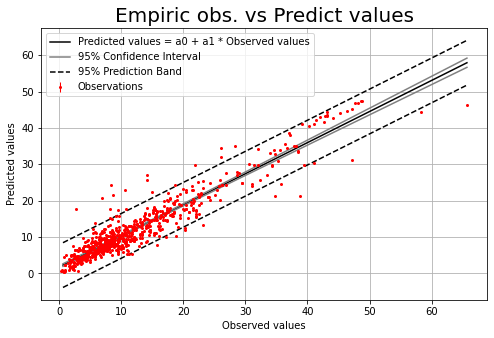

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 2.954, median - 2.953, CI - [2.831-3.091]

SHAP-values for: DBH_cm: mean - 0.615, median - 0.605, CI - [0.521-0.706]

SHAP-values for: H_m: mean - 2.297, median - 2.285, CI - [2.086-2.488]

SHAP-values for: Origin_ID: mean - 0.138, median - 0.142, CI - [0.103-0.174]

SHAP-values for: Species_ID: mean - 4.551, median - 4.557, CI - [4.408-4.724]



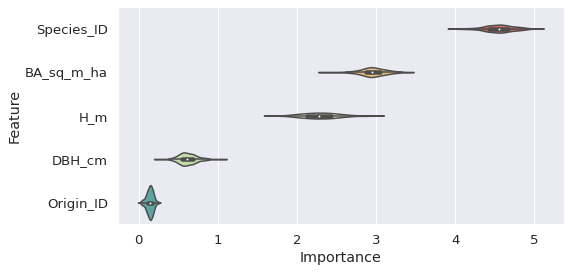

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Species_ID', 'BA_sq_m_ha', 'H_m', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [30]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 55.76, median: 63.5,
 pred. interval (P(0.025)-P(0.975)): 17.0-75.0, 
 conf. interval (p-value=0.95): 36.022-72.91 
***
Aggregate bias statistic: 
 mean: 0.01, median: 0.022,
 pred. interval (P(0.025)-P(0.975)): -0.616-0.528, 
 conf. interval (p-value=0.95): -0.239-0.25 
***
Aggregate RMSE statistic: 
 mean: 3.413, median: 3.376, pred. interval (P(0.025)-P(0.975)): 2.706-4.392, 
 conf. interval (p-value=0.95): 3.016-3.73 
***
Aggregate MSE statistic: 
 mean: 11.818, median: 11.394, pred. interval (P(0.025)-P(0.975)): 7.32-19.285, 
 conf. interval (p-value=0.95): 9.112-13.93 
***
Aggregate R^2 statistic: 
 mean: 0.87, median: 0.876, pred. interval (P(0.025)-P(0.975)): 0.794-0.923, 
 conf. interval (p-value=0.95): 0.842-0.899 
***
Aggregate bias(%) statistic: 
 mean: 0.145, median: 0.022, pred. interval (P(0.025)-P(0.975)): -4.809-4.374, 
 conf. interval (p-value=0.95): -1.826-2.052 
***
Aggregate RMSE(%) statistic: 
 mean: 28.146

# ***Creating final XGBoost model using all obs. for its training***

In [31]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [32]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [33]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:12.03166
[1]	validation_0-rmse:10.04039
[2]	validation_0-rmse:8.17338
[3]	validation_0-rmse:6.95438
[4]	validation_0-rmse:5.92730
[5]	validation_0-rmse:5.08137
[6]	validation_0-rmse:4.58025
[7]	validation_0-rmse:4.16023


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.86307
[9]	validation_0-rmse:3.71766
[10]	validation_0-rmse:3.55090
[11]	validation_0-rmse:3.47380
[12]	validation_0-rmse:3.39712
[13]	validation_0-rmse:3.28470
[14]	validation_0-rmse:3.25427
[15]	validation_0-rmse:3.17358
[16]	validation_0-rmse:3.08852
[17]	validation_0-rmse:3.05597
[18]	validation_0-rmse:3.03085
[19]	validation_0-rmse:2.99067
[20]	validation_0-rmse:2.96072
[21]	validation_0-rmse:2.93471
[22]	validation_0-rmse:2.91035
[23]	validation_0-rmse:2.88487
[24]	validation_0-rmse:2.83973
[25]	validation_0-rmse:2.81534
[26]	validation_0-rmse:2.77918
[27]	validation_0-rmse:2.75733
[28]	validation_0-rmse:2.74878
[29]	validation_0-rmse:2.72504
[30]	validation_0-rmse:2.71152
[31]	validation_0-rmse:2.69510
[32]	validation_0-rmse:2.66531
[33]	validation_0-rmse:2.61672
[34]	validation_0-rmse:2.59978
[35]	validation_0-rmse:2.58655
[36]	validation_0-rmse:2.55748
[37]	validation_0-rmse:2.54397
[38]	validation_0-rmse:2.53056
[39]	validation_0-rmse:2.50721
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [34]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 75


In [35]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

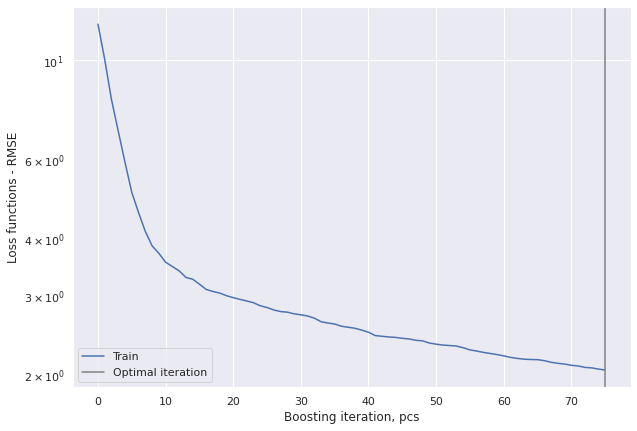

In [36]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [37]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.14
RMSE: 2.0
Relative RMSE(%):  16.944
MSE: 4.2
R square: 95.5%


In [38]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.955
Uncertainty
a0: 0.75+/-0.12
a1: 0.939+/-0.007


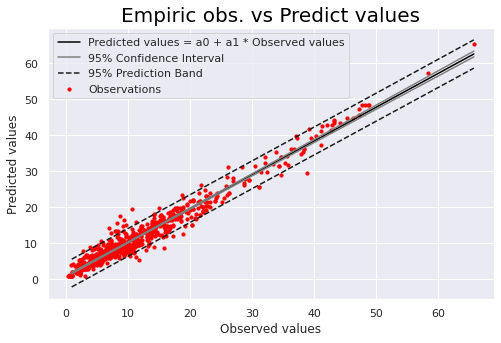

In [39]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

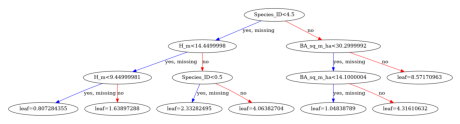

In [40]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

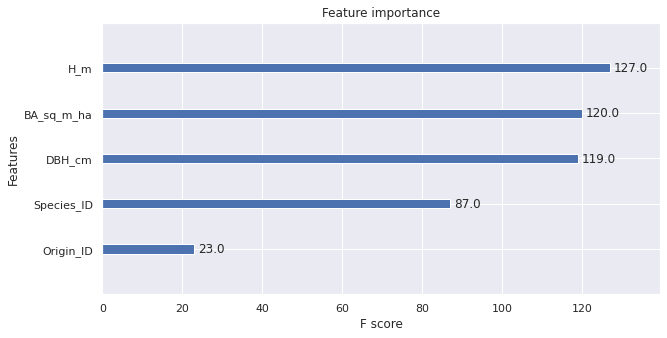

In [42]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

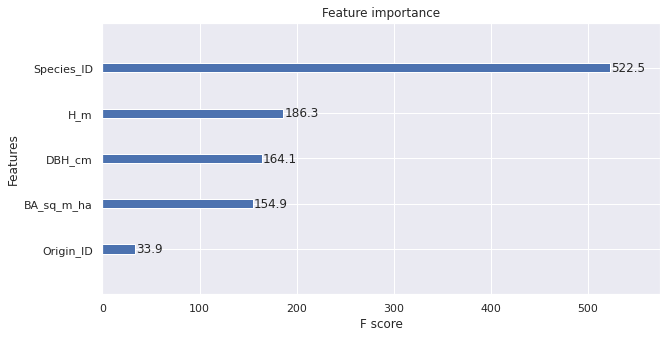

In [43]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

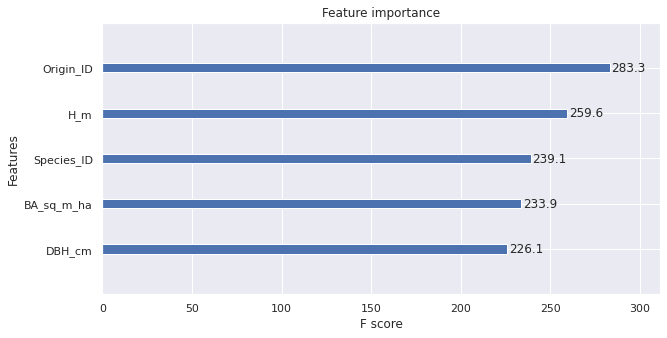

In [44]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [45]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


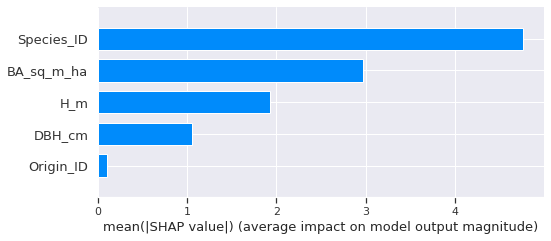

In [46]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

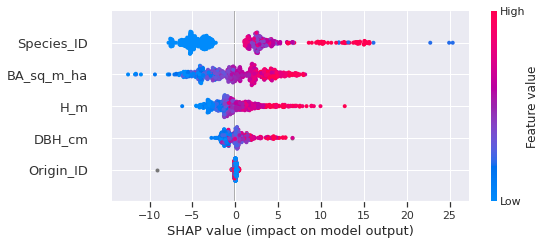

In [47]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

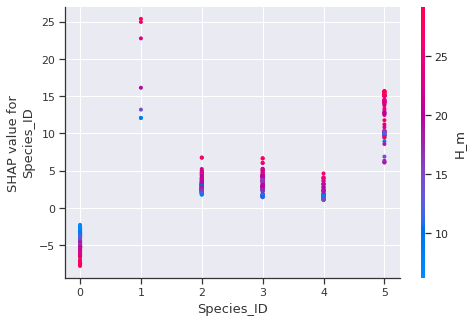

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


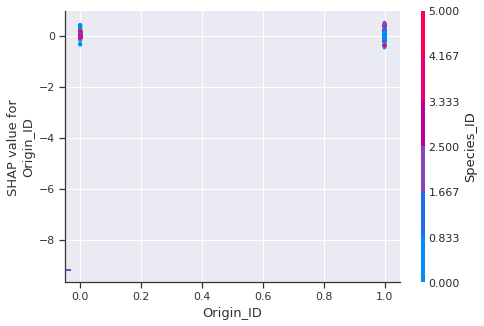

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


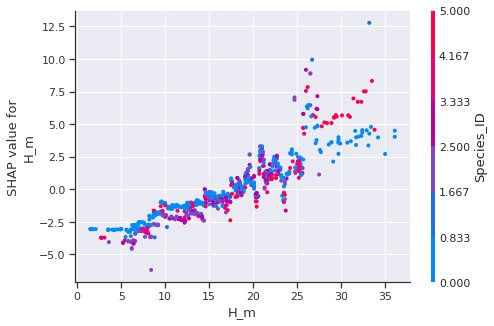

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


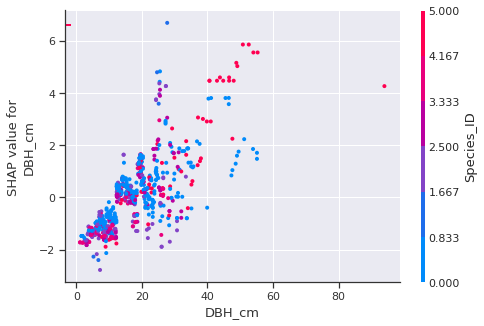

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


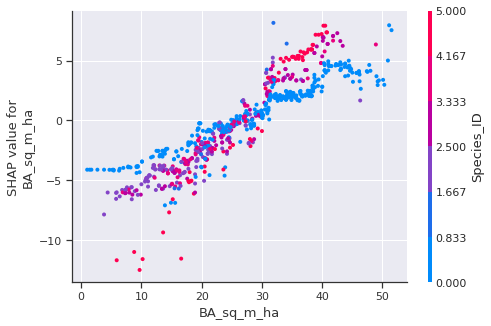

In [48]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [49]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_M_stem_bark_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_M_stem_bark_other_authors_XGB_model.txt")